In [1]:
import json
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence,pack_padded_sequence,pad_packed_sequence
import torch.nn as nn # for network layers
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn.ensemble
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd
import random

# 1. import data

In [2]:
def get_data(filepath):
    with open(filepath, 'r') as f:
        file_data = json.load(f)
    f.close()
    func_data=[]
    func_label=[]
    func_name=[]
    for i,j in file_data.items():
        print(i)
        func_data.append(np.array([n[0] for m,n in j["features"].items()],dtype=np.float32))
        func_label.append(j['label'])
        func_name.append(i)
    print(len(func_data[0]))
    print(len(func_label))
    return np.array(func_data,dtype=np.float32),np.array(func_label,dtype=np.float32), np.array(func_name)

def get_features_names(filepath):
    with open(filepath, 'r') as f:
        file_data = json.load(f)
    f.close()
    
    for i,j in file_data.items():
        #num=0
        for k in j["features"]:
            #num+=1
            #print(num)
            func_features_name=[k for k in j["features"]]
        break
    return func_features_name

In [3]:
#check The ratio of the number of 0 to 1 data in train_data
def check_ratio(label_data):
    num0=0
    num1=0
    for i in label_data:
        if i==0:
            num0+=1
        else:
            num1+=1
    print('class0:',num0/len(label_data), 'class1:',num1/len(label_data),num0,num1 )

In [4]:
#train data
filepath=r'C:\Users\thisi\PycharmProjects\Sum23teamlab\ACL\optimizer3_unselect_lld_features\new_func\func_train_list.json'
func_data_train,func_label_train,func_name_train=get_data(filepath)

0061006001_h_00.wav
0061006002_h_00.wav
0061006003_h_00.wav
0061006004_h_00.wav
0061006005_h_00.wav
0061006006_h_00.wav
0061006007_h_00.wav
0061006009_h_00.wav
0061006011_h_00.wav
0061006012_h_00.wav
0061006013_h_00.wav
0061006014_h_00.wav
0061006015_h_00.wav
0061006017_h_00.wav
0061006018_h_00.wav
0061006019_h_00.wav
0061006021_h_00.wav
0061006022_h_00.wav
0061006023_h_00.wav
0061006025_h_00.wav
0061006026_h_00.wav
0061006027_h_00.wav
0061006028_h_00.wav
0061006029_h_00.wav
0061006030_h_00.wav
0062014001_h_00.wav
0062014002_h_00.wav
0062014004_h_00.wav
0062014005_h_00.wav
0062014006_h_00.wav
0062014008_h_00.wav
0062014010_h_00.wav
0062014012_h_00.wav
0062014014_h_00.wav
0062014015_h_00.wav
0062014016_h_00.wav
0062014017_h_00.wav
0062014018_h_00.wav
0062014020_h_00.wav
0062014021_h_00.wav
0062014022_h_00.wav
0062014023_h_00.wav
0062014026_h_00.wav
0062014027_h_00.wav
0062014028_h_00.wav
0062014030_h_00.wav
0062014031_h_00.wav
0062014032_h_00.wav
0062014033_h_00.wav
0062014034_h_00.wav


5234023038_h_00.wav
5234023040_h_00.wav
5234023042_h_00.wav
5234023043_h_00.wav
5234023045_h_00.wav
5234023047_h_00.wav
5234023048_h_00.wav
5234023049_h_00.wav
5234023050_h_00.wav
5234023053_h_00.wav
5234023054_h_00.wav
5234023055_h_00.wav
5234023056_h_00.wav
5234023057_h_00.wav
5234023058_h_00.wav
5234023059_h_00.wav
5234023060_h_00.wav
5243025001_h_00.wav
5243025002_h_00.wav
5243025003_h_00.wav
5243025004_h_00.wav
5243025005_h_00.wav
5243025006_h_00.wav
5243025009_h_00.wav
5243025010_h_00.wav
5243025011_h_00.wav
5243025012_h_00.wav
5243025013_h_00.wav
5243025015_h_00.wav
5243025016_h_00.wav
5243025017_h_00.wav
5243025018_h_00.wav
5243025020_h_00.wav
5243025021_h_00.wav
5243025022_h_00.wav
5243025023_h_00.wav
5243025024_h_00.wav
5243025025_h_00.wav
5243025026_h_00.wav
5243025028_h_00.wav
5243025030_h_00.wav
5244008001_h_00.wav
5244008003_h_00.wav
5244008006_h_00.wav
5244008007_h_00.wav
5244008009_h_00.wav
5244008010_h_00.wav
5244008011_h_00.wav
5244008012_h_00.wav
5244008013_h_00.wav


In [5]:
#test data
filepath = r'C:\Users\thisi\PycharmProjects\Sum23teamlab\ACL\optimizer3_unselect_lld_features\new_func\func_test_list.json'
func_data_test,func_label_test,func_name_test=get_data(filepath)

0061006008_h_00.wav
0061006010_h_00.wav
0061006024_h_00.wav
0062014003_h_00.wav
0062014025_h_00.wav
0062014029_h_00.wav
0062014040_h_00.wav
0062014049_h_00.wav
0071007014_h_00.wav
0071007016_h_00.wav
0071007021_h_00.wav
0071007026_h_00.wav
0072009011_h_00.wav
0072009025_h_00.wav
0072009036_h_00.wav
0072009039_h_00.wav
0072009040_h_00.wav
0072009058_h_00.wav
0081008005_h_00.wav
0081008006_h_00.wav
0081008008_h_00.wav
0081008015_h_00.wav
0081008017_h_00.wav
0081008018_h_00.wav
0081008021_h_00.wav
0081008024_h_00.wav
0082006001_h_00.wav
0082006004_h_00.wav
0082006022_h_00.wav
0082006024_h_00.wav
0082006025_h_00.wav
0082006038_h_00.wav
0082006039_h_00.wav
0082006045_h_00.wav
0082006054_h_00.wav
0082006055_h_00.wav
0082006056_h_00.wav
0091009022_h_00.wav
0092003003_h_00.wav
0092003016_h_00.wav
0092003019_h_00.wav
0092003032_h_00.wav
0092003035_h_00.wav
0092003048_h_00.wav
0102010031_h_00.wav
0102010035_h_00.wav
0102010039_h_00.wav
0102010048_h_00.wav
0102010057_h_00.wav
0111011003_h_00.wav


In [6]:
func_features_name=get_features_names(filepath)
print(func_features_name) 
print(len(func_features_name))#152
for i in range(len(func_features_name)):
    func_features_name[i]=str(i)+'.'+func_features_name[i]

['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F1amplitudeLogRelF0_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean', 'F1bandwidth_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean', 'F1frequency_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean', 'F2frequency_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean', 'F3bandwidth_sma3nz_stddevNorm', 'F3frequ

In [7]:
#get oversampling data
import copy #!!!
func_data_train_over=copy.deepcopy(func_data_train)
func_label_train_over=copy.deepcopy(func_label_train)
class1_list=[]
for i in range(len(func_data_train)): #len(train_data) 7672-4025
    if func_label_train[i]==1:
        print(func_data_train_over.size,len(func_data_train_over))
        func_data_train_over=np.append(func_data_train_over,[func_data_train[i]],axis=0)
        #print(func_data_train[i])
        func_label_train_over=np.append(func_label_train_over,func_label_train[i])

1745112 11481
1745264 11482
1745416 11483
1745568 11484
1745720 11485
1745872 11486
1746024 11487
1746176 11488
1746328 11489
1746480 11490
1746632 11491
1746784 11492
1746936 11493
1747088 11494
1747240 11495
1747392 11496
1747544 11497
1747696 11498
1747848 11499
1748000 11500
1748152 11501
1748304 11502
1748456 11503
1748608 11504
1748760 11505
1748912 11506
1749064 11507
1749216 11508
1749368 11509
1749520 11510
1749672 11511
1749824 11512
1749976 11513
1750128 11514
1750280 11515
1750432 11516
1750584 11517
1750736 11518
1750888 11519
1751040 11520
1751192 11521
1751344 11522
1751496 11523
1751648 11524
1751800 11525
1751952 11526
1752104 11527
1752256 11528
1752408 11529
1752560 11530
1752712 11531
1752864 11532
1753016 11533
1753168 11534
1753320 11535
1753472 11536
1753624 11537
1753776 11538
1753928 11539
1754080 11540
1754232 11541
1754384 11542
1754536 11543
1754688 11544
1754840 11545
1754992 11546
1755144 11547
1755296 11548
1755448 11549
1755600 11550
1755752 11551
175590

1840872 12111
1841024 12112
1841176 12113
1841328 12114
1841480 12115
1841632 12116
1841784 12117
1841936 12118
1842088 12119
1842240 12120
1842392 12121
1842544 12122
1842696 12123
1842848 12124
1843000 12125
1843152 12126
1843304 12127
1843456 12128
1843608 12129
1843760 12130
1843912 12131
1844064 12132
1844216 12133
1844368 12134
1844520 12135
1844672 12136
1844824 12137
1844976 12138
1845128 12139
1845280 12140
1845432 12141
1845584 12142
1845736 12143
1845888 12144
1846040 12145
1846192 12146
1846344 12147
1846496 12148
1846648 12149
1846800 12150
1846952 12151
1847104 12152
1847256 12153
1847408 12154
1847560 12155
1847712 12156
1847864 12157
1848016 12158
1848168 12159
1848320 12160
1848472 12161
1848624 12162
1848776 12163
1848928 12164
1849080 12165
1849232 12166
1849384 12167
1849536 12168
1849688 12169
1849840 12170
1849992 12171
1850144 12172
1850296 12173
1850448 12174
1850600 12175
1850752 12176
1850904 12177
1851056 12178
1851208 12179
1851360 12180
1851512 12181
185166

1937544 12747
1937696 12748
1937848 12749
1938000 12750
1938152 12751
1938304 12752
1938456 12753
1938608 12754
1938760 12755
1938912 12756
1939064 12757
1939216 12758
1939368 12759
1939520 12760
1939672 12761
1939824 12762
1939976 12763
1940128 12764
1940280 12765
1940432 12766
1940584 12767
1940736 12768
1940888 12769
1941040 12770
1941192 12771
1941344 12772
1941496 12773
1941648 12774
1941800 12775
1941952 12776
1942104 12777
1942256 12778
1942408 12779
1942560 12780
1942712 12781
1942864 12782
1943016 12783
1943168 12784
1943320 12785
1943472 12786
1943624 12787
1943776 12788
1943928 12789
1944080 12790
1944232 12791
1944384 12792
1944536 12793
1944688 12794
1944840 12795
1944992 12796
1945144 12797
1945296 12798
1945448 12799
1945600 12800
1945752 12801
1945904 12802
1946056 12803
1946208 12804
1946360 12805
1946512 12806
1946664 12807
1946816 12808
1946968 12809
1947120 12810
1947272 12811
1947424 12812
1947576 12813
1947728 12814
1947880 12815
1948032 12816
1948184 12817
194833

2031784 13367
2031936 13368
2032088 13369
2032240 13370
2032392 13371
2032544 13372
2032696 13373
2032848 13374
2033000 13375
2033152 13376
2033304 13377
2033456 13378
2033608 13379
2033760 13380
2033912 13381
2034064 13382
2034216 13383
2034368 13384
2034520 13385
2034672 13386
2034824 13387
2034976 13388
2035128 13389
2035280 13390
2035432 13391
2035584 13392
2035736 13393
2035888 13394
2036040 13395
2036192 13396
2036344 13397
2036496 13398
2036648 13399
2036800 13400
2036952 13401
2037104 13402
2037256 13403
2037408 13404
2037560 13405
2037712 13406
2037864 13407
2038016 13408
2038168 13409
2038320 13410
2038472 13411
2038624 13412
2038776 13413
2038928 13414
2039080 13415
2039232 13416
2039384 13417
2039536 13418
2039688 13419
2039840 13420
2039992 13421
2040144 13422
2040296 13423
2040448 13424
2040600 13425
2040752 13426
2040904 13427
2041056 13428
2041208 13429
2041360 13430
2041512 13431
2041664 13432
2041816 13433
2041968 13434
2042120 13435
2042272 13436
2042424 13437
204257

2122224 13962
2122376 13963
2122528 13964
2122680 13965
2122832 13966
2122984 13967
2123136 13968
2123288 13969
2123440 13970
2123592 13971
2123744 13972
2123896 13973
2124048 13974
2124200 13975
2124352 13976
2124504 13977
2124656 13978
2124808 13979
2124960 13980
2125112 13981
2125264 13982
2125416 13983
2125568 13984
2125720 13985
2125872 13986
2126024 13987
2126176 13988
2126328 13989
2126480 13990
2126632 13991
2126784 13992
2126936 13993
2127088 13994
2127240 13995
2127392 13996
2127544 13997
2127696 13998
2127848 13999
2128000 14000
2128152 14001
2128304 14002
2128456 14003
2128608 14004
2128760 14005
2128912 14006
2129064 14007
2129216 14008
2129368 14009
2129520 14010
2129672 14011
2129824 14012
2129976 14013
2130128 14014
2130280 14015
2130432 14016
2130584 14017
2130736 14018
2130888 14019
2131040 14020
2131192 14021
2131344 14022
2131496 14023
2131648 14024
2131800 14025
2131952 14026
2132104 14027
2132256 14028
2132408 14029
2132560 14030
2132712 14031
2132864 14032
213301

2217984 14592
2218136 14593
2218288 14594
2218440 14595
2218592 14596
2218744 14597
2218896 14598
2219048 14599
2219200 14600
2219352 14601
2219504 14602
2219656 14603
2219808 14604
2219960 14605
2220112 14606
2220264 14607
2220416 14608
2220568 14609
2220720 14610
2220872 14611
2221024 14612
2221176 14613
2221328 14614
2221480 14615
2221632 14616
2221784 14617
2221936 14618
2222088 14619
2222240 14620
2222392 14621
2222544 14622
2222696 14623
2222848 14624
2223000 14625
2223152 14626
2223304 14627
2223456 14628
2223608 14629
2223760 14630
2223912 14631
2224064 14632
2224216 14633
2224368 14634
2224520 14635
2224672 14636
2224824 14637
2224976 14638
2225128 14639
2225280 14640
2225432 14641
2225584 14642
2225736 14643
2225888 14644
2226040 14645
2226192 14646
2226344 14647
2226496 14648
2226648 14649
2226800 14650
2226952 14651
2227104 14652
2227256 14653
2227408 14654
2227560 14655
2227712 14656
2227864 14657
2228016 14658
2228168 14659
2228320 14660
2228472 14661
2228624 14662
222877

2312376 15213
2312528 15214
2312680 15215
2312832 15216
2312984 15217
2313136 15218
2313288 15219
2313440 15220
2313592 15221
2313744 15222
2313896 15223
2314048 15224
2314200 15225
2314352 15226
2314504 15227
2314656 15228
2314808 15229
2314960 15230
2315112 15231
2315264 15232
2315416 15233
2315568 15234
2315720 15235
2315872 15236
2316024 15237
2316176 15238
2316328 15239
2316480 15240
2316632 15241
2316784 15242
2316936 15243
2317088 15244
2317240 15245
2317392 15246
2317544 15247
2317696 15248
2317848 15249
2318000 15250
2318152 15251
2318304 15252
2318456 15253
2318608 15254
2318760 15255
2318912 15256
2319064 15257
2319216 15258
2319368 15259
2319520 15260
2319672 15261
2319824 15262
2319976 15263
2320128 15264
2320280 15265
2320432 15266
2320584 15267
2320736 15268
2320888 15269
2321040 15270
2321192 15271
2321344 15272
2321496 15273
2321648 15274
2321800 15275
2321952 15276
2322104 15277
2322256 15278
2322408 15279
2322560 15280
2322712 15281
2322864 15282
2323016 15283
232316

In [8]:
check_ratio(func_label_train)
check_ratio(func_label_train_over)
check_ratio(func_label_test)

class0: 0.6682344743489244 class1: 0.3317655256510757 7672 3809
class0: 0.5017658600392413 class1: 0.49823413996075866 7672 7618
class0: 0.653899721448468 class1: 0.346100278551532 939 497


# 2.train RF

In [9]:
def train_rf(func_data,func_label,num_str):
    forest = sklearn.ensemble.RandomForestClassifier(
        n_estimators=141, criterion="entropy",random_state=0, oob_score=True
    ) #91 191
    forest.fit(func_data, func_label)
    print('num_str')
    prec, rec, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        func_label,forest.predict(func_data), average=None 
    )
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print(func_label)
    print(forest.predict(func_data))
    print(type(func_label))
    print(type(forest.predict(func_data)))
    return forest

In [10]:
forest1=train_rf(func_data_train,func_label_train,'train1')

num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
forest2=train_rf(func_data_train_over,func_label_train_over,'train2')

num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 3. test RF

In [12]:
def test_rf(forest,test_data,test_label,num_forest,num_test):
    print('---',num_forest,',',num_test,'---') #forest,test
    prec, rec, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        test_label,forest.predict(test_data), average=None 
    )
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print('confusion_matrix:')
    print(sklearn.metrics.confusion_matrix(test_label,forest.predict(test_data) ))
    print('accuracy:')
    acc=sklearn.metrics.accuracy_score(test_label,forest.predict(test_data))
    print(sklearn.metrics.accuracy_score(test_label,forest.predict(test_data) ))
    print()
    return f1,acc

In [13]:
f1_1,acc1=test_rf(forest1,func_data_test,func_label_test,'forest1','test')
f1_2,acc2=test_rf(forest2,func_data_test,func_label_test,'forest2','test')

--- forest1 , test ---
Precision: [0.7189232  0.82080925]
Recall: [0.96698616 0.28571429]
F1-score: [0.82470481 0.4238806 ]
confusion_matrix:
[[908  31]
 [355 142]]
accuracy:
0.7311977715877437

--- forest2 , test ---
Precision: [0.76642984 0.75483871]
Recall: [0.91906283 0.47082495]
F1-score: [0.83583535 0.57992565]
confusion_matrix:
[[863  76]
 [263 234]]
accuracy:
0.7639275766016713



In [ ]:
Precision: [0.79136029 0.77586207]
Recall: [0.91693291 0.54325956]
F1-score: [0.84953133 0.63905325]
confusion_matrix:
[[861  78]
 [227 270]]
accuracy:
0.7876044568245125

# 4.selecte features

In [14]:
from sklearn.inspection import permutation_importance

In [34]:
def print_importance(forest,func_data,func_label,features_name):
    #start_time = time.time()
    result = permutation_importance(
        forest, func_data,func_label, n_repeats=10, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=features_name )
    print('forest_importances',forest_importances)
    forest_importances_sort=forest_importances.sort_values(ascending=False) #ascending=False
    print('forest_importances',forest_importances)
    fig, ax = plt.subplots(figsize=(19, 10))
    forest_importances_sort.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()
    im_list3=[]
    for i in range(len(forest_importances_sort)):
        if forest_importances_sort[i]>0:
            print(forest_importances_sort.index[i].split('.')[0])
            im_list3.append(int(forest_importances_sort.index[i].split('.')[0]))
    return forest_importances_sort

def get_new_data(im_comb, func_data_train,func_data_test,func_features_name,shuffle_flag):
    iml=im_comb
    if shuffle_flag=='true':
        random.shuffle(iml)
        print(iml)
    else:
        print(iml)
    
    important_feat_list=iml
    func_data_train_selectedf=[]
    print(len(func_data_train))
    for i in func_data_train:
        temp=[]
        for j in important_feat_list:
            temp.append(i[j])
        func_data_train_selectedf.append(np.array(temp) )
    func_data_train_selectedf=np.array(func_data_train_selectedf) 
    print(len(func_data_train_selectedf[0]))

    func_data_test_selectedf=[]
    print(type(func_data_test[0][0]))
    for i in func_data_test:
        temp=[]
        for j in important_feat_list:
            temp.append(i[j])
        func_data_test_selectedf.append(np.array(temp) )
    func_data_test_selectedf=np.array(func_data_test_selectedf) 
    print(len(func_data_test_selectedf[0]))

    features_name_selected=[]
    for i in important_feat_list:
        features_name_selected.append(func_features_name[i])
    #print(features_name_selected)
    print(len(features_name_selected))
    return func_data_train_selectedf,func_data_test_selectedf,features_name_selected

def retrain_retest_rf(func_data_train_selectedf,func_data_test_selectedf):
    forest=train_rf(func_data_train_selectedf,func_label_train_over,'train1')#146,
    f1, acc=test_rf(forest,func_data_test_selectedf,func_label_test,'forest2','test4')
    return forest, acc

In [35]:
#initialize variables
acc_old=acc2
len_old=len(func_features_name)
forest3=forest2
func_data_test_selectedf=func_data_test
features_name_selected=func_features_name

forest_importances 0.F0semitoneFrom27.5Hz_sma3nz_amean               0.002228
1.F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope    0.003064
2.F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope    -0.001671
3.F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        0.002577
4.F0semitoneFrom27.5Hz_sma3nz_percentile20.0      0.003621
                                                    ...   
147.spectralFluxUV_sma3nz_amean                   0.000905
148.spectralFluxV_sma3nz_amean                   -0.000209
149.spectralFluxV_sma3nz_stddevNorm               0.020125
150.spectralFlux_sma3_amean                       0.002368
151.spectralFlux_sma3_stddevNorm                  0.003552
Length: 152, dtype: float64
forest_importances 0.F0semitoneFrom27.5Hz_sma3nz_amean               0.002228
1.F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope    0.003064
2.F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope    -0.001671
3.F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        0.002577
4.F0semitoneFrom27.5Hz_sma3nz_percentile20.0     

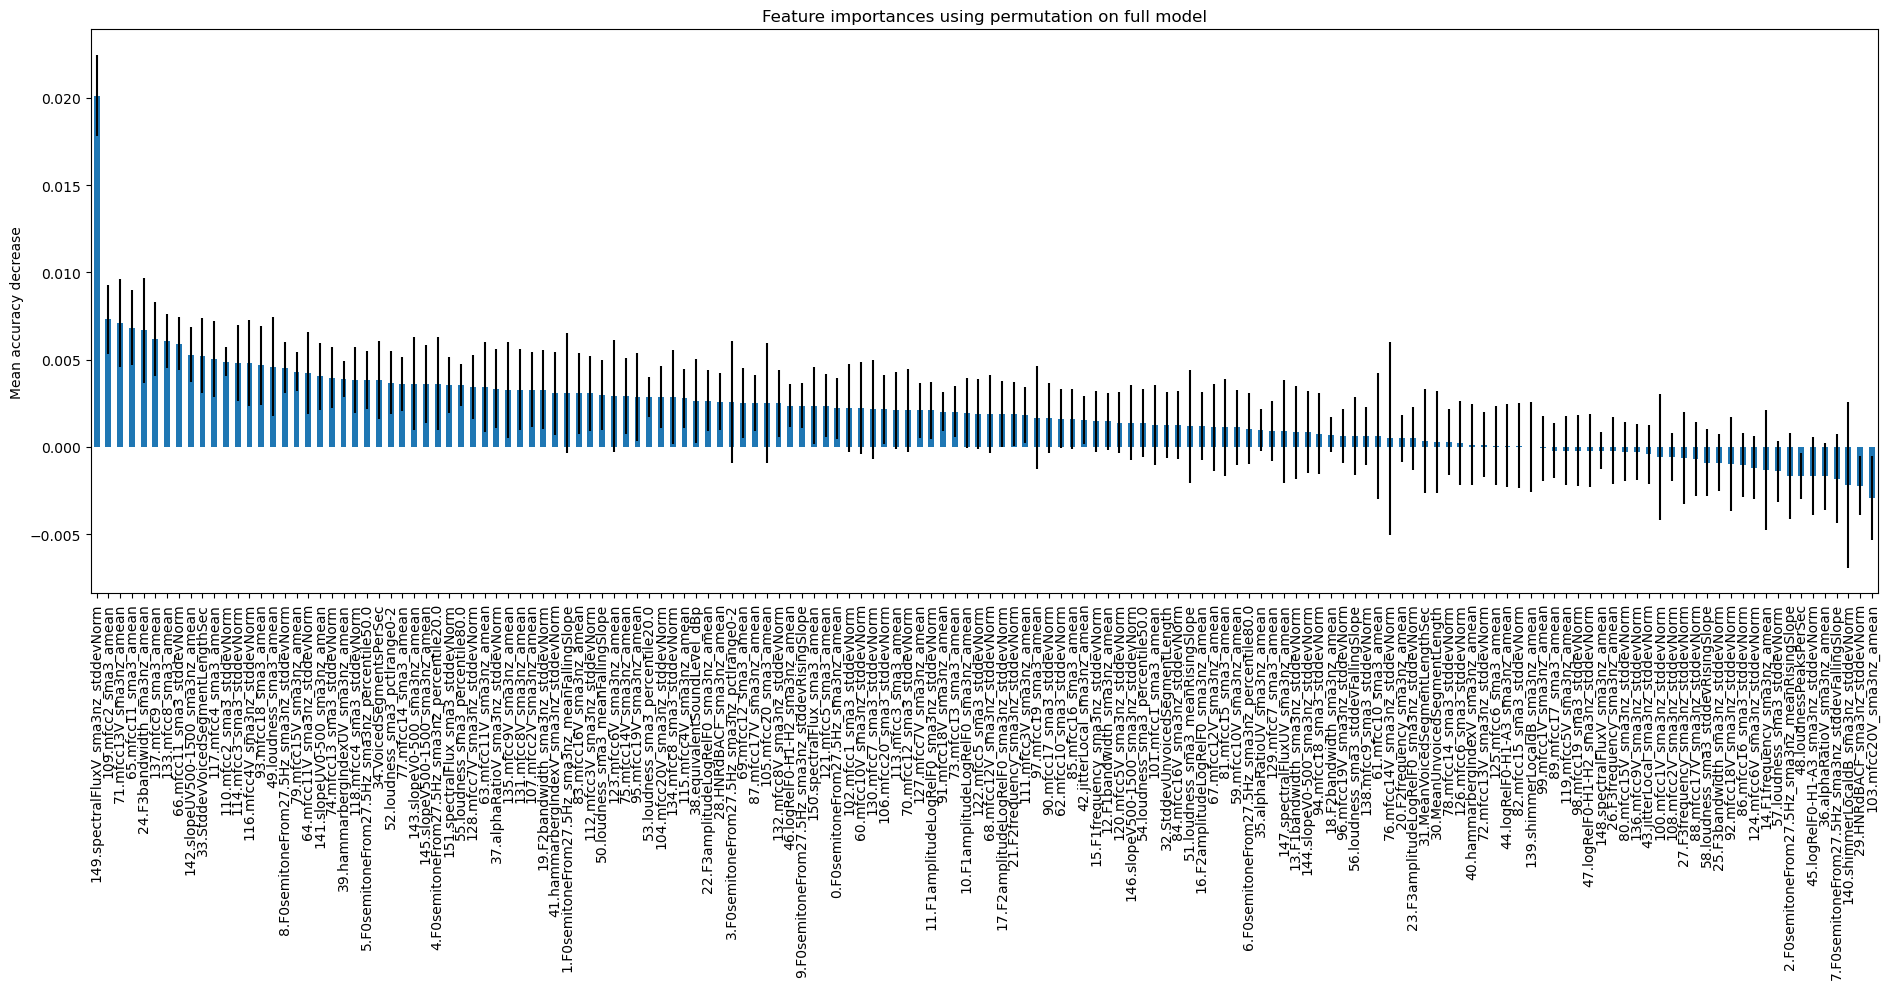

149
109
71
65
24
137
133
66
142
33
117
110
114
116
93
49
8
79
64
141
74
39
118
5
34
52
77
143
145
4
151
55
128
63
37
135
131
107
19
41
1
83
112
50
123
75
95
53
104
134
115
38
22
28
3
69
87
105
132
46
9
150
121
0
102
60
130
106
113
70
127
11
91
73
10
122
68
17
21
111
97
90
62
85
42
15
12
120
146
54
101
32
84
51
16
67
81
59
6
35
129
147
13
144
94
18
96
56
138
61
76
20
23
31
30
78
126
40
72
125
44
82
139
149
109
71
65
24
137
133
66
142
33
117
110
114
116
93
49
8
79
64
141
74
39
118
5
34
52
77
143
145
4
151
55
128
63
37
135
131
107
19
41
1
83
112
50
123
75
95
53
104
134
115
38
22
28
3
69
87
105
132
46
9
150
121
0
102
60
130
106
113
70
127
11
91
73
10
122
68
17
21
111
97
90
62
85
42
15
12
120
146
54
101
32
84
51
16
67
81
59
6
35
129
147
13
144
94
18
96
56
138
61
76
20
23
31
30
78
126
40
72
125
44
82
139
123 123
[149, 109, 71, 65, 24, 137, 133, 66, 142, 33, 117, 110, 114, 116, 93, 49, 8, 79, 64, 141, 74, 39, 118, 5, 34, 52, 77, 143, 145, 4, 151, 55, 128, 63, 37, 135, 131, 107, 19, 41, 1, 83,

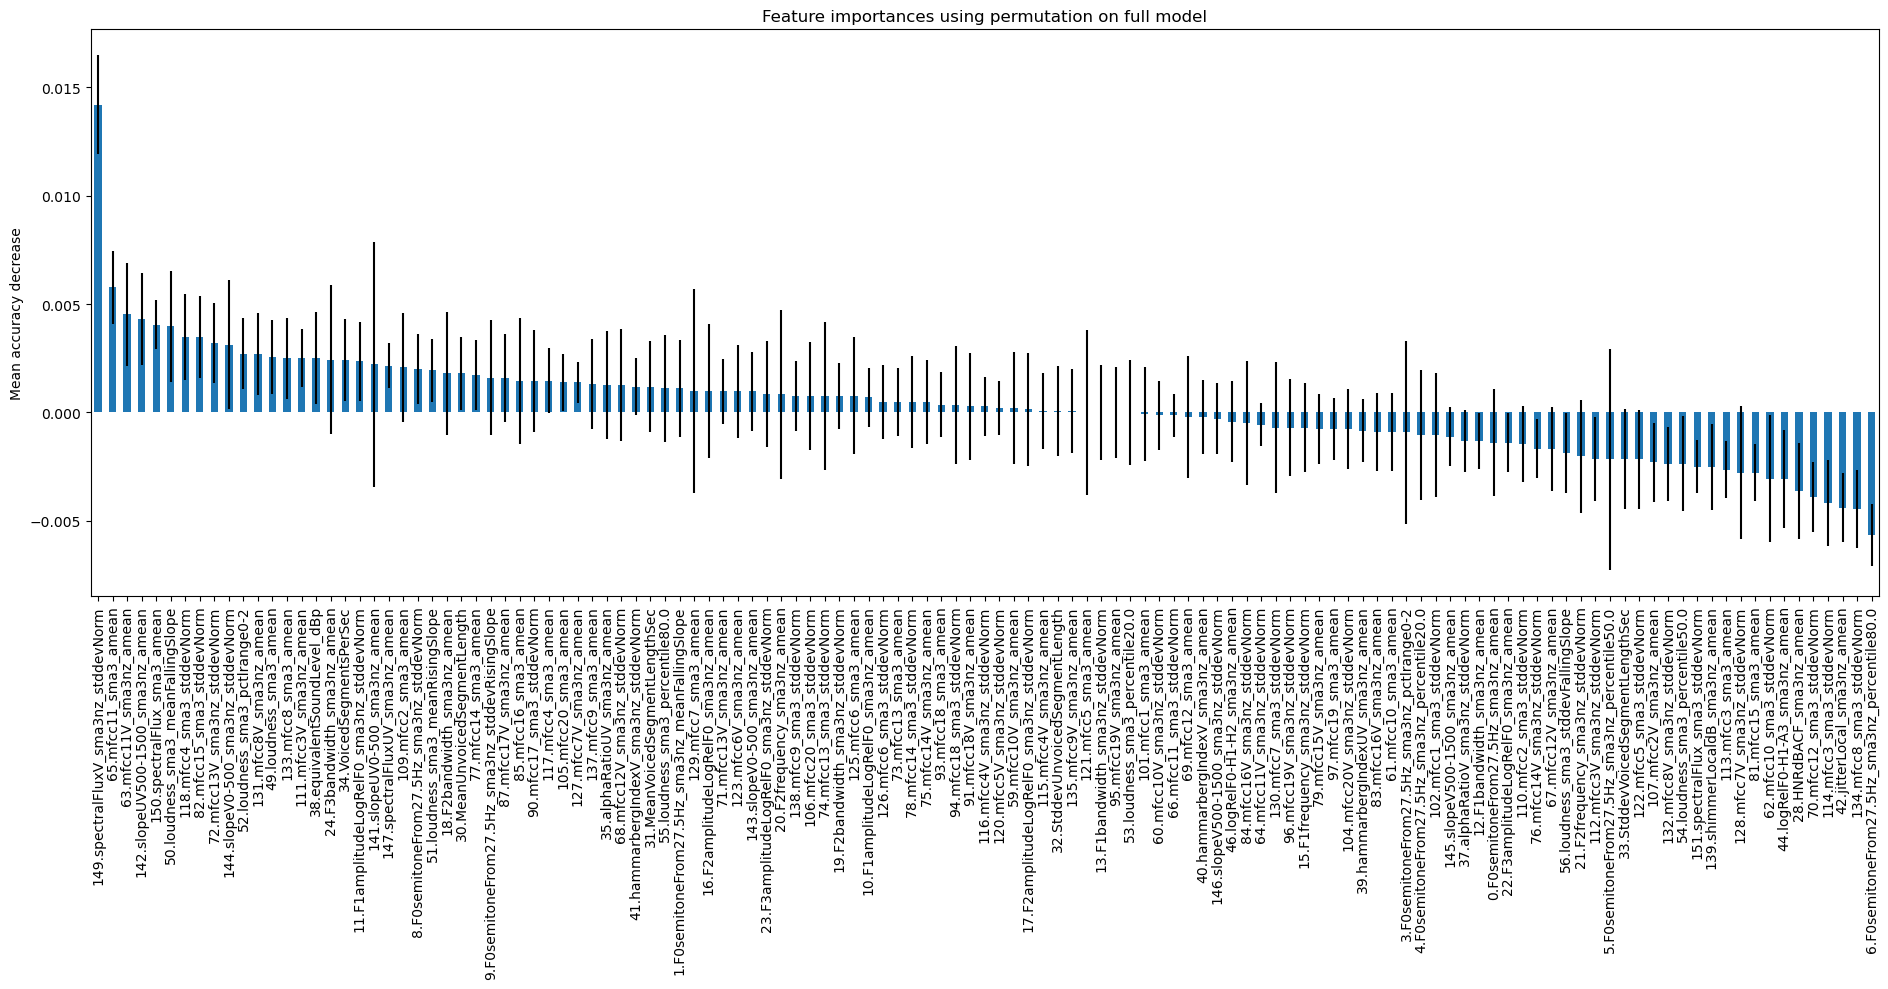

149
65
63
142
150
50
118
82
72
144
52
131
49
133
111
38
24
34
11
141
147
109
8
51
18
30
77
9
87
85
90
117
105
127
137
35
68
41
31
55
1
129
16
71
123
143
23
20
138
106
74
19
125
10
126
73
78
75
93
94
91
116
120
59
17
115
32
135
149
65
63
142
150
50
118
82
72
144
52
131
49
133
111
38
24
34
11
141
147
109
8
51
18
30
77
9
87
85
90
117
105
127
137
35
68
41
31
55
1
129
16
71
123
143
23
20
138
106
74
19
125
10
126
73
78
75
93
94
91
116
120
59
17
115
32
135
68 68
[149, 65, 63, 142, 150, 50, 118, 82, 72, 144, 52, 131, 49, 133, 111, 38, 24, 34, 11, 141, 147, 109, 8, 51, 18, 30, 77, 9, 87, 85, 90, 117, 105, 127, 137, 35, 68, 41, 31, 55, 1, 129, 16, 71, 123, 143, 23, 20, 138, 106, 74, 19, 125, 10, 126, 73, 78, 75, 93, 94, 91, 116, 120, 59, 17, 115, 32, 135]
[106, 68, 50, 117, 75, 59, 78, 93, 16, 19, 91, 90, 63, 115, 18, 72, 144, 137, 51, 131, 116, 30, 20, 31, 127, 111, 35, 41, 129, 74, 24, 55, 87, 142, 38, 34, 65, 149, 8, 125, 138, 23, 71, 141, 1, 109, 32, 82, 147, 85, 126, 17, 73, 143, 94, 150, 4

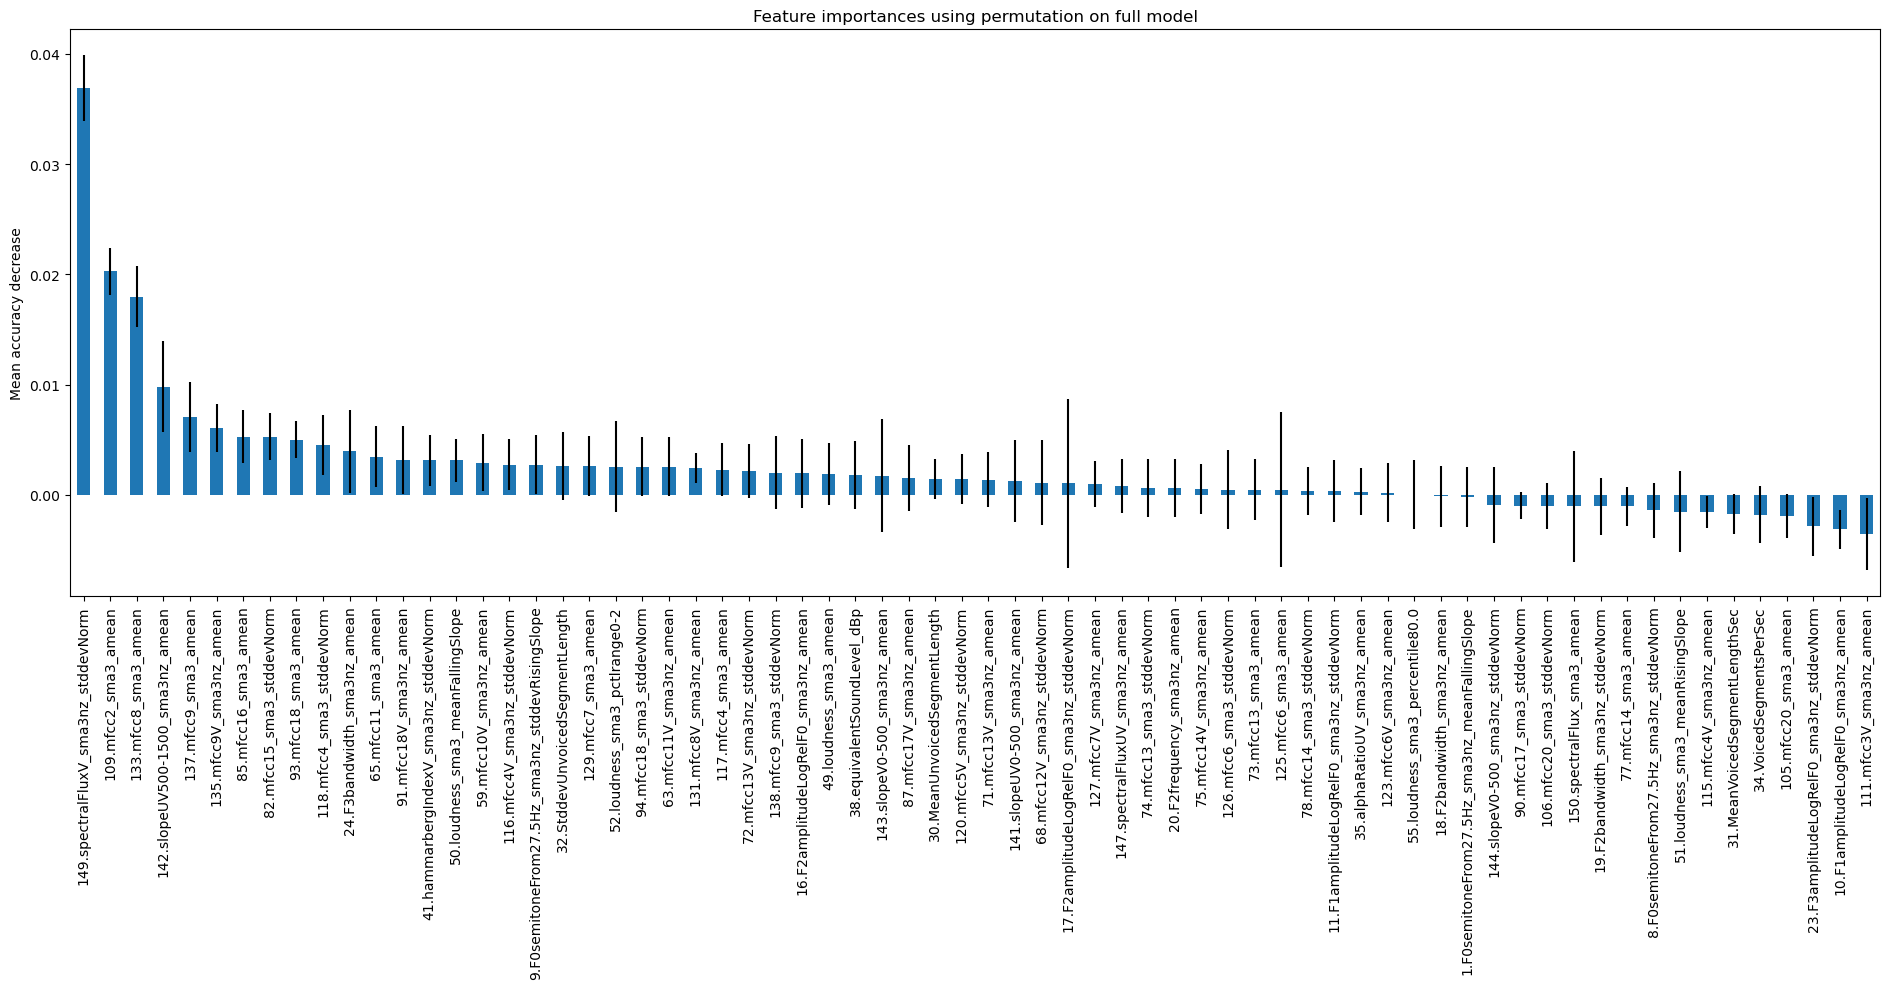

149
109
133
142
137
135
85
82
93
118
24
65
91
41
50
59
116
9
32
129
52
94
63
131
117
72
138
16
49
38
143
87
30
120
71
141
68
17
127
147
74
20
75
126
73
125
78
11
35
123
55
149
109
133
142
137
135
85
82
93
118
24
65
91
41
50
59
116
9
32
129
52
94
63
131
117
72
138
16
49
38
143
87
30
120
71
141
68
17
127
147
74
20
75
126
73
125
78
11
35
123
55
51 51
[149, 109, 133, 142, 137, 135, 85, 82, 93, 118, 24, 65, 91, 41, 50, 59, 116, 9, 32, 129, 52, 94, 63, 131, 117, 72, 138, 16, 49, 38, 143, 87, 30, 120, 71, 141, 68, 17, 127, 147, 74, 20, 75, 126, 73, 125, 78, 11, 35, 123, 55]
[129, 63, 149, 142, 93, 147, 131, 24, 85, 94, 141, 38, 30, 109, 41, 74, 78, 135, 116, 49, 72, 16, 73, 20, 11, 9, 120, 127, 52, 87, 126, 71, 32, 118, 125, 50, 143, 117, 133, 65, 82, 137, 35, 123, 59, 91, 138, 68, 17, 55, 75]
15290
51
<class 'numpy.float32'>
51
51
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- fo

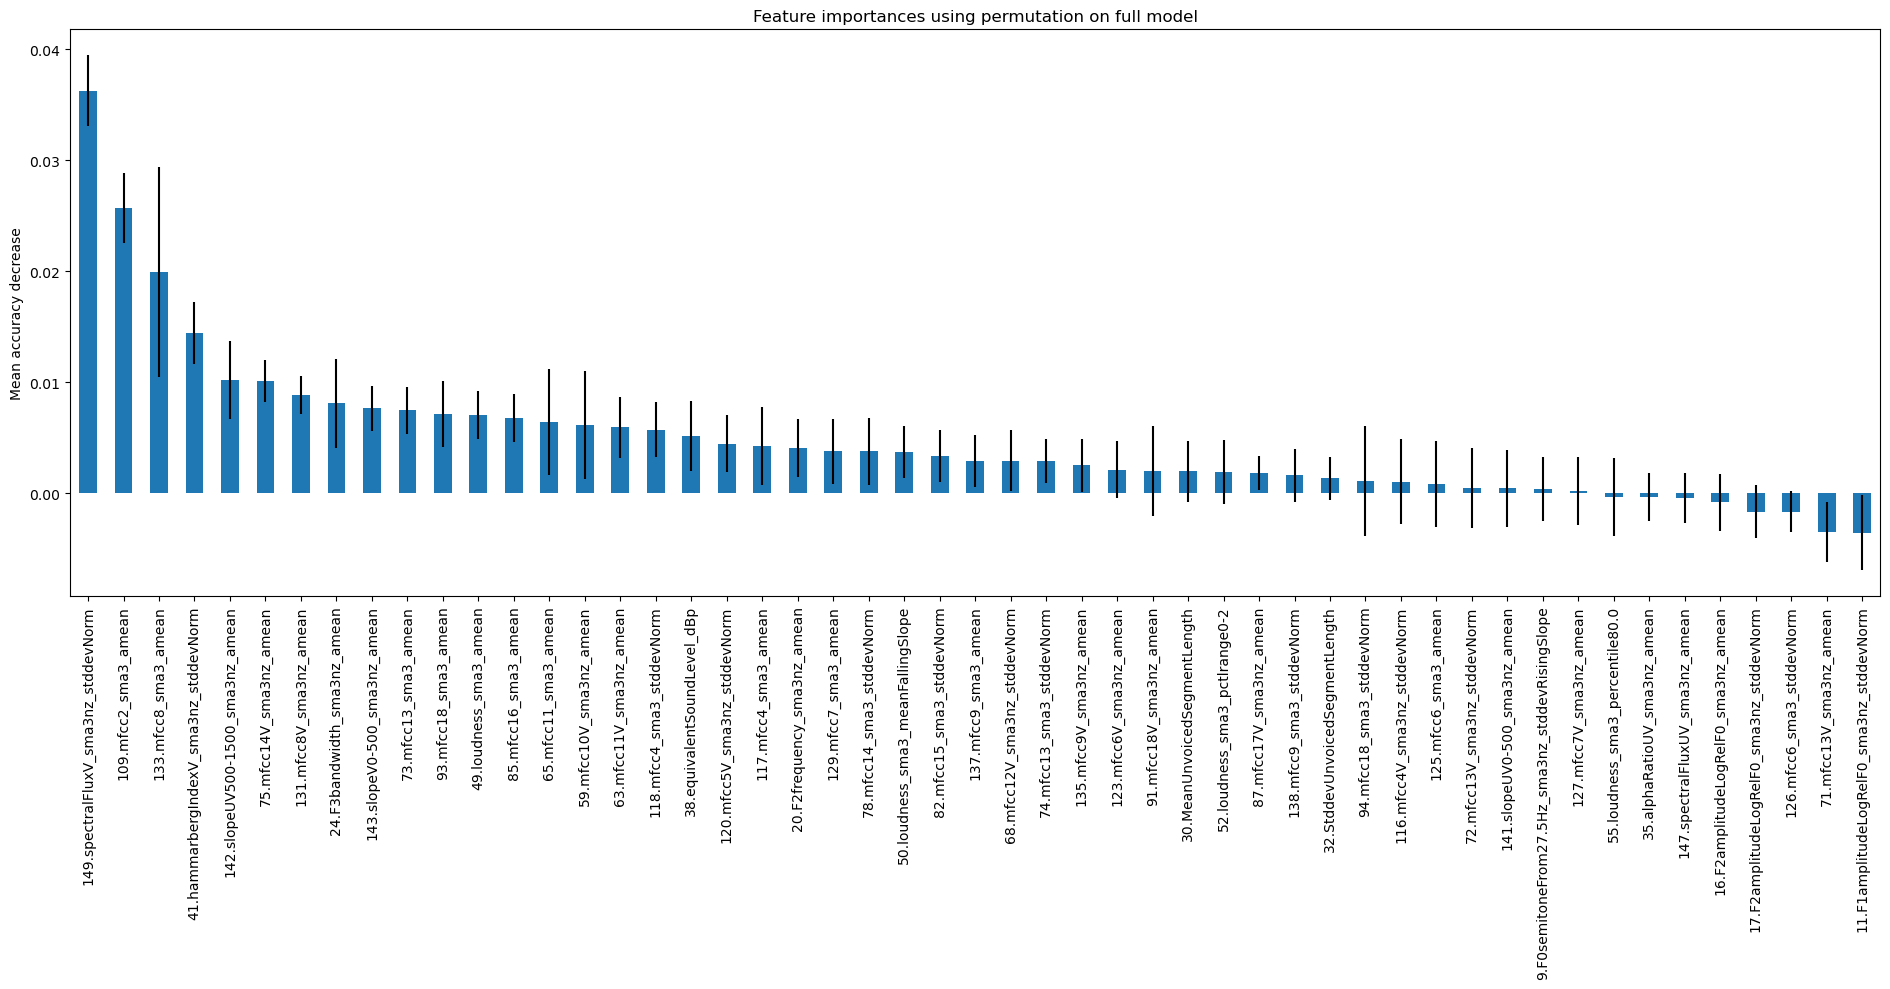

149
109
133
41
142
75
131
24
143
73
93
49
85
65
59
63
118
38
120
117
20
129
78
50
82
137
68
74
135
123
91
30
52
87
138
32
94
116
125
72
141
9
127
149
109
133
41
142
75
131
24
143
73
93
49
85
65
59
63
118
38
120
117
20
129
78
50
82
137
68
74
135
123
91
30
52
87
138
32
94
116
125
72
141
9
127
43 43
[149, 109, 133, 41, 142, 75, 131, 24, 143, 73, 93, 49, 85, 65, 59, 63, 118, 38, 120, 117, 20, 129, 78, 50, 82, 137, 68, 74, 135, 123, 91, 30, 52, 87, 138, 32, 94, 116, 125, 72, 141, 9, 127]
[32, 82, 20, 135, 117, 85, 50, 87, 127, 141, 94, 149, 52, 74, 137, 91, 72, 123, 116, 41, 68, 65, 138, 30, 93, 118, 38, 49, 75, 109, 131, 129, 78, 143, 73, 59, 9, 142, 125, 133, 63, 120, 24]
15290
43
<class 'numpy.float32'>
43
43
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.77857786 0.77230769]
Recall: [0.92119276 0.50503018]
F1-score: [0.84390244 0.6107056 ]
c

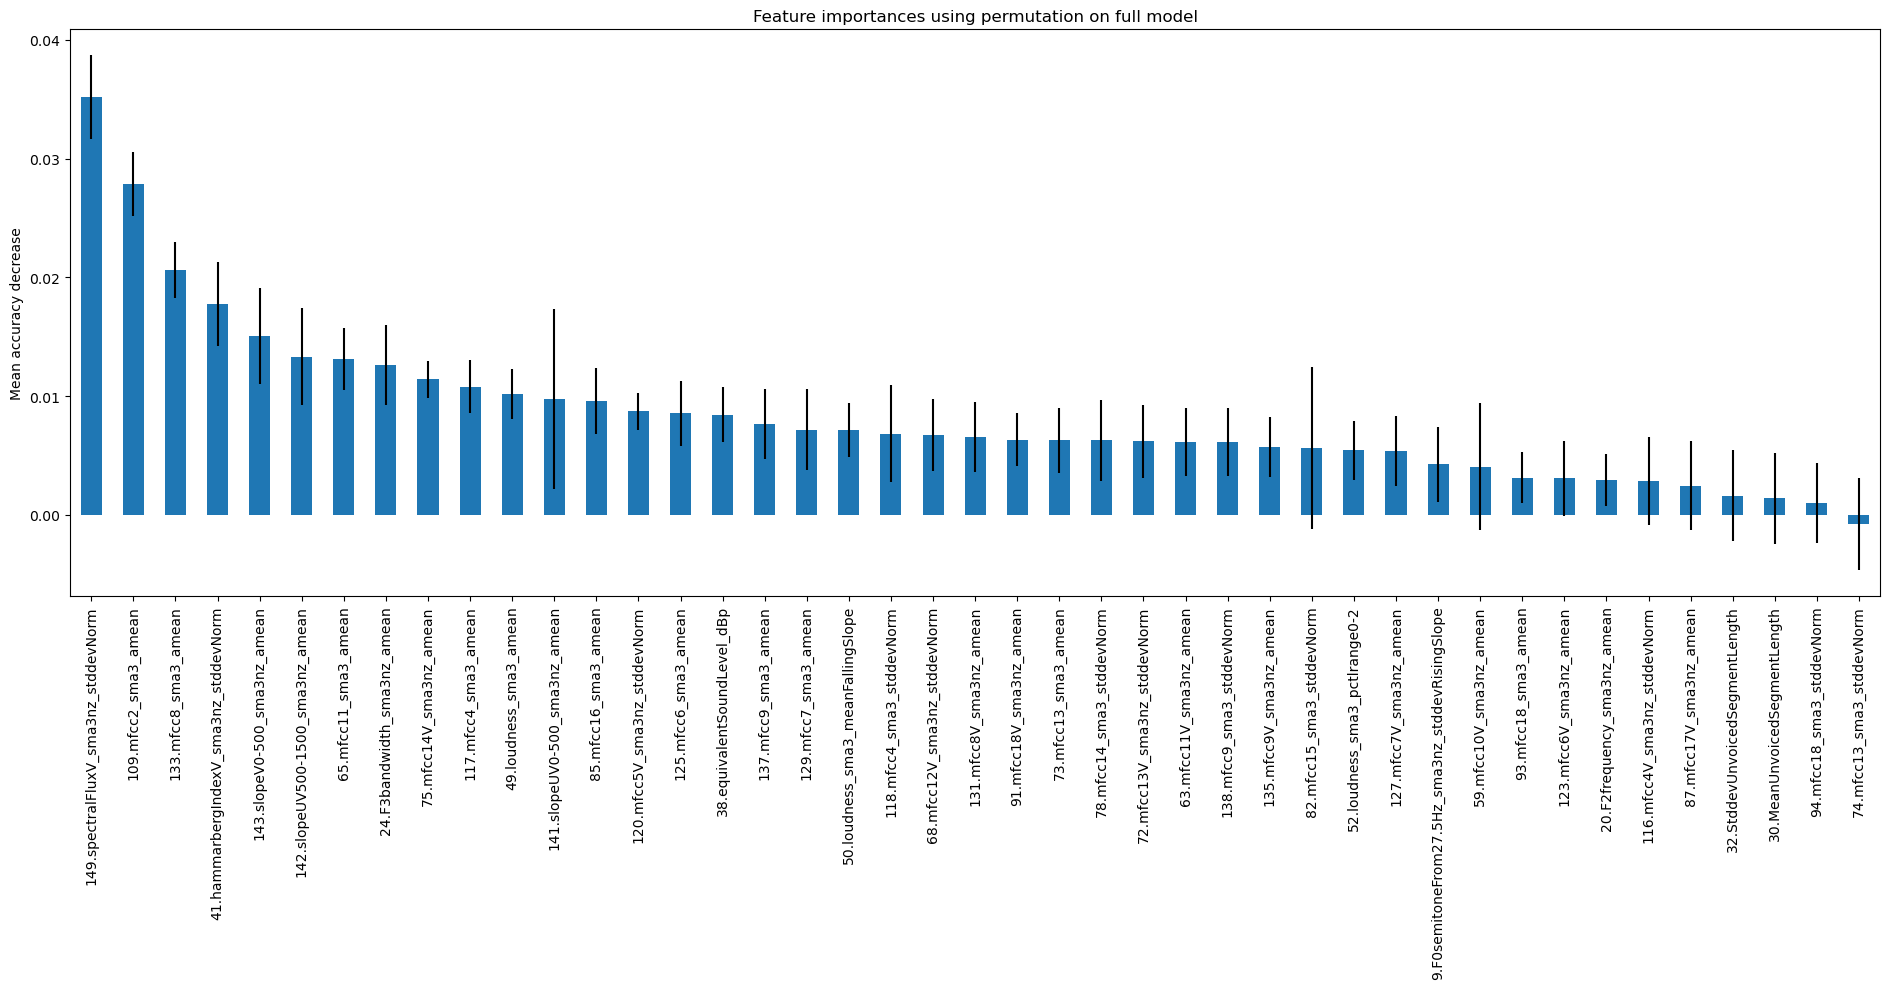

149
109
133
41
143
142
65
24
75
117
49
141
85
120
125
38
137
129
50
118
68
131
91
73
78
72
63
138
135
82
52
127
9
59
93
123
20
116
87
32
30
94
149
109
133
41
143
142
65
24
75
117
49
141
85
120
125
38
137
129
50
118
68
131
91
73
78
72
63
138
135
82
52
127
9
59
93
123
20
116
87
32
30
94
42 42
[149, 109, 133, 41, 143, 142, 65, 24, 75, 117, 49, 141, 85, 120, 125, 38, 137, 129, 50, 118, 68, 131, 91, 73, 78, 72, 63, 138, 135, 82, 52, 127, 9, 59, 93, 123, 20, 116, 87, 32, 30, 94]
[68, 109, 30, 94, 91, 118, 24, 137, 20, 59, 50, 120, 78, 149, 133, 142, 9, 135, 85, 129, 127, 82, 63, 75, 117, 138, 49, 38, 123, 41, 32, 125, 65, 131, 141, 52, 72, 143, 73, 116, 93, 87]
15290
42
<class 'numpy.float32'>
42
42
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.77747989 0.78233438]
Recall: [0.92651757 0.49899396]
F1-score: [0.84548105 0.60933661]
confusion_matri

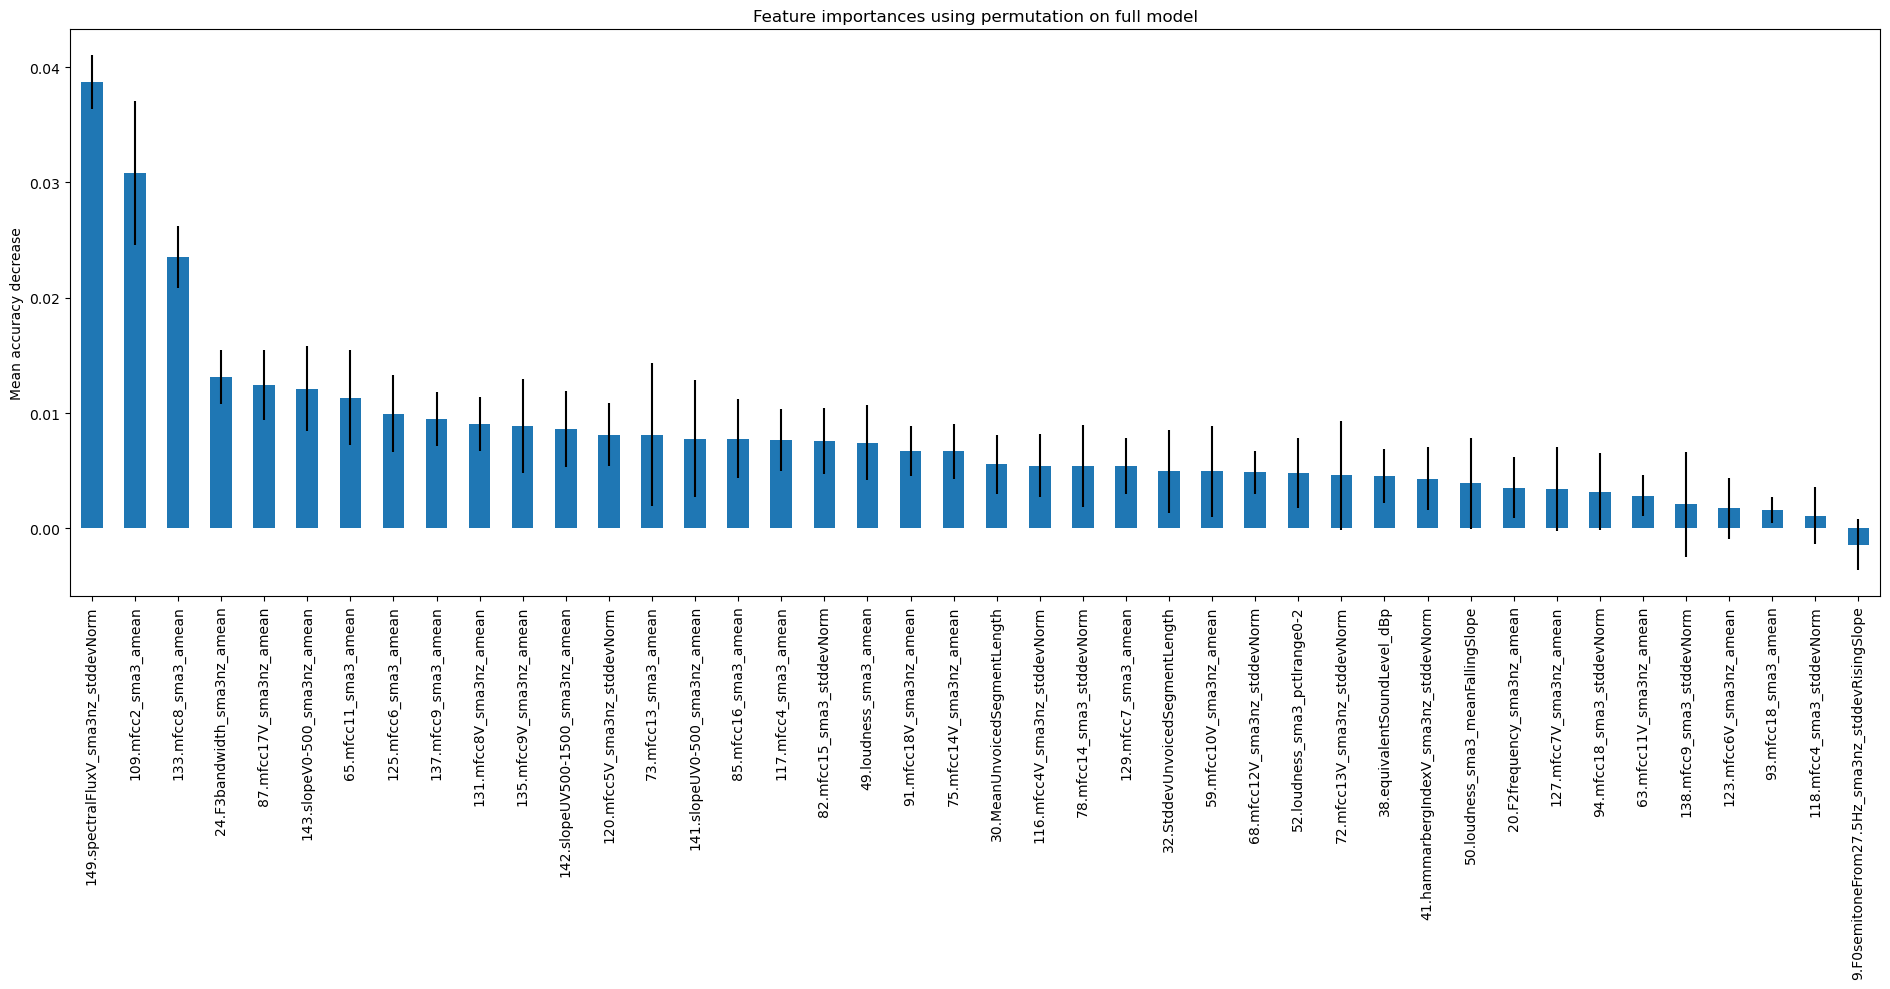

149
109
133
24
87
143
65
125
137
131
135
142
120
73
141
85
117
82
49
91
75
30
116
78
129
32
59
68
52
72
38
41
50
20
127
94
63
138
123
93
118
149
109
133
24
87
143
65
125
137
131
135
142
120
73
141
85
117
82
49
91
75
30
116
78
129
32
59
68
52
72
38
41
50
20
127
94
63
138
123
93
118
41 41
[149, 109, 133, 24, 87, 143, 65, 125, 137, 131, 135, 142, 120, 73, 141, 85, 117, 82, 49, 91, 75, 30, 116, 78, 129, 32, 59, 68, 52, 72, 38, 41, 50, 20, 127, 94, 63, 138, 123, 93, 118]
[135, 87, 24, 30, 85, 52, 82, 93, 143, 131, 117, 133, 72, 41, 149, 75, 142, 65, 138, 68, 141, 120, 50, 78, 127, 129, 137, 94, 32, 91, 125, 116, 73, 109, 38, 49, 63, 59, 123, 118, 20]
15290
41
<class 'numpy.float32'>
41
41
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78630137 0.771261  ]
Recall: [0.91693291 0.52917505]
F1-score: [0.84660767 0.62768496]
confusion_matrix:
[[861  

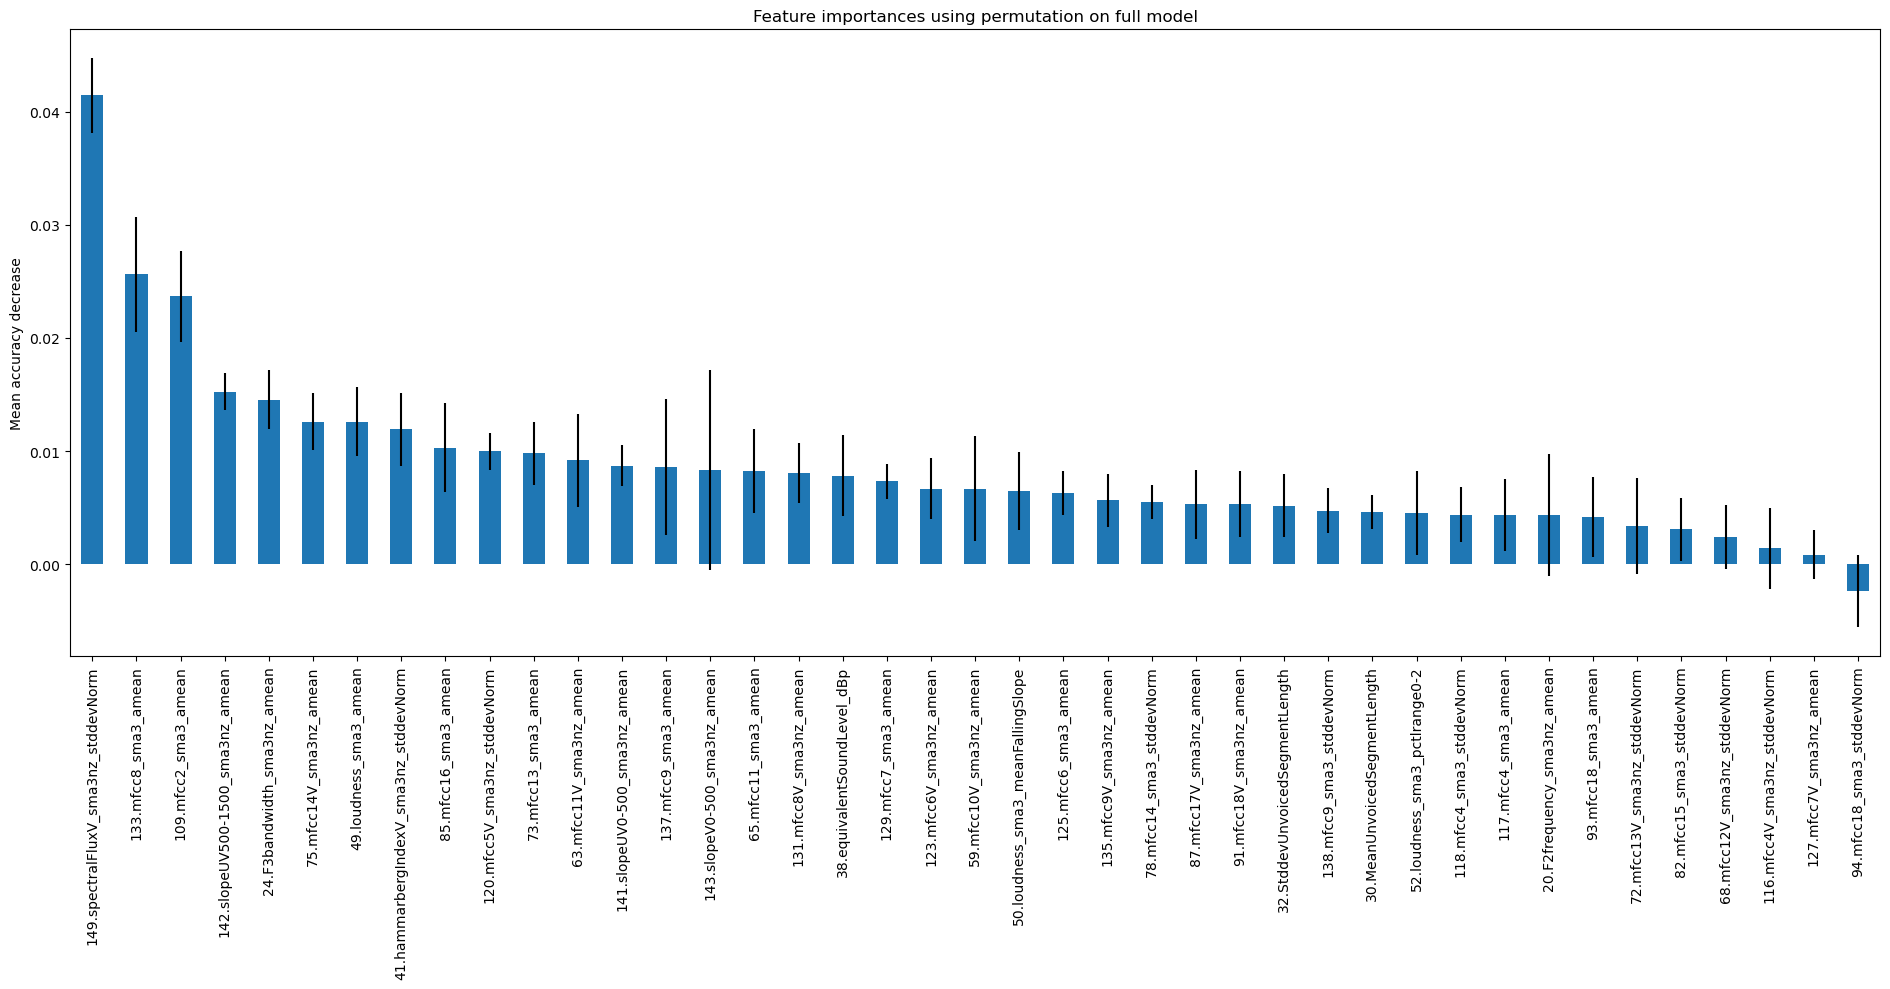

149
133
109
142
24
75
49
41
85
120
73
63
141
137
143
65
131
38
129
123
59
50
125
135
78
87
91
32
138
30
52
118
117
20
93
72
82
68
116
127
149
133
109
142
24
75
49
41
85
120
73
63
141
137
143
65
131
38
129
123
59
50
125
135
78
87
91
32
138
30
52
118
117
20
93
72
82
68
116
127
40 40
[149, 133, 109, 142, 24, 75, 49, 41, 85, 120, 73, 63, 141, 137, 143, 65, 131, 38, 129, 123, 59, 50, 125, 135, 78, 87, 91, 32, 138, 30, 52, 118, 117, 20, 93, 72, 82, 68, 116, 127]
[125, 41, 59, 123, 63, 135, 131, 109, 73, 137, 118, 93, 75, 65, 38, 24, 72, 120, 50, 138, 52, 49, 127, 20, 142, 82, 87, 129, 116, 68, 143, 133, 141, 32, 117, 91, 85, 149, 30, 78]
15290
40
<class 'numpy.float32'>
40
40
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78702011 0.77192982]
Recall: [0.91693291 0.53118712]
F1-score: [0.8470241  0.62932062]
confusion_matrix:
[[861  78]
 [233 264]

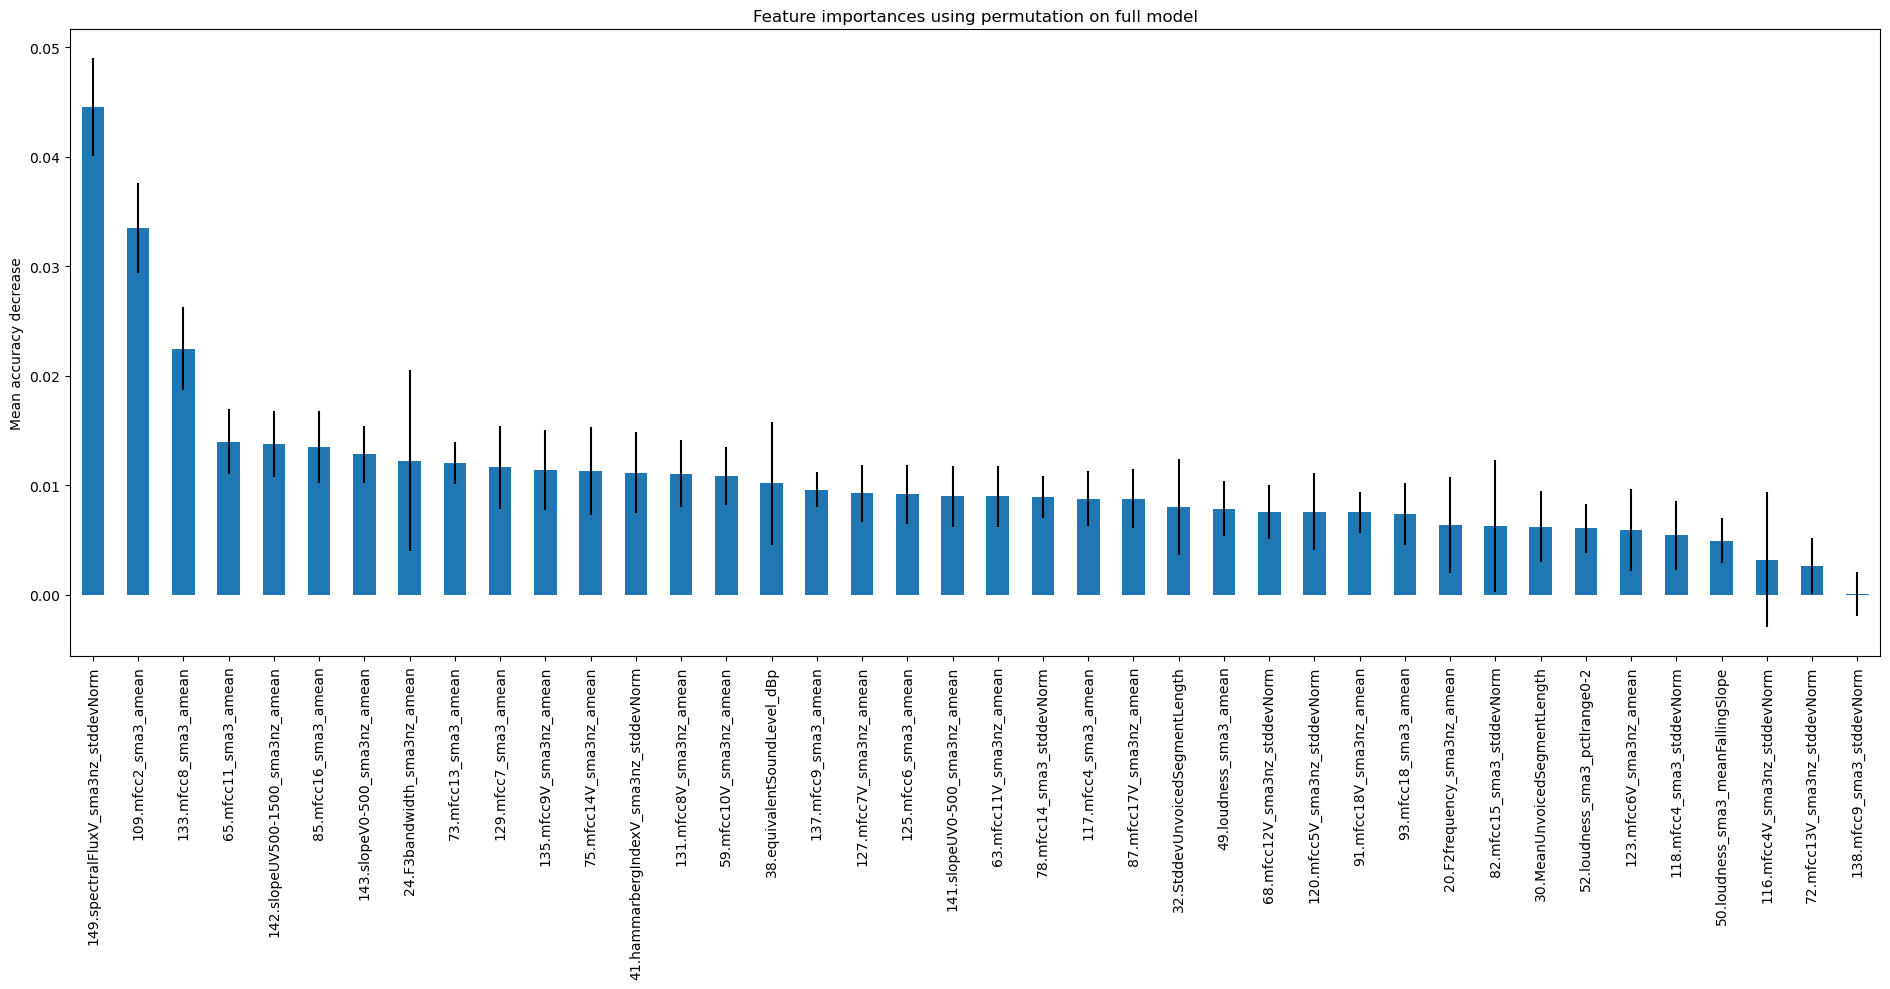

149
109
133
65
142
85
143
24
73
129
135
75
41
131
59
38
137
127
125
141
63
78
117
87
32
49
68
120
91
93
20
82
30
52
123
118
50
116
72
138
149
109
133
65
142
85
143
24
73
129
135
75
41
131
59
38
137
127
125
141
63
78
117
87
32
49
68
120
91
93
20
82
30
52
123
118
50
116
72
138
39 40
[149, 109, 133, 65, 142, 85, 143, 24, 73, 129, 135, 75, 41, 131, 59, 38, 137, 127, 125, 141, 63, 78, 117, 87, 32, 49, 68, 120, 91, 93, 20, 82, 30, 52, 123, 118, 50, 116, 72]
[50, 78, 135, 141, 143, 32, 82, 73, 72, 149, 63, 20, 131, 75, 68, 30, 38, 125, 127, 24, 137, 120, 41, 142, 49, 133, 87, 59, 93, 123, 109, 91, 65, 129, 117, 85, 118, 52, 116]
15290
39
<class 'numpy.float32'>
39
39
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79240037 0.76470588]
Recall: [0.91054313 0.54929577]
F1-score: [0.84737364 0.63934426]
confusion_matrix:
[[855  84]
 [224 273]]
accuracy

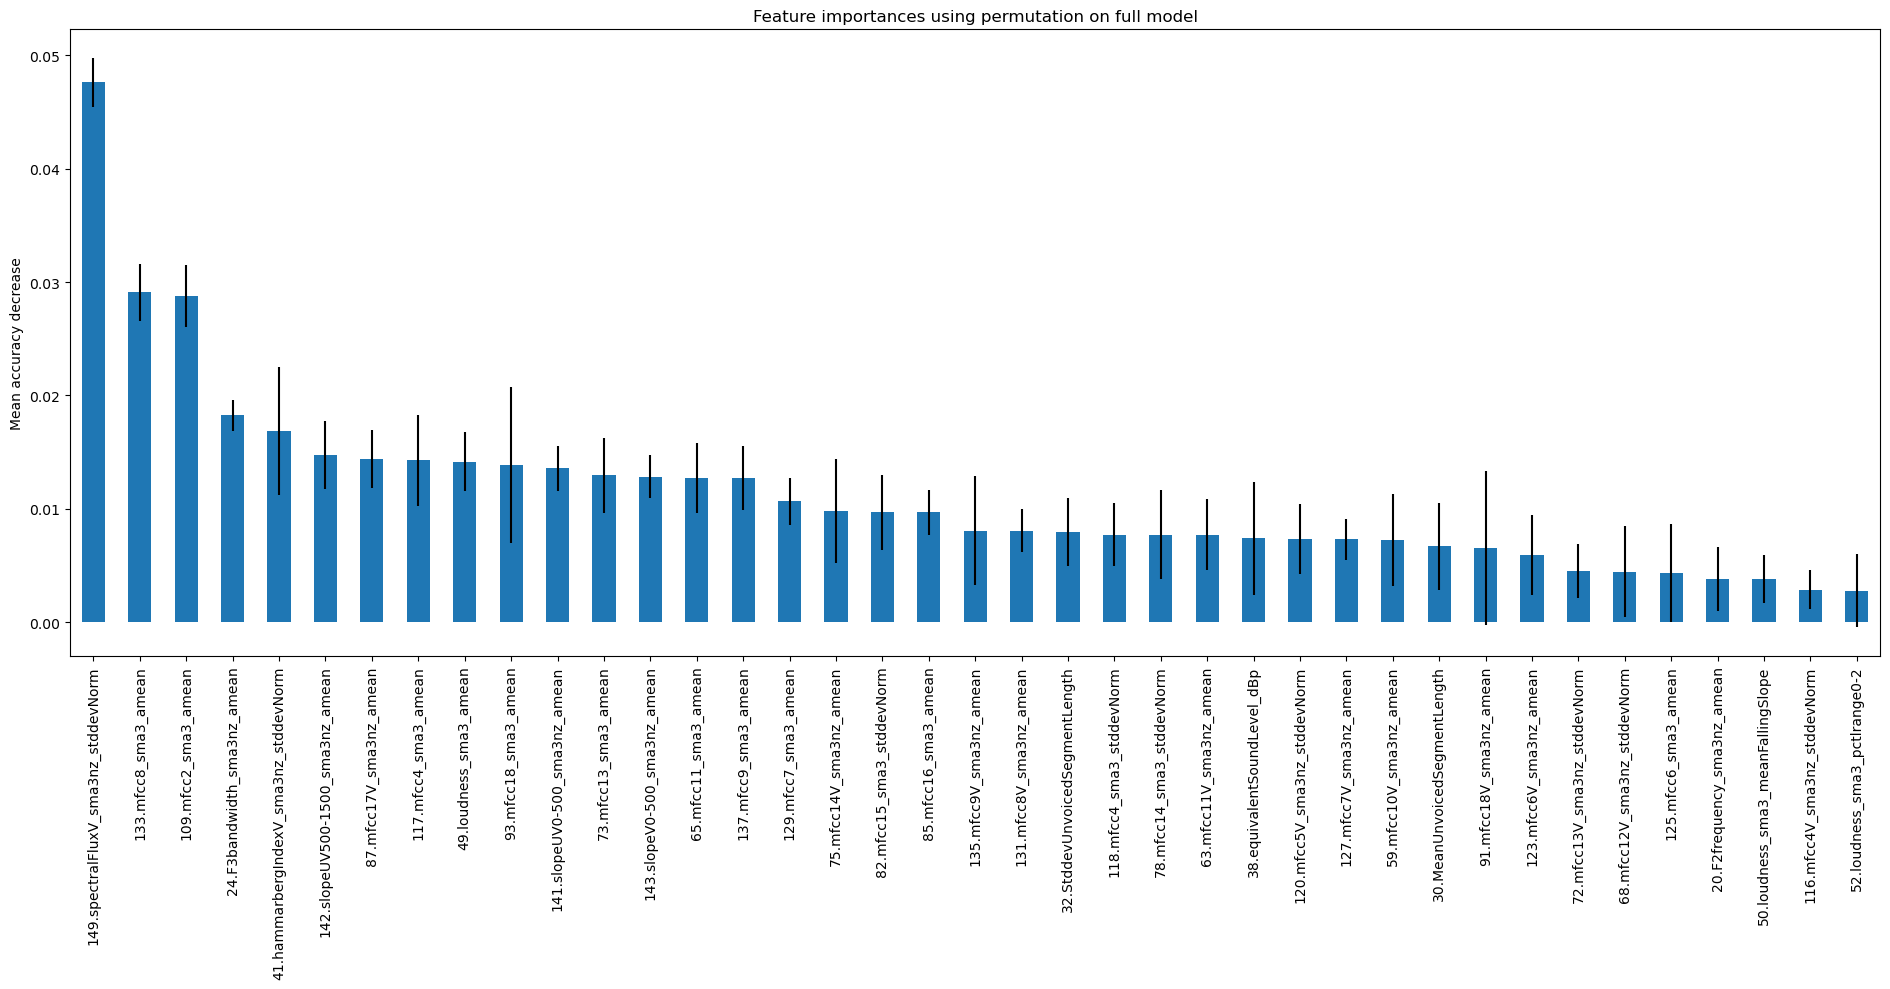

149
133
109
24
41
142
87
117
49
93
141
73
143
65
137
129
75
82
85
135
131
32
118
78
63
38
120
127
59
30
91
123
72
68
125
20
50
116
52
149
133
109
24
41
142
87
117
49
93
141
73
143
65
137
129
75
82
85
135
131
32
118
78
63
38
120
127
59
30
91
123
72
68
125
20
50
116
52
38 39
[149, 133, 109, 24, 41, 142, 87, 117, 49, 93, 141, 73, 143, 65, 137, 129, 75, 82, 85, 135, 131, 32, 118, 78, 63, 38, 120, 127, 59, 30, 91, 123, 72, 68, 125, 20, 50, 116]
[127, 87, 129, 20, 73, 123, 30, 85, 135, 32, 118, 116, 72, 65, 131, 125, 82, 68, 143, 91, 49, 93, 63, 50, 109, 78, 142, 38, 59, 41, 137, 149, 75, 24, 117, 120, 141, 133]
15290
38
<class 'numpy.float32'>
38
38
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79530516 0.75202156]
Recall: [0.90202343 0.56136821]
F1-score: [0.84530938 0.64285714]
confusion_matrix:
[[847  92]
 [218 279]]
accuracy:
0.784122562674

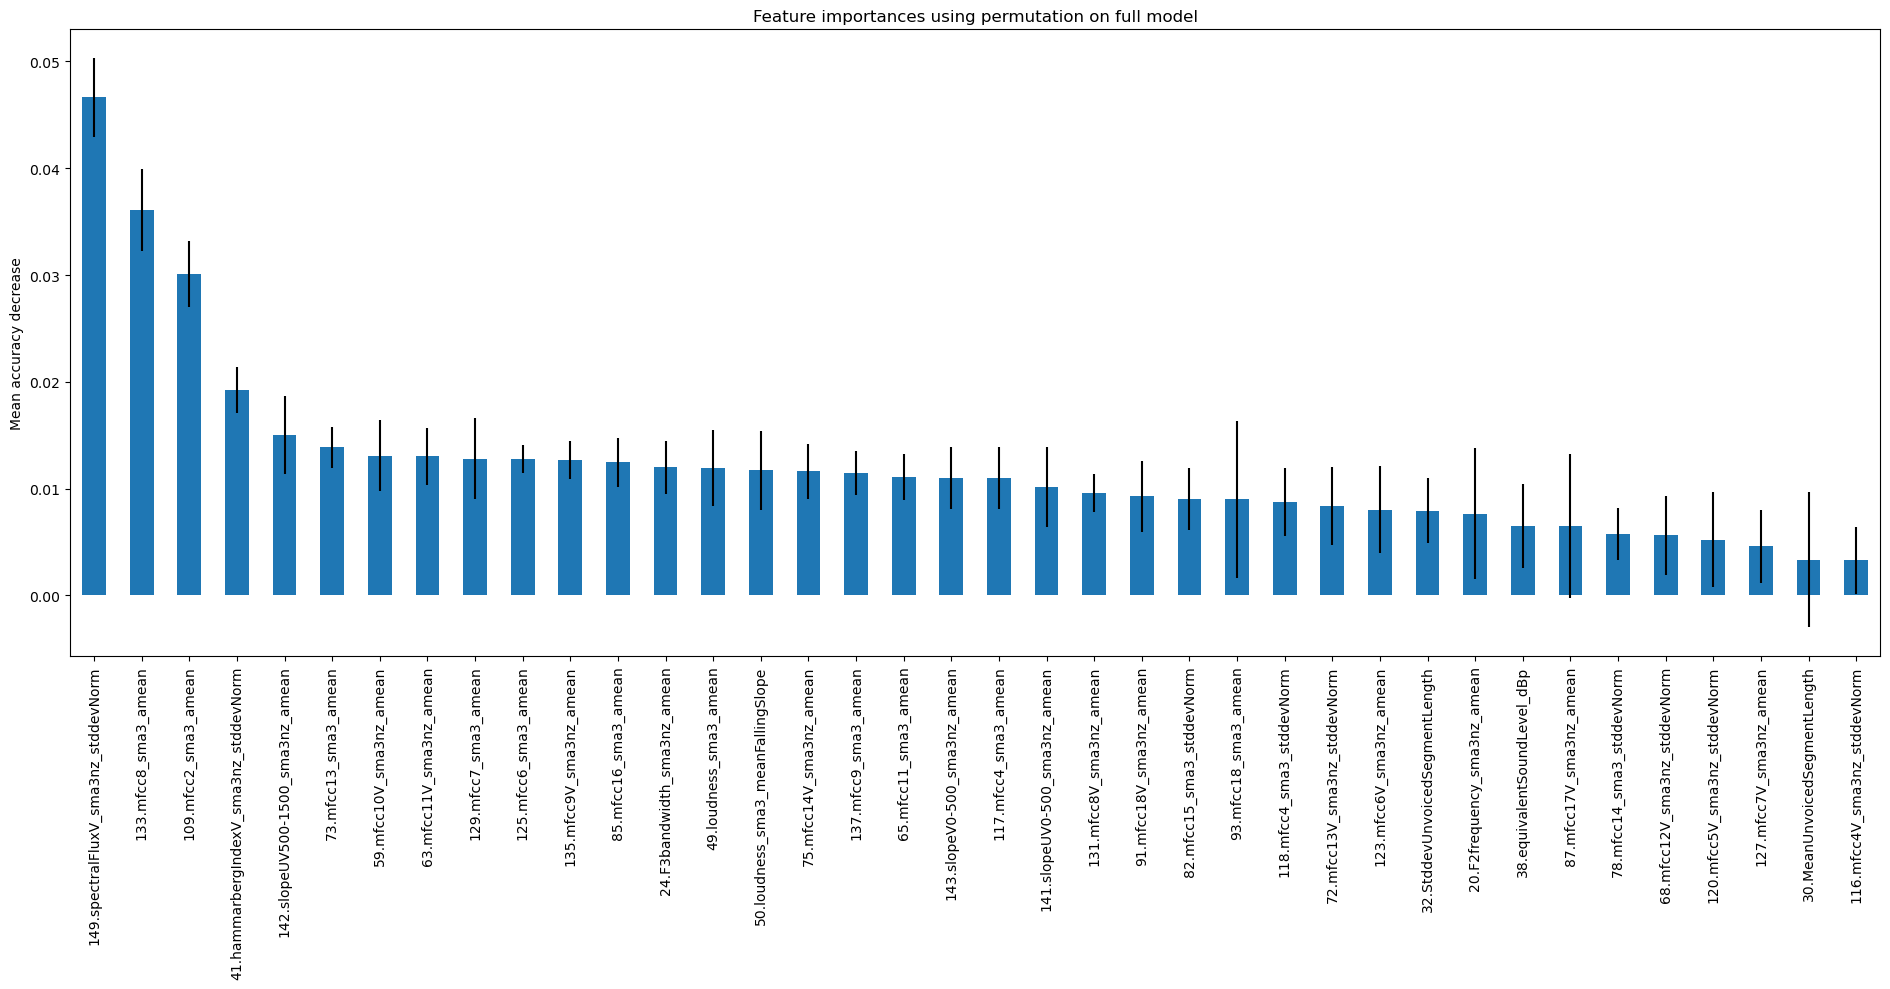

149
133
109
41
142
73
59
63
129
125
135
85
24
49
50
75
137
65
143
117
141
131
91
82
93
118
72
123
32
20
38
87
78
68
120
127
30
116
149
133
109
41
142
73
59
63
129
125
135
85
24
49
50
75
137
65
143
117
141
131
91
82
93
118
72
123
32
20
38
87
78
68
120
127
30
116
37 38
[149, 133, 109, 41, 142, 73, 59, 63, 129, 125, 135, 85, 24, 49, 50, 75, 137, 65, 143, 117, 141, 131, 91, 82, 93, 118, 72, 123, 32, 20, 38, 87, 78, 68, 120, 127, 30]
[118, 41, 30, 129, 120, 78, 141, 131, 82, 125, 133, 24, 49, 137, 50, 63, 117, 91, 123, 142, 143, 32, 85, 38, 93, 65, 68, 59, 73, 87, 72, 75, 135, 20, 127, 149, 109]
15290
37
<class 'numpy.float32'>
37
37
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78812785 0.7771261 ]
Recall: [0.91906283 0.5331992 ]
F1-score: [0.84857424 0.63245823]
confusion_matrix:
[[863  76]
 [232 265]]
accuracy:
0.7855153203342619

forest_imp

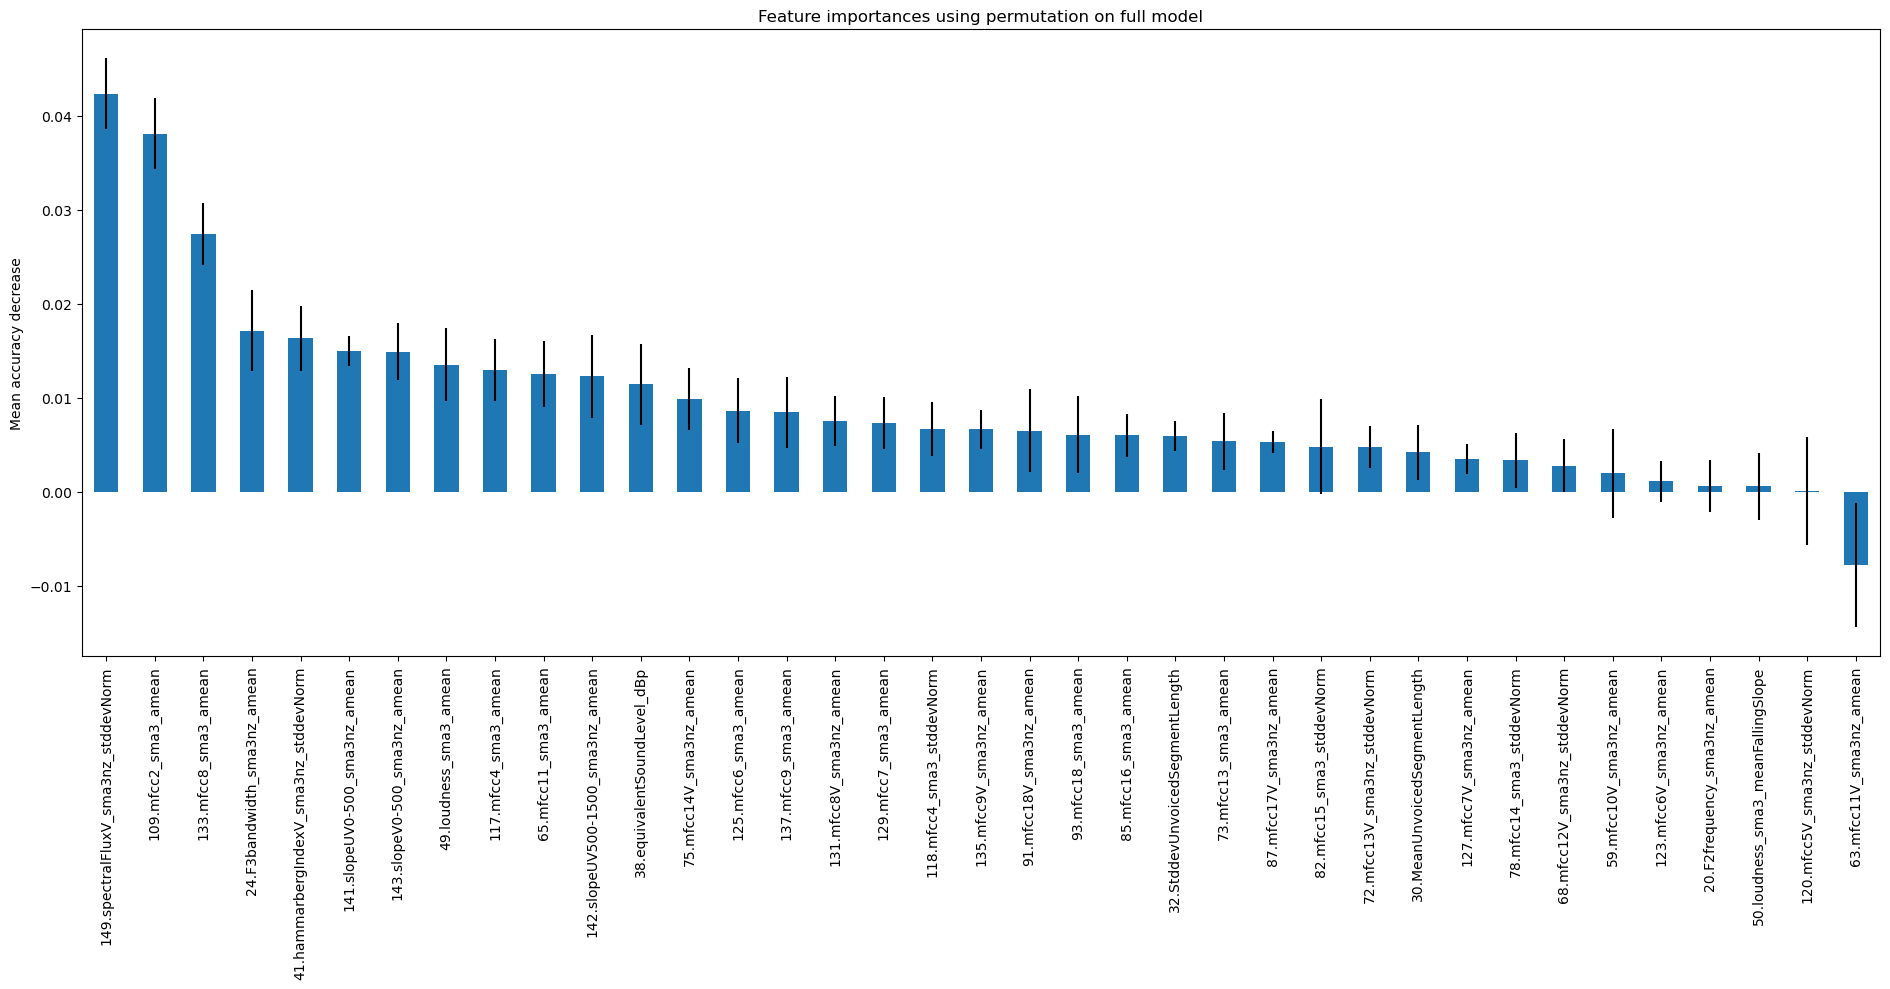

149
109
133
24
41
141
143
49
117
65
142
38
75
125
137
131
129
118
135
91
93
85
32
73
87
82
72
30
127
78
68
59
123
20
50
120
149
109
133
24
41
141
143
49
117
65
142
38
75
125
137
131
129
118
135
91
93
85
32
73
87
82
72
30
127
78
68
59
123
20
50
120
36 36
[149, 109, 133, 24, 41, 141, 143, 49, 117, 65, 142, 38, 75, 125, 137, 131, 129, 118, 135, 91, 93, 85, 32, 73, 87, 82, 72, 30, 127, 78, 68, 59, 123, 20, 50, 120]
[131, 149, 87, 123, 38, 78, 141, 93, 117, 41, 135, 137, 75, 68, 125, 73, 65, 50, 20, 142, 133, 129, 49, 127, 32, 85, 120, 118, 91, 82, 72, 109, 30, 24, 59, 143]
15290
36
<class 'numpy.float32'>
36
36
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.7883549  0.75706215]
Recall: [0.90841321 0.53923541]
F1-score: [0.84413657 0.62984724]
confusion_matrix:
[[853  86]
 [229 268]]
accuracy:
0.7806406685236769

forest_importances 131.mfcc8V_sm

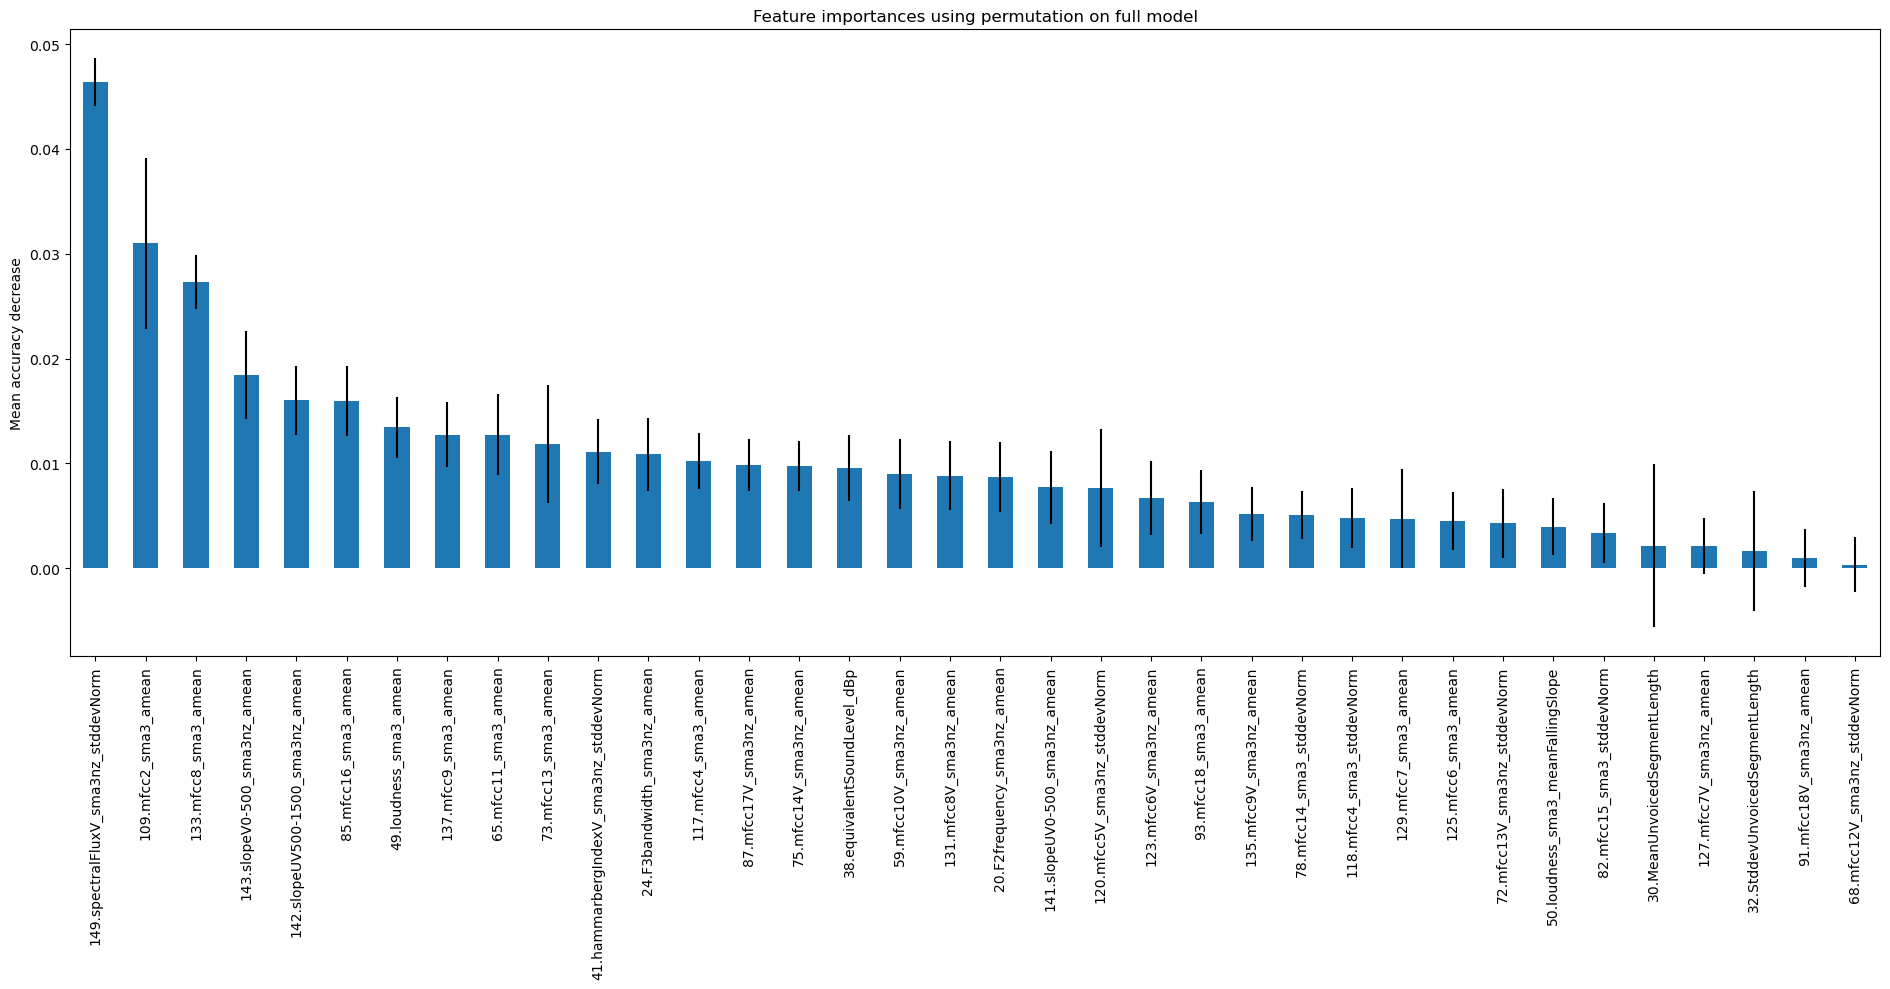

149
109
133
143
142
85
49
137
65
73
41
24
117
87
75
38
59
131
20
141
120
123
93
135
78
118
129
125
72
50
82
30
127
32
91
68
149
109
133
143
142
85
49
137
65
73
41
24
117
87
75
38
59
131
20
141
120
123
93
135
78
118
129
125
72
50
82
30
127
32
91
68
35 36
[149, 109, 133, 143, 142, 85, 49, 137, 65, 73, 41, 24, 117, 87, 75, 38, 59, 131, 20, 141, 120, 123, 93, 135, 78, 118, 129, 125, 72, 50, 82, 30, 127, 32, 91]
[50, 59, 32, 49, 141, 118, 65, 142, 133, 120, 109, 149, 93, 143, 75, 78, 72, 85, 135, 30, 125, 87, 137, 117, 82, 38, 123, 24, 131, 129, 91, 41, 73, 20, 127]
15290
35
<class 'numpy.float32'>
35
35
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78564857 0.75644699]
Recall: [0.90947817 0.53118712]
F1-score: [0.84304047 0.62411348]
confusion_matrix:
[[854  85]
 [233 264]]
accuracy:
0.7785515320334262

forest_importances 50.loudness_sma3_mean

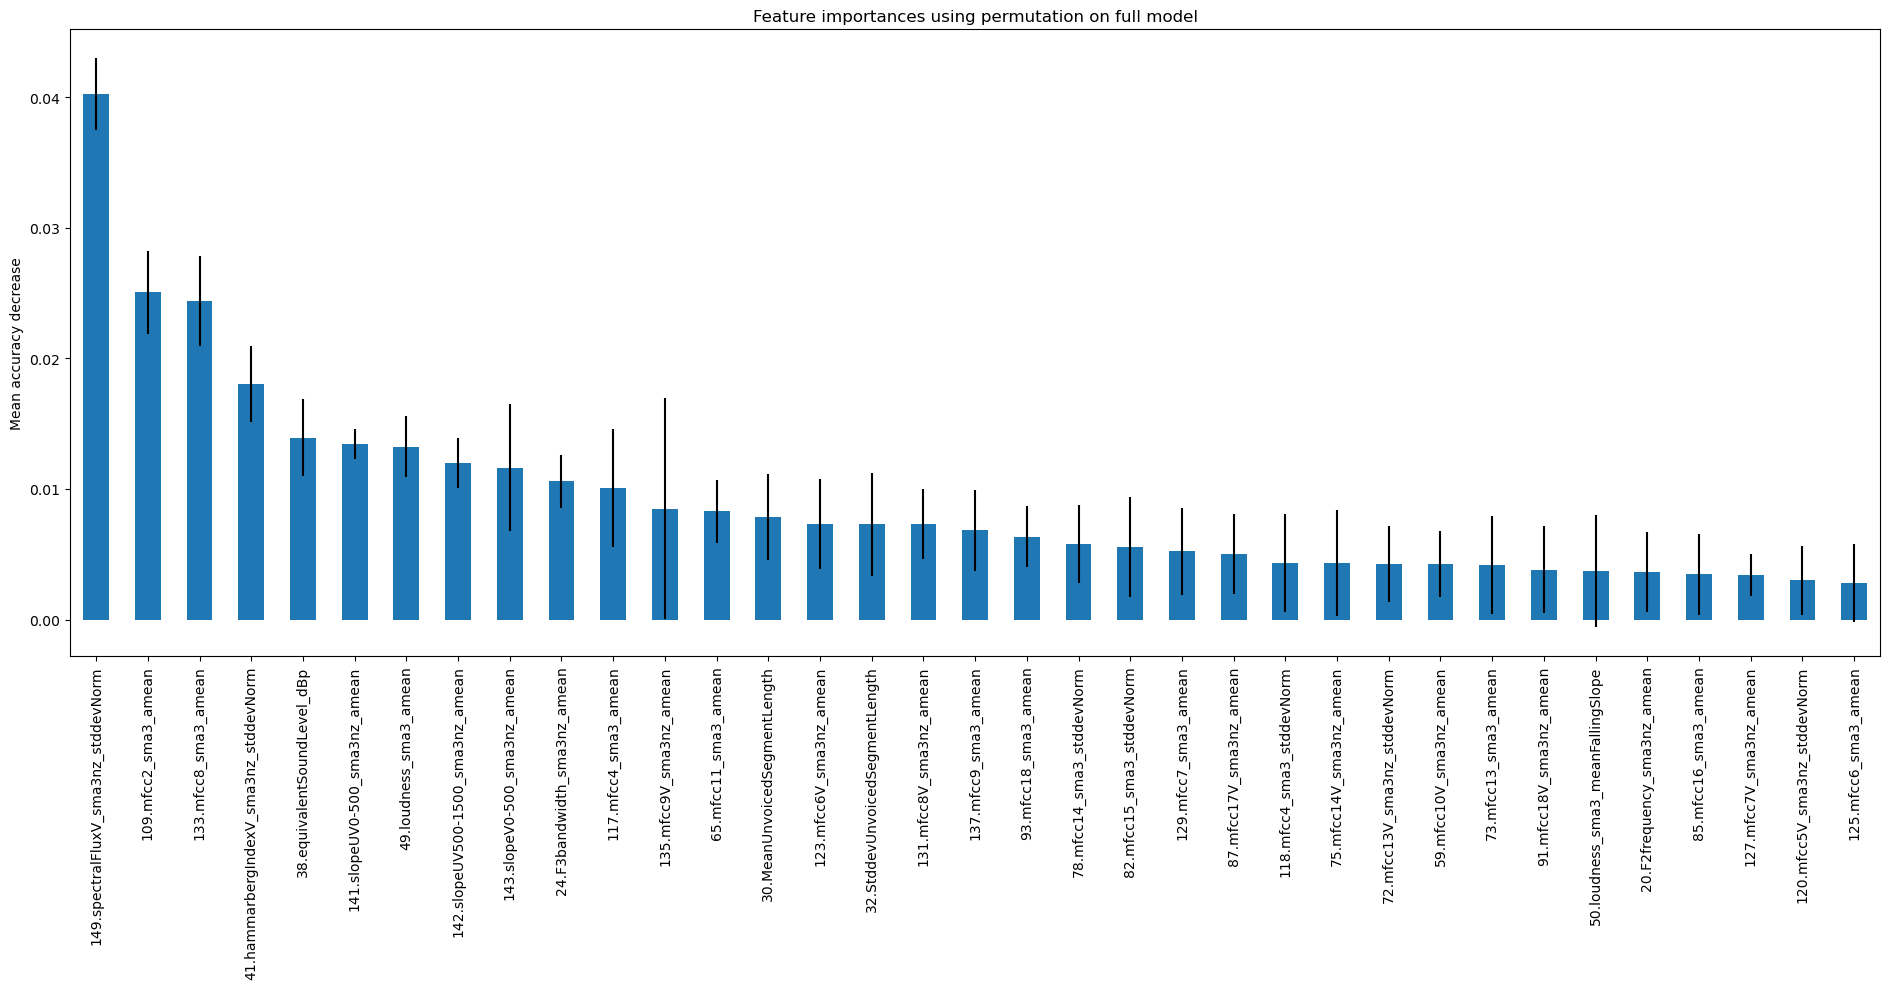

149
109
133
41
38
141
49
142
143
24
117
135
65
30
123
32
131
137
93
78
82
129
87
118
75
72
59
73
91
50
20
85
127
120
125
149
109
133
41
38
141
49
142
143
24
117
135
65
30
123
32
131
137
93
78
82
129
87
118
75
72
59
73
91
50
20
85
127
120
125
34 35
[149, 109, 133, 41, 38, 141, 49, 142, 143, 24, 117, 135, 65, 30, 123, 32, 131, 137, 93, 78, 82, 129, 87, 118, 75, 72, 59, 73, 91, 50, 20, 85, 127, 120]
[87, 129, 118, 141, 93, 120, 78, 41, 30, 65, 109, 75, 85, 123, 72, 73, 20, 131, 143, 137, 135, 133, 117, 38, 91, 142, 50, 49, 149, 59, 24, 82, 32, 127]
15290
34
<class 'numpy.float32'>
34
34
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.77930403 0.74418605]
Recall: [0.90628328 0.51509054]
F1-score: [0.83801083 0.60879905]
confusion_matrix:
[[851  88]
 [241 256]]
accuracy:
0.770891364902507

forest_importances 87.mfcc17V_sma3nz_amean               

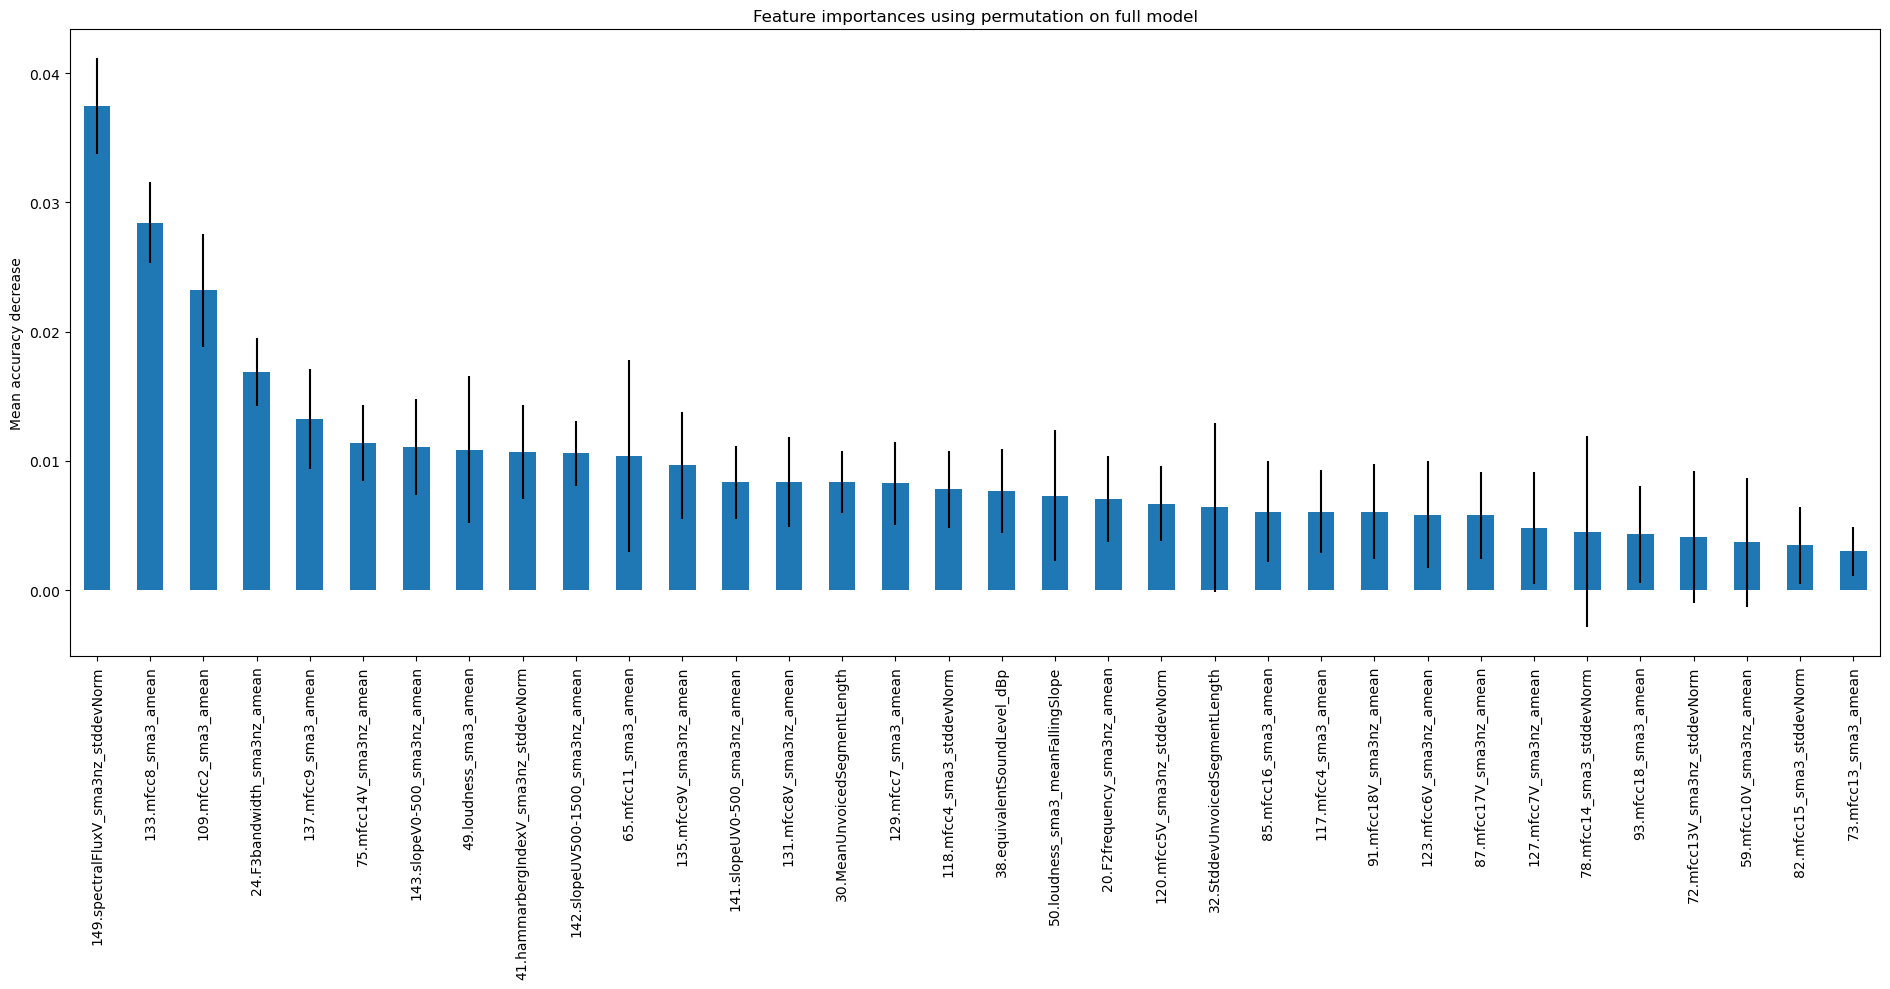

149
133
109
24
137
75
143
49
41
142
65
135
141
131
30
129
118
38
50
20
120
32
85
117
91
123
87
127
78
93
72
59
82
73
149
133
109
24
137
75
143
49
41
142
65
135
141
131
30
129
118
38
50
20
120
32
85
117
91
123
87
127
78
93
72
59
82
73
33 34
[149, 133, 109, 24, 137, 75, 143, 49, 41, 142, 65, 135, 141, 131, 30, 129, 118, 38, 50, 20, 120, 32, 85, 117, 91, 123, 87, 127, 78, 93, 72, 59, 82]
[133, 24, 109, 50, 91, 38, 87, 149, 32, 41, 75, 123, 20, 141, 135, 127, 143, 82, 129, 117, 65, 142, 131, 118, 49, 120, 78, 30, 59, 137, 72, 93, 85]
15290
33
<class 'numpy.float32'>
33
33
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78643446 0.76521739]
Recall: [0.91373802 0.53118712]
F1-score: [0.8453202  0.62707838]
confusion_matrix:
[[858  81]
 [233 264]]
accuracy:
0.7813370473537604

forest_importances 133.mfcc8_sma3_amean                     0.023886
24.

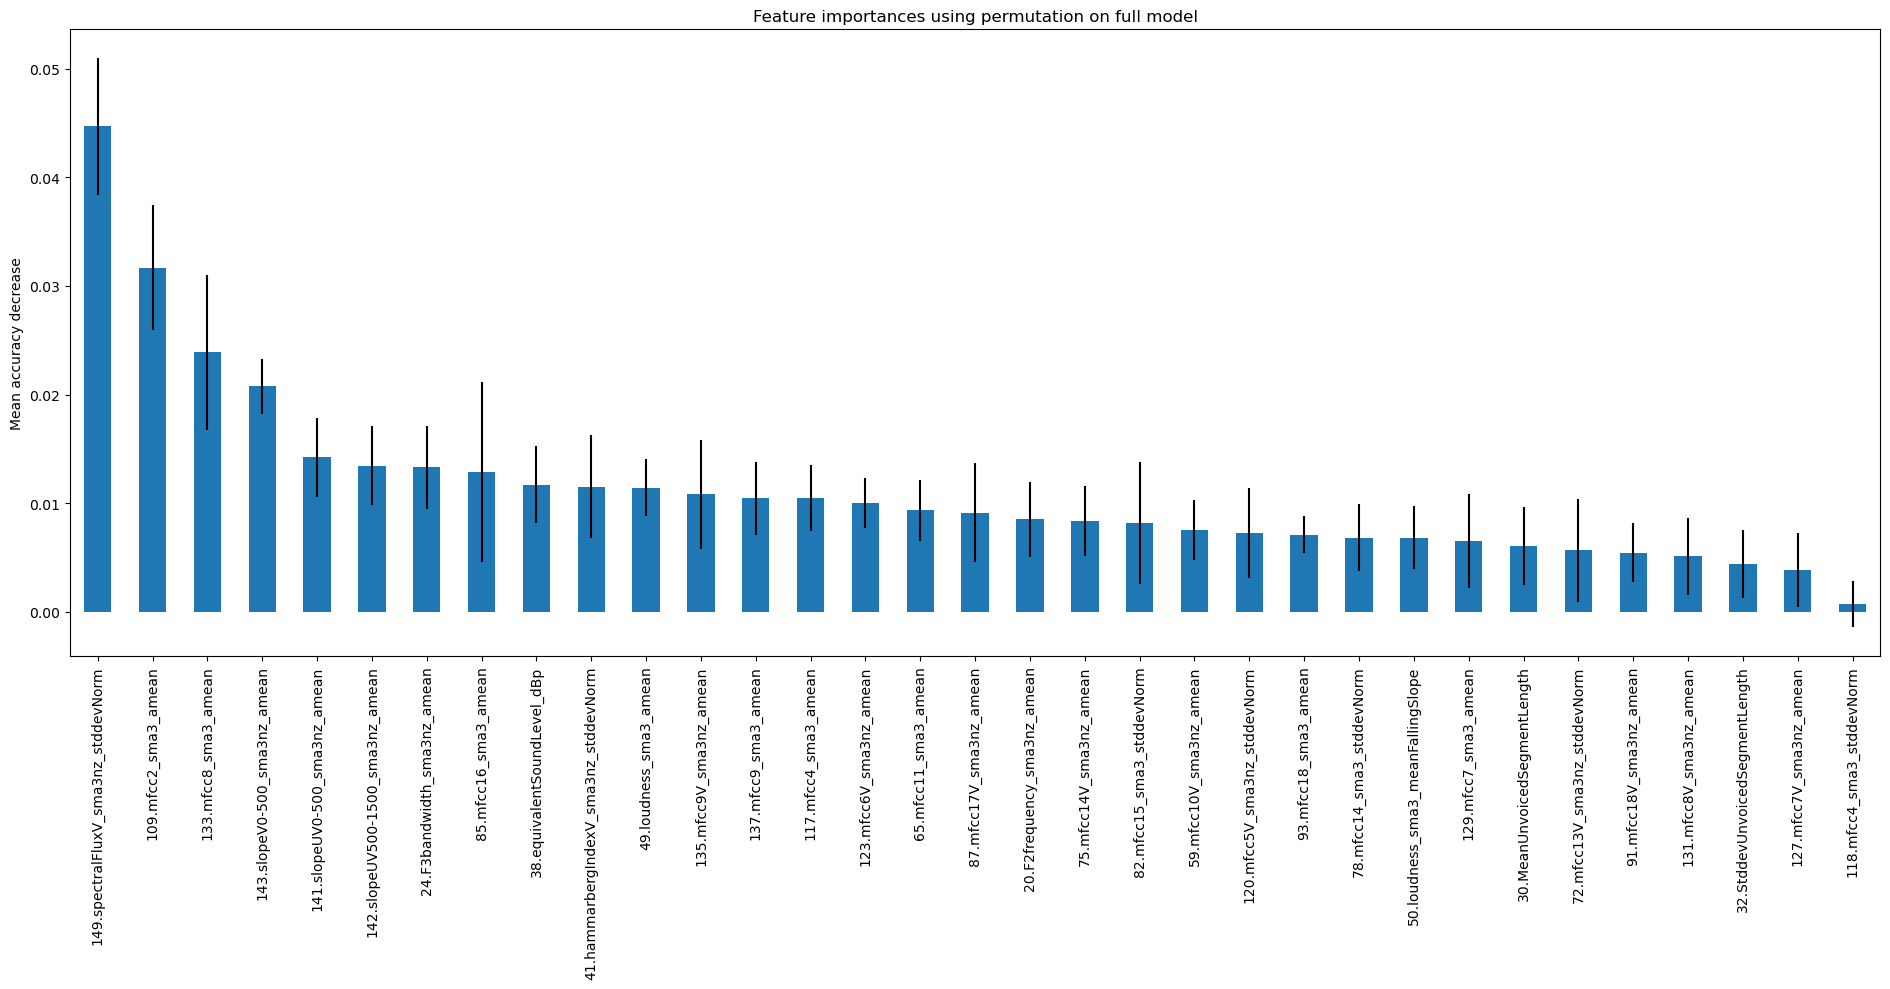

149
109
133
143
141
142
24
85
38
41
49
135
137
117
123
65
87
20
75
82
59
120
93
78
50
129
30
72
91
131
32
127
118
149
109
133
143
141
142
24
85
38
41
49
135
137
117
123
65
87
20
75
82
59
120
93
78
50
129
30
72
91
131
32
127
118
32 33
[149, 109, 133, 143, 141, 142, 24, 85, 38, 41, 49, 135, 137, 117, 123, 65, 87, 20, 75, 82, 59, 120, 93, 78, 50, 129, 30, 72, 91, 131, 32, 127]
[91, 49, 85, 82, 149, 143, 30, 141, 20, 50, 129, 65, 123, 127, 87, 120, 75, 93, 131, 78, 135, 137, 59, 133, 38, 41, 142, 72, 109, 117, 32, 24]
15290
32
<class 'numpy.float32'>
32
32
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78883721 0.74792244]
Recall: [0.90308839 0.54325956]
F1-score: [0.84210526 0.62937063]
confusion_matrix:
[[848  91]
 [227 270]]
accuracy:
0.7785515320334262

forest_importances 91.mfcc18V_sma3nz_amean                  0.008357
49.loudness_sma3_am

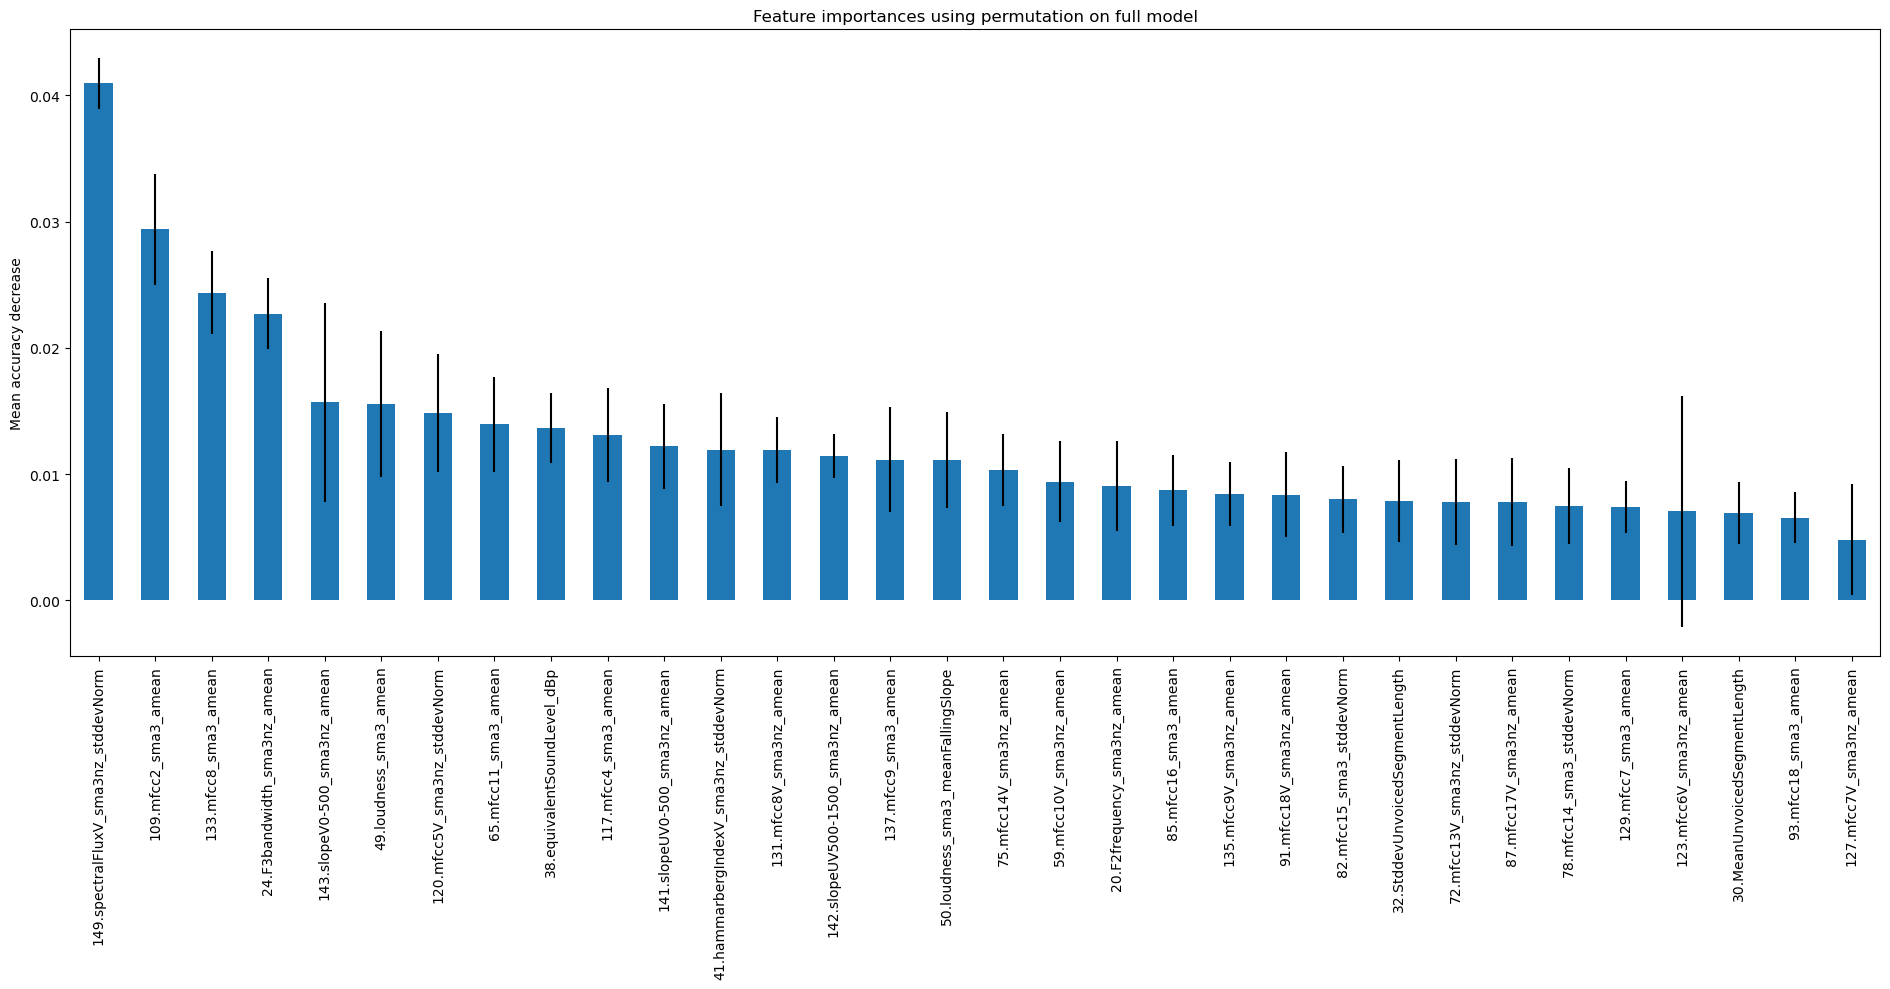

149
109
133
24
143
49
120
65
38
117
141
41
131
142
137
50
75
59
20
85
135
91
82
32
72
87
78
129
123
30
93
127
149
109
133
24
143
49
120
65
38
117
141
41
131
142
137
50
75
59
20
85
135
91
82
32
72
87
78
129
123
30
93
127
31 32
[149, 109, 133, 24, 143, 49, 120, 65, 38, 117, 141, 41, 131, 142, 137, 50, 75, 59, 20, 85, 135, 91, 82, 32, 72, 87, 78, 129, 123, 30, 93]
[137, 141, 30, 75, 50, 20, 149, 117, 49, 38, 91, 85, 24, 133, 135, 120, 65, 123, 131, 109, 143, 32, 41, 87, 93, 142, 129, 72, 78, 59, 82]
15290
31
<class 'numpy.float32'>
31
31
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78348624 0.75433526]
Recall: [0.90947817 0.52515091]
F1-score: [0.84179399 0.61921708]
confusion_matrix:
[[854  85]
 [236 261]]
accuracy:
0.7764623955431755

forest_importances 137.mfcc9_sma3_amean                     0.009889
141.slopeUV0-500_sma3nz_amean        

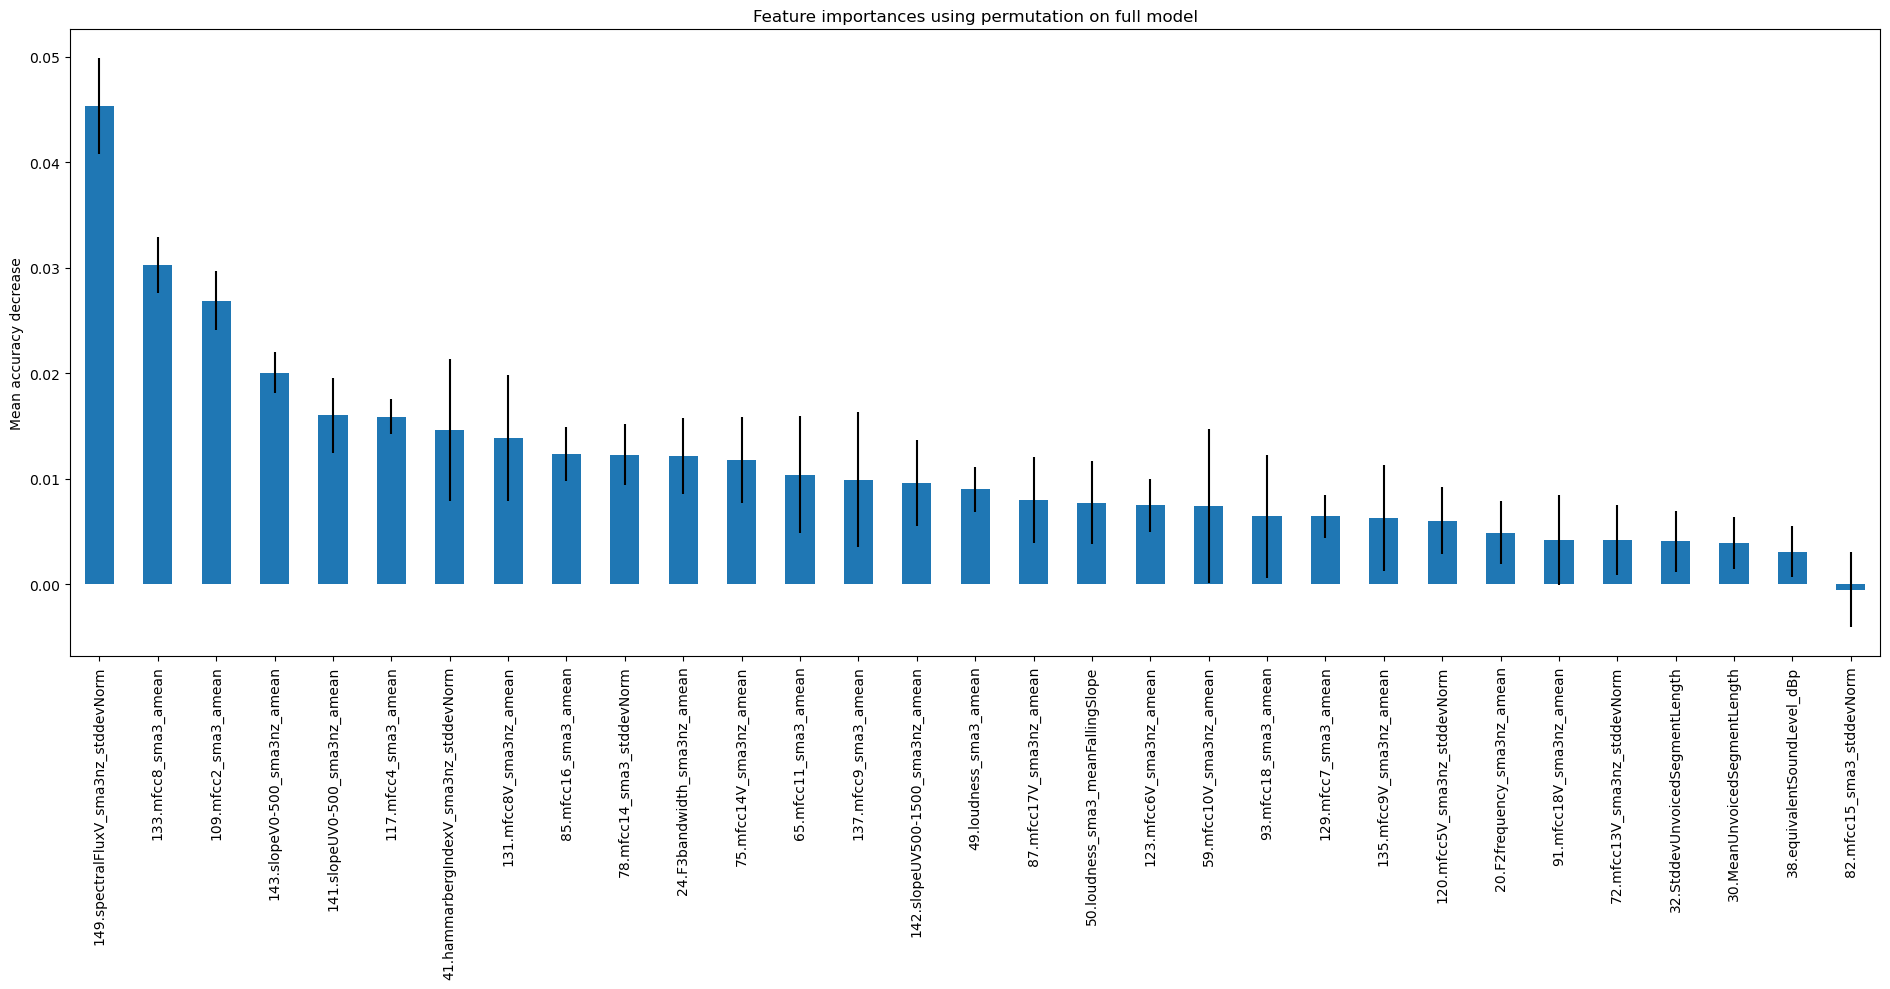

149
133
109
143
141
117
41
131
85
78
24
75
65
137
142
49
87
50
123
59
93
129
135
120
20
91
72
32
30
38
149
133
109
143
141
117
41
131
85
78
24
75
65
137
142
49
87
50
123
59
93
129
135
120
20
91
72
32
30
38
30 30
[149, 133, 109, 143, 141, 117, 41, 131, 85, 78, 24, 75, 65, 137, 142, 49, 87, 50, 123, 59, 93, 129, 135, 120, 20, 91, 72, 32, 30, 38]
[93, 123, 135, 32, 137, 85, 143, 149, 117, 65, 59, 78, 72, 24, 38, 30, 75, 49, 20, 129, 141, 142, 50, 91, 133, 41, 120, 109, 131, 87]
15290
30
<class 'numpy.float32'>
30
30
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78671656 0.73297003]
Recall: [0.89563365 0.54124748]
F1-score: [0.8376494  0.62268519]
confusion_matrix:
[[841  98]
 [228 269]]
accuracy:
0.7729805013927576

forest_importances 93.mfcc18_sma3_amean                     0.009471
123.mfcc6V_sma3nz_amean                  0.010097
135.mfcc9

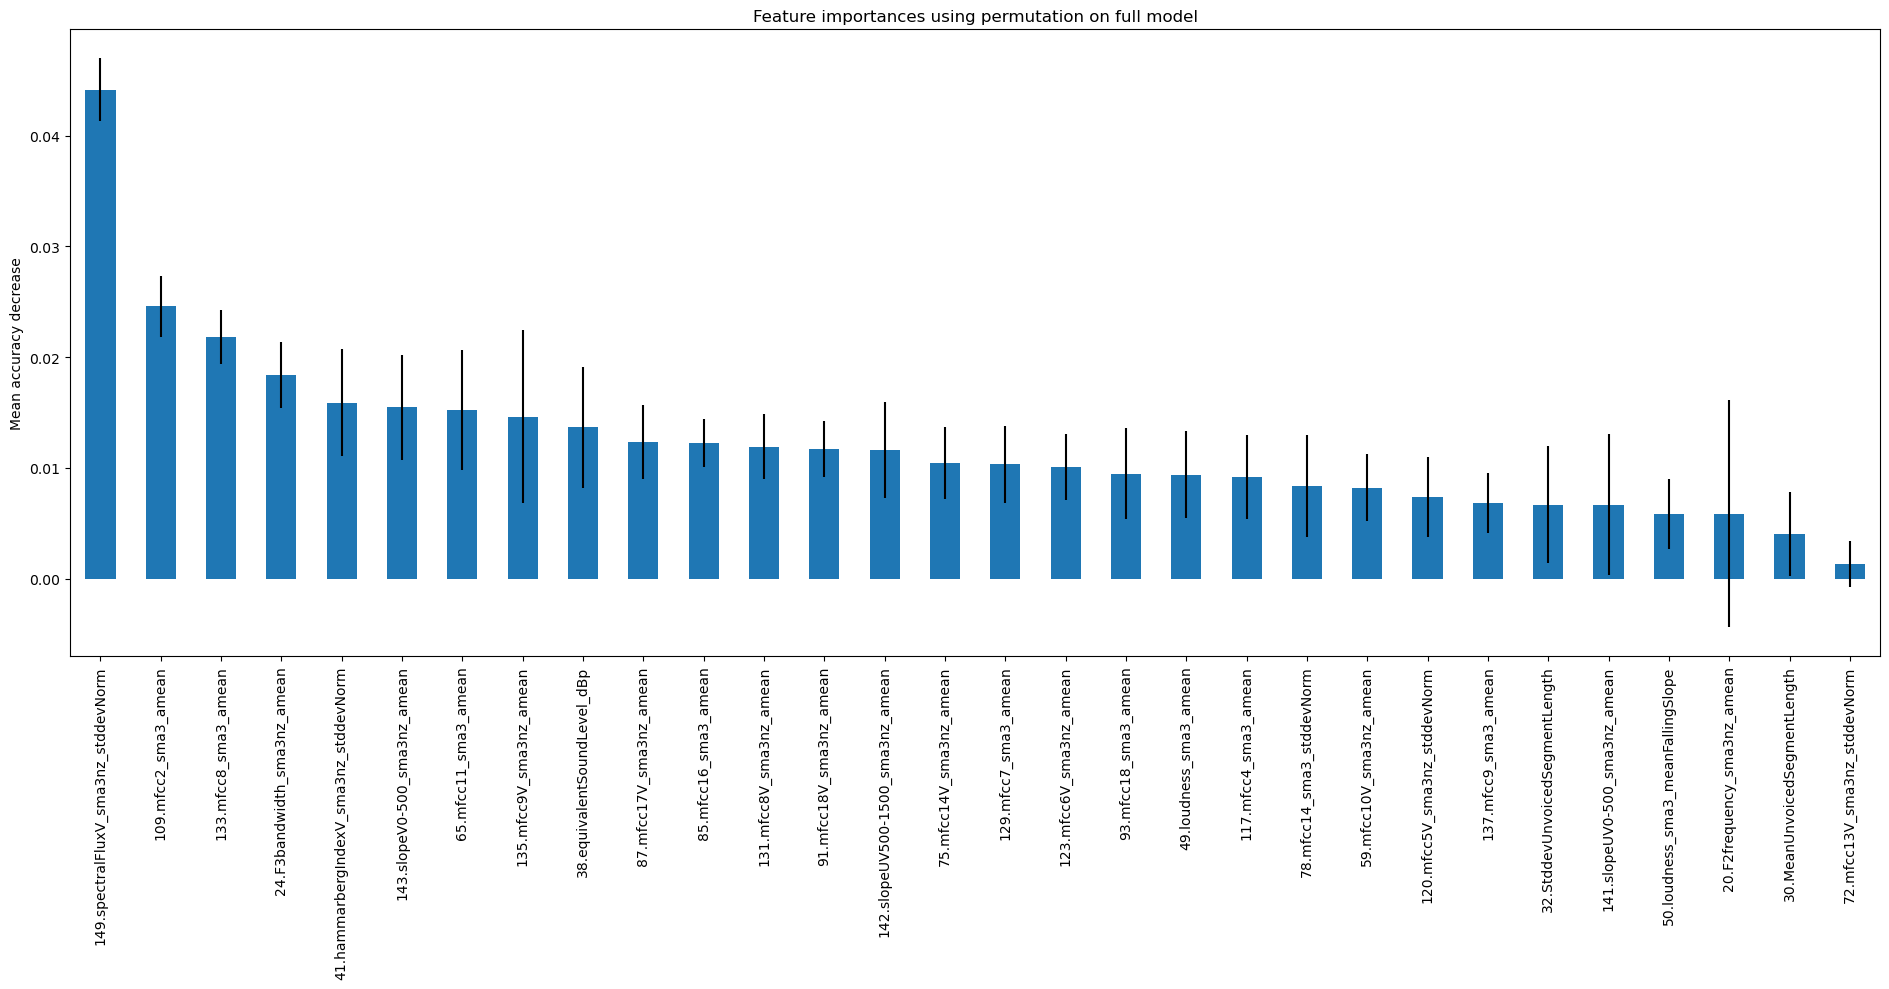

149
109
133
24
41
143
65
135
38
87
85
131
91
142
75
129
123
93
49
117
78
59
120
137
32
141
50
20
30
72
149
109
133
24
41
143
65
135
38
87
85
131
91
142
75
129
123
93
49
117
78
59
120
137
32
141
50
20
30
72
29 30
[149, 109, 133, 24, 41, 143, 65, 135, 38, 87, 85, 131, 91, 142, 75, 129, 123, 93, 49, 117, 78, 59, 120, 137, 32, 141, 50, 20, 30]
[87, 20, 32, 85, 75, 30, 142, 120, 135, 50, 137, 78, 38, 41, 131, 117, 93, 59, 143, 109, 133, 49, 149, 141, 123, 65, 91, 24, 129]
15290
29
<class 'numpy.float32'>
29
29
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78360958 0.74857143]
Recall: [0.90628328 0.52716298]
F1-score: [0.84049383 0.61865407]
confusion_matrix:
[[851  88]
 [235 262]]
accuracy:
0.7750696378830083

forest_importances 87.mfcc17V_sma3nz_amean                  0.007869
20.F2frequency_sma3nz_amean              0.002368
32.StddevUnvoiced

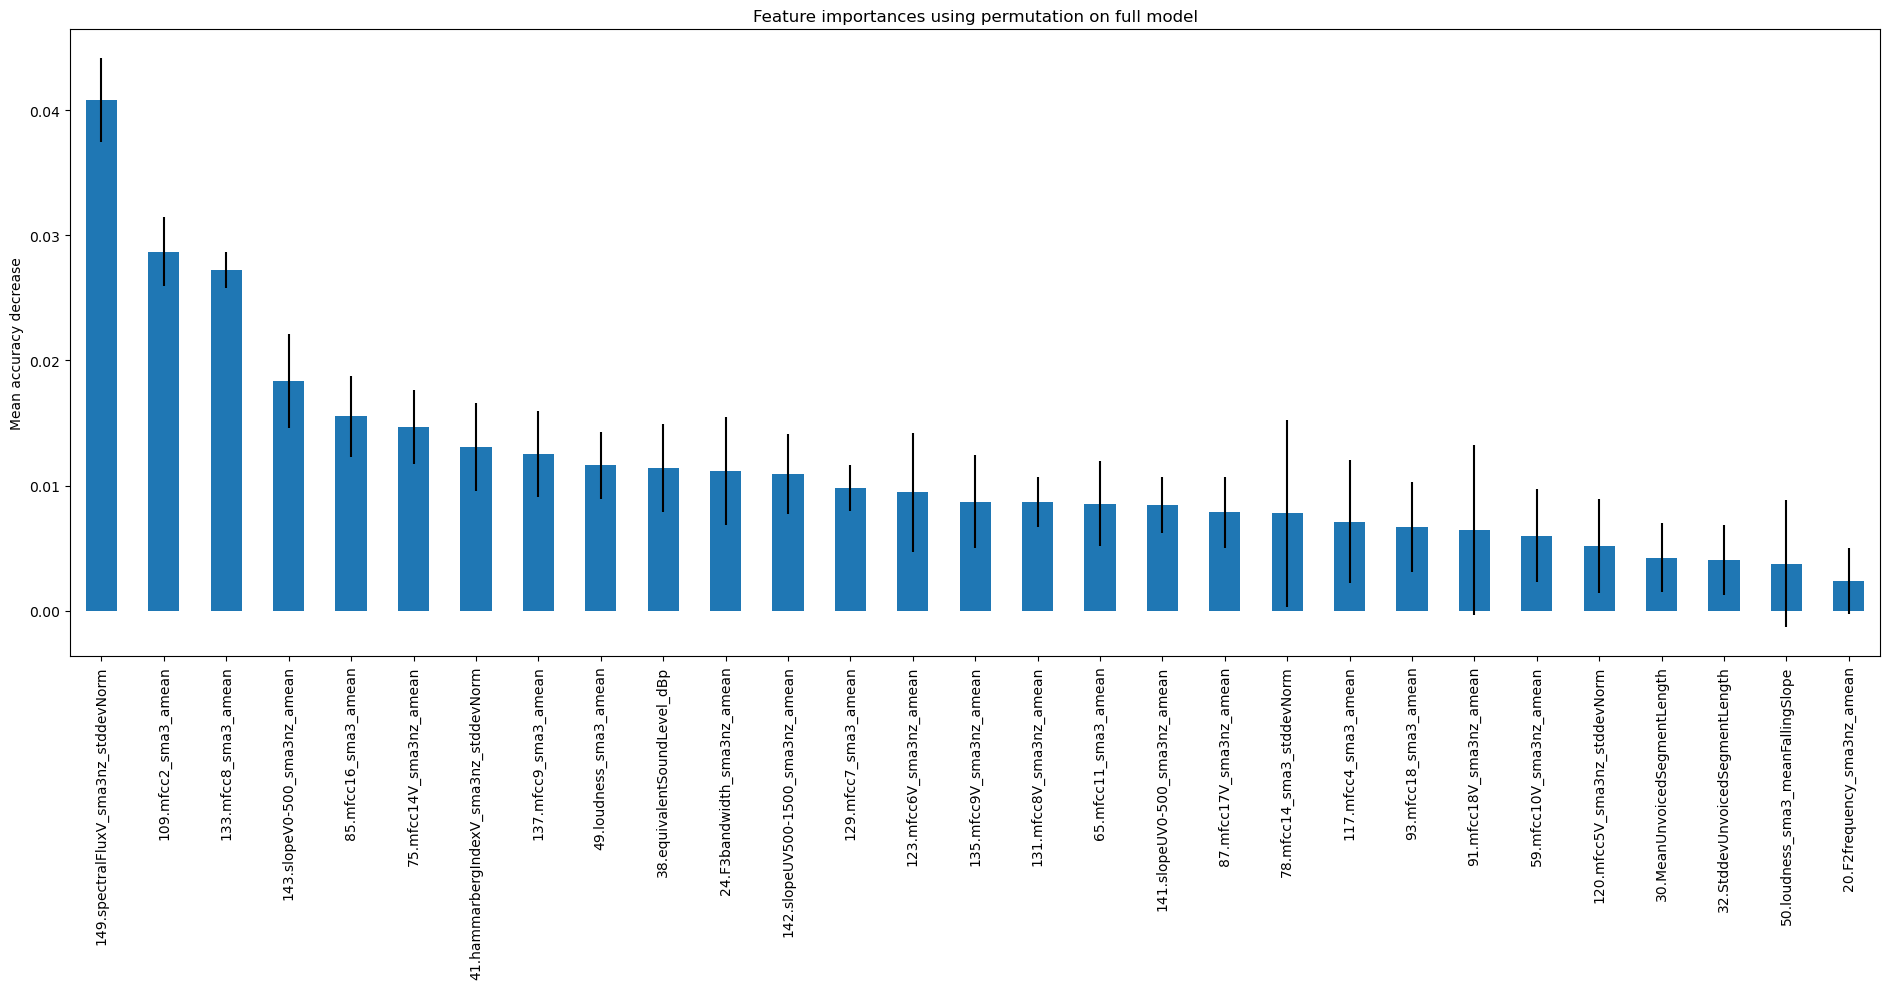

149
109
133
143
85
75
41
137
49
38
24
142
129
123
135
131
65
141
87
78
117
93
91
59
120
30
32
50
20
149
109
133
143
85
75
41
137
49
38
24
142
129
123
135
131
65
141
87
78
117
93
91
59
120
30
32
50
20
28 29
[149, 109, 133, 143, 85, 75, 41, 137, 49, 38, 24, 142, 129, 123, 135, 131, 65, 141, 87, 78, 117, 93, 91, 59, 120, 30, 32, 50]
[120, 78, 135, 30, 142, 38, 123, 32, 24, 91, 133, 117, 75, 141, 131, 49, 41, 137, 93, 65, 87, 59, 143, 149, 129, 50, 85, 109]
15290
28
<class 'numpy.float32'>
28
28
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79093432 0.76338028]
Recall: [0.91054313 0.54527163]
F1-score: [0.84653465 0.63615023]
confusion_matrix:
[[855  84]
 [226 271]]
accuracy:
0.7841225626740947

forest_importances 120.mfcc5V_sma3nz_stddevNorm             0.007242
78.mfcc14_sma3_stddevNorm                0.011908
135.mfcc9V_sma3nz_amean        

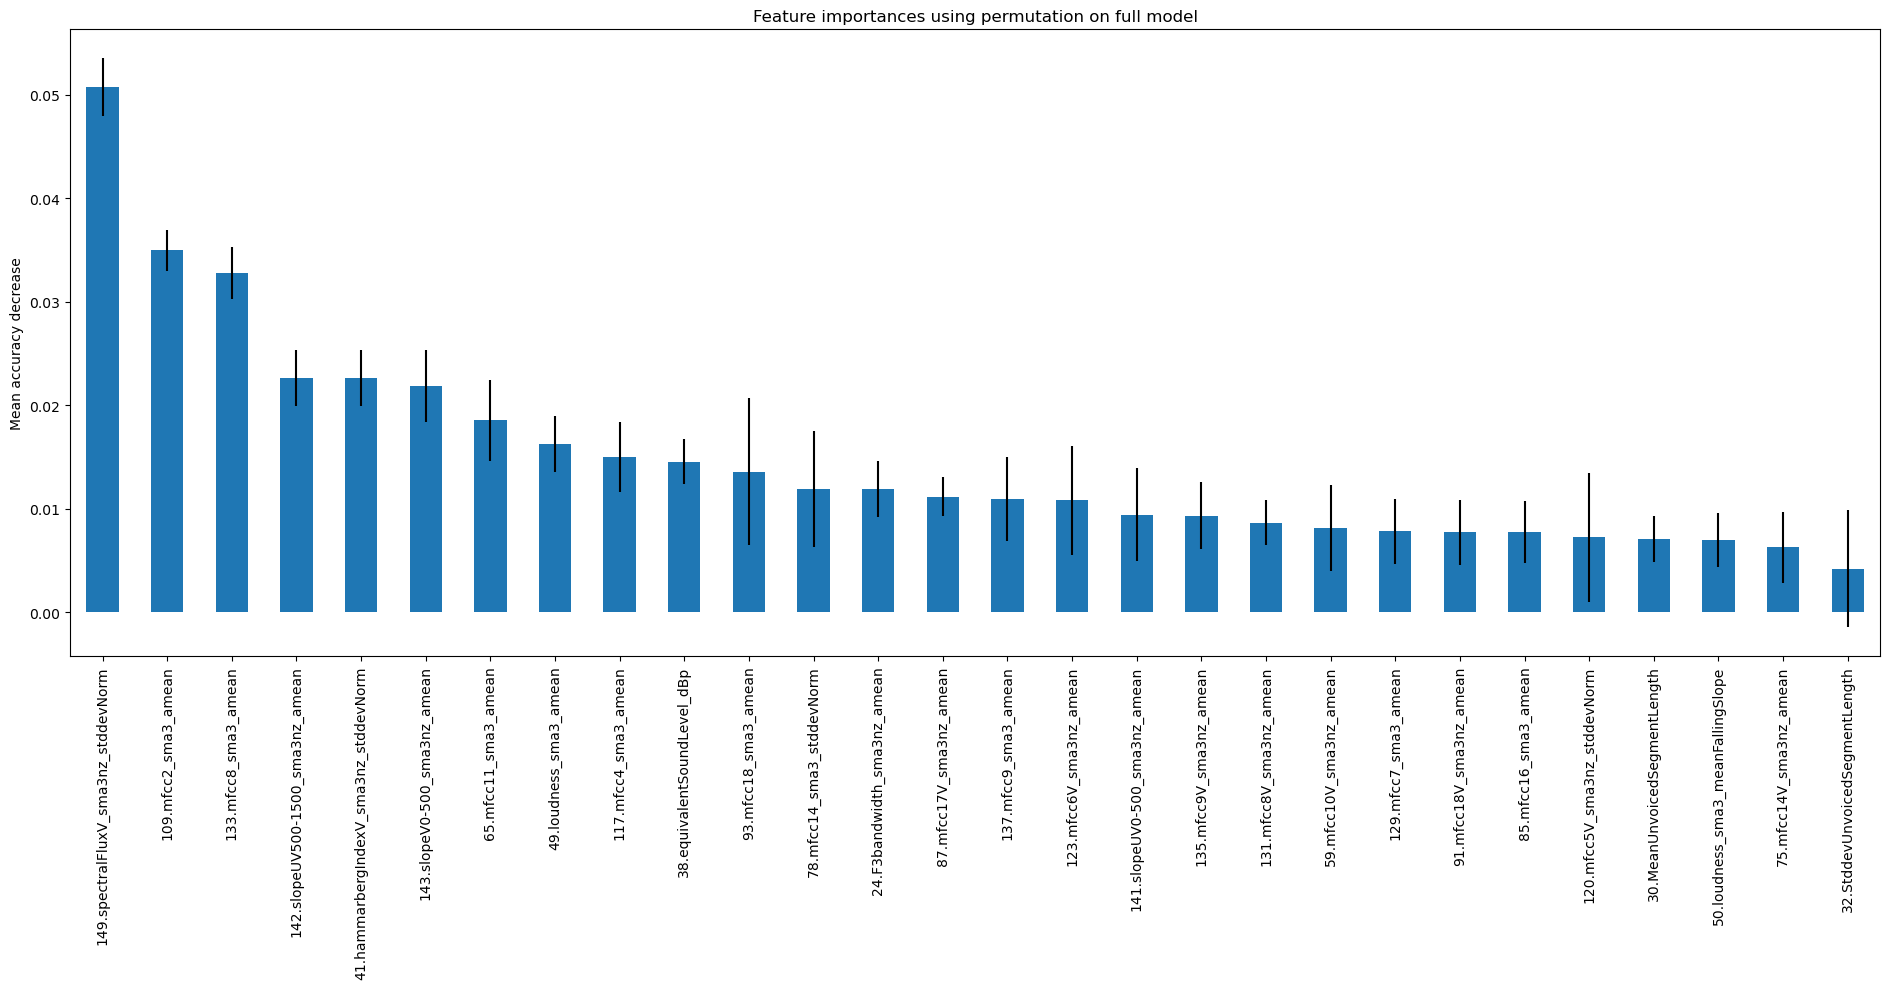

149
109
133
142
41
143
65
49
117
38
93
78
24
87
137
123
141
135
131
59
129
91
85
120
30
50
75
32
149
109
133
142
41
143
65
49
117
38
93
78
24
87
137
123
141
135
131
59
129
91
85
120
30
50
75
32
27 28
[149, 109, 133, 142, 41, 143, 65, 49, 117, 38, 93, 78, 24, 87, 137, 123, 141, 135, 131, 59, 129, 91, 85, 120, 30, 50, 75]
[59, 78, 85, 30, 131, 143, 65, 93, 24, 41, 50, 75, 133, 135, 91, 38, 87, 109, 149, 141, 123, 142, 117, 49, 120, 129, 137]
15290
27
<class 'numpy.float32'>
27
27
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79026217 0.74184783]
Recall: [0.89882854 0.54929577]
F1-score: [0.8410563  0.63121387]
confusion_matrix:
[[844  95]
 [224 273]]
accuracy:
0.7778551532033426

forest_importances 59.mfcc10V_sma3nz_amean                  0.012674
78.mfcc14_sma3_stddevNorm                0.008287
85.mfcc16_sma3_amean                     0.00

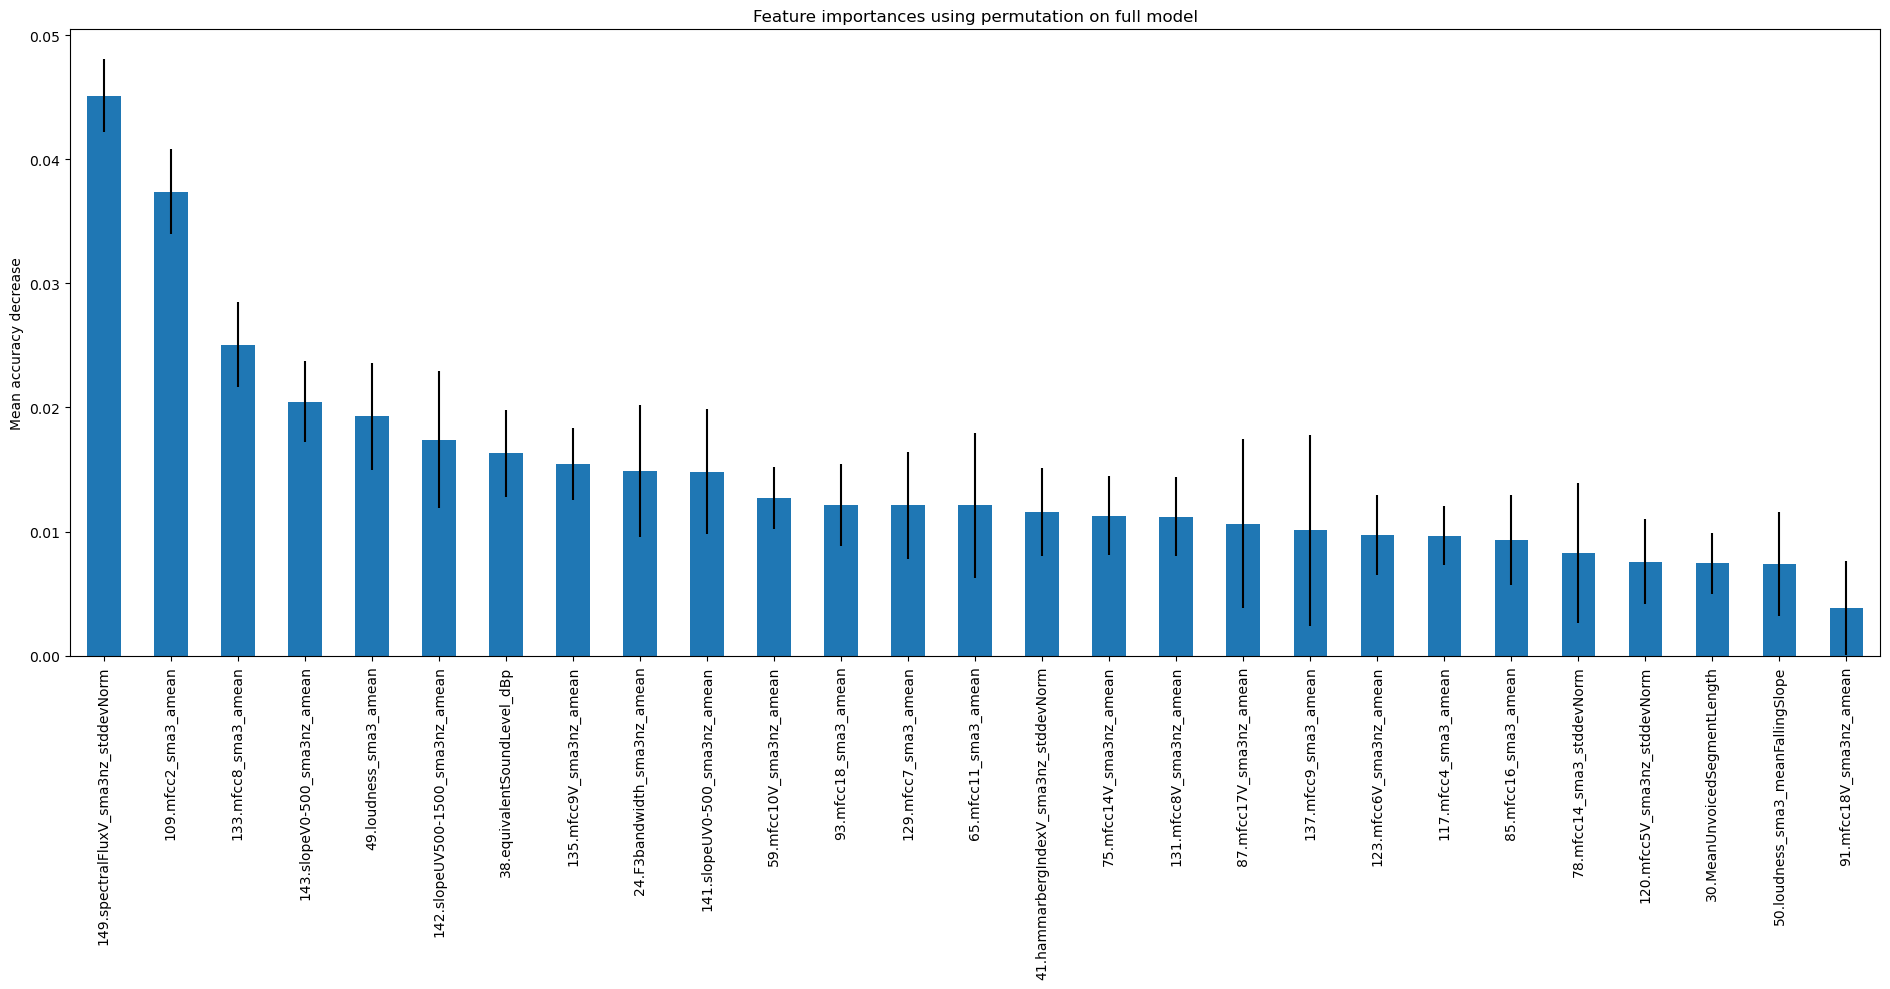

149
109
133
143
49
142
38
135
24
141
59
93
129
65
41
75
131
87
137
123
117
85
78
120
30
50
91
149
109
133
143
49
142
38
135
24
141
59
93
129
65
41
75
131
87
137
123
117
85
78
120
30
50
91
26 27
[149, 109, 133, 143, 49, 142, 38, 135, 24, 141, 59, 93, 129, 65, 41, 75, 131, 87, 137, 123, 117, 85, 78, 120, 30, 50]
[141, 38, 123, 87, 129, 109, 131, 75, 137, 24, 50, 93, 59, 135, 117, 149, 142, 85, 49, 30, 78, 133, 65, 41, 120, 143]
15290
26
<class 'numpy.float32'>
26
26
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78664193 0.74581006]
Recall: [0.90308839 0.53722334]
F1-score: [0.84085275 0.6245614 ]
confusion_matrix:
[[848  91]
 [230 267]]
accuracy:
0.7764623955431755

forest_importances 141.slopeUV0-500_sma3nz_amean            0.007660
38.equivalentSoundLevel_dBp              0.011003
123.mfcc6V_sma3nz_amean                  0.005084
87.mfcc17

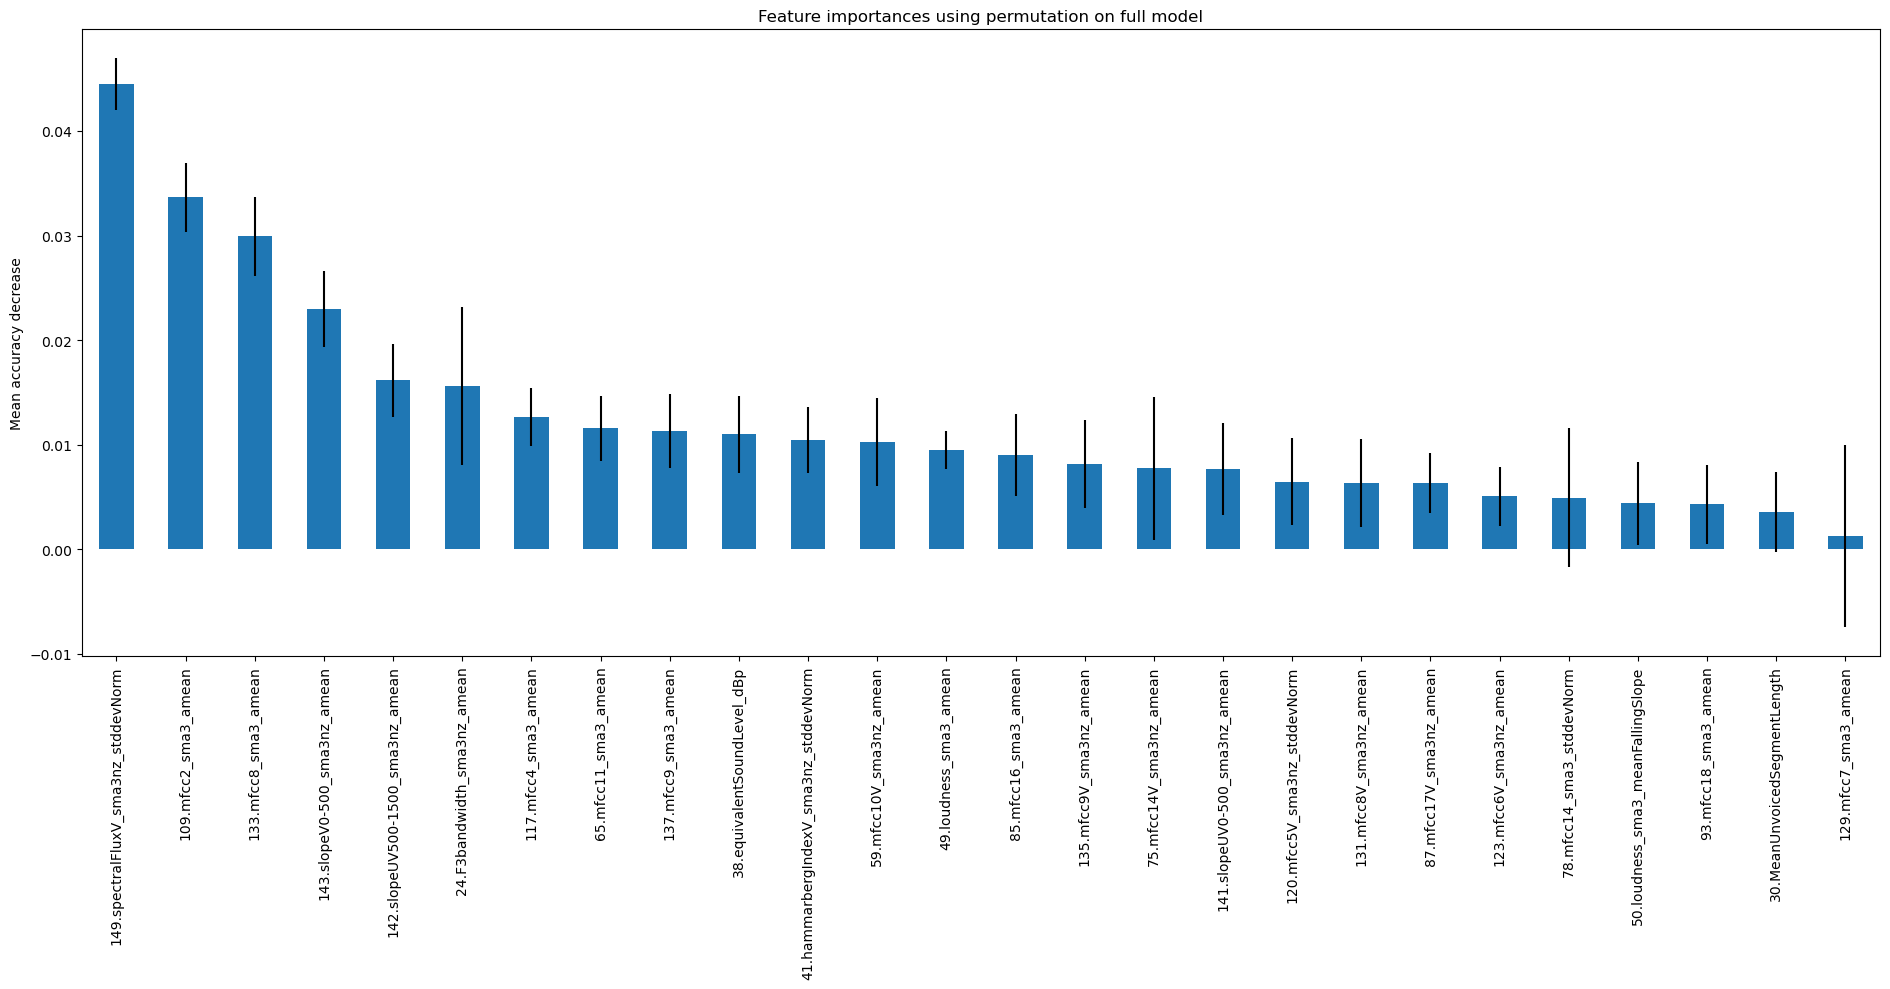

149
109
133
143
142
24
117
65
137
38
41
59
49
85
135
75
141
120
131
87
123
78
50
93
30
129
149
109
133
143
142
24
117
65
137
38
41
59
49
85
135
75
141
120
131
87
123
78
50
93
30
129
25 26
[149, 109, 133, 143, 142, 24, 117, 65, 137, 38, 41, 59, 49, 85, 135, 75, 141, 120, 131, 87, 123, 78, 50, 93, 30]
[133, 137, 143, 93, 24, 41, 142, 87, 120, 50, 75, 30, 149, 131, 78, 117, 59, 85, 123, 65, 135, 38, 109, 141, 49]
15290
25
<class 'numpy.float32'>
25
25
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79906103 0.76280323]
Recall: [0.90628328 0.5694165 ]
F1-score: [0.8493014  0.65207373]
confusion_matrix:
[[851  88]
 [214 283]]
accuracy:
0.7896935933147632

forest_importances 133.mfcc8_sma3_amean                     0.042967
137.mfcc9_sma3_amean                     0.020195
143.slopeV0-500_sma3nz_amean             0.027019
93.mfcc18_sma3_amean     

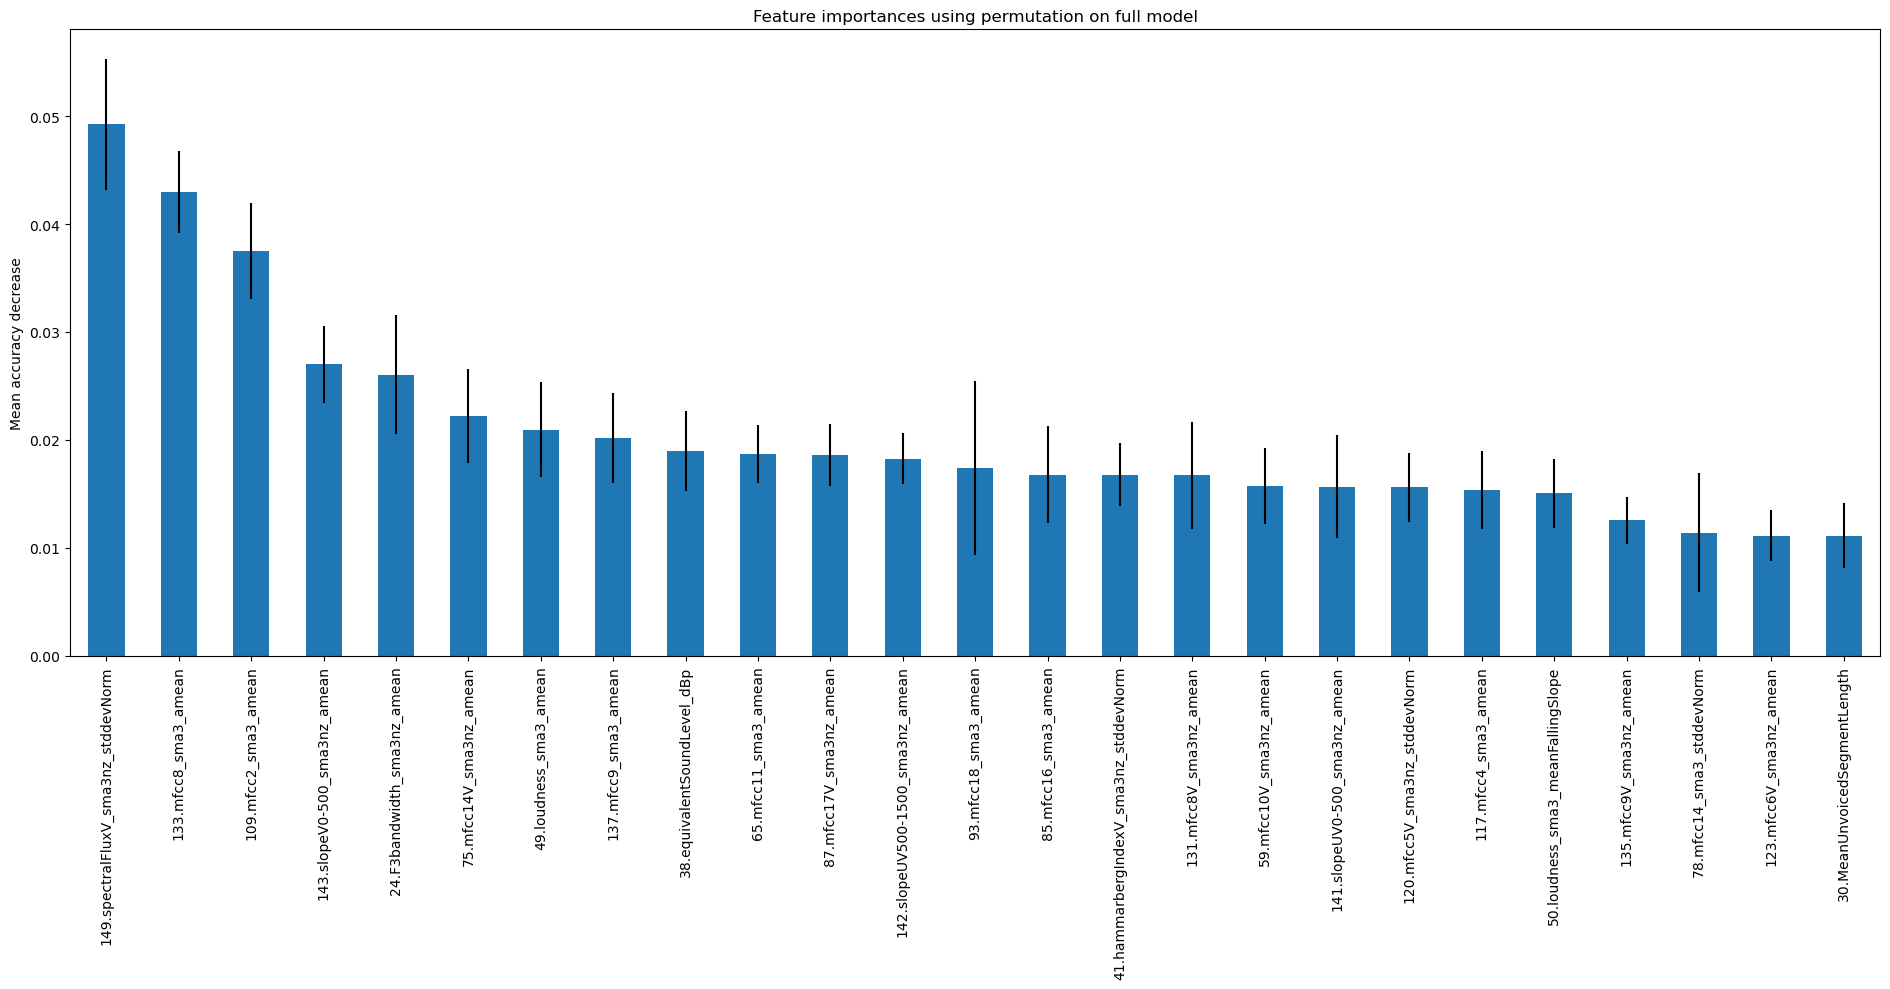

149
133
109
143
24
75
49
137
38
65
87
142
93
85
41
131
59
141
120
117
50
135
78
123
30
149
133
109
143
24
75
49
137
38
65
87
142
93
85
41
131
59
141
120
117
50
135
78
123
30
24 25
[149, 133, 109, 143, 24, 75, 49, 137, 38, 65, 87, 142, 93, 85, 41, 131, 59, 141, 120, 117, 50, 135, 78, 123]
[109, 141, 137, 75, 142, 41, 24, 93, 85, 50, 87, 120, 59, 78, 131, 49, 149, 123, 38, 117, 135, 143, 65, 133]
15290
24
<class 'numpy.float32'>
24
24
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79089219 0.75555556]
Recall: [0.90628328 0.5472837 ]
F1-score: [0.84466501 0.63477246]
confusion_matrix:
[[851  88]
 [225 272]]
accuracy:
0.782033426183844

forest_importances 109.mfcc2_sma3_amean                     0.032799
141.slopeUV0-500_sma3nz_amean            0.015111
137.mfcc9_sma3_amean                     0.017618
75.mfcc14V_sma3nz_amean                  0

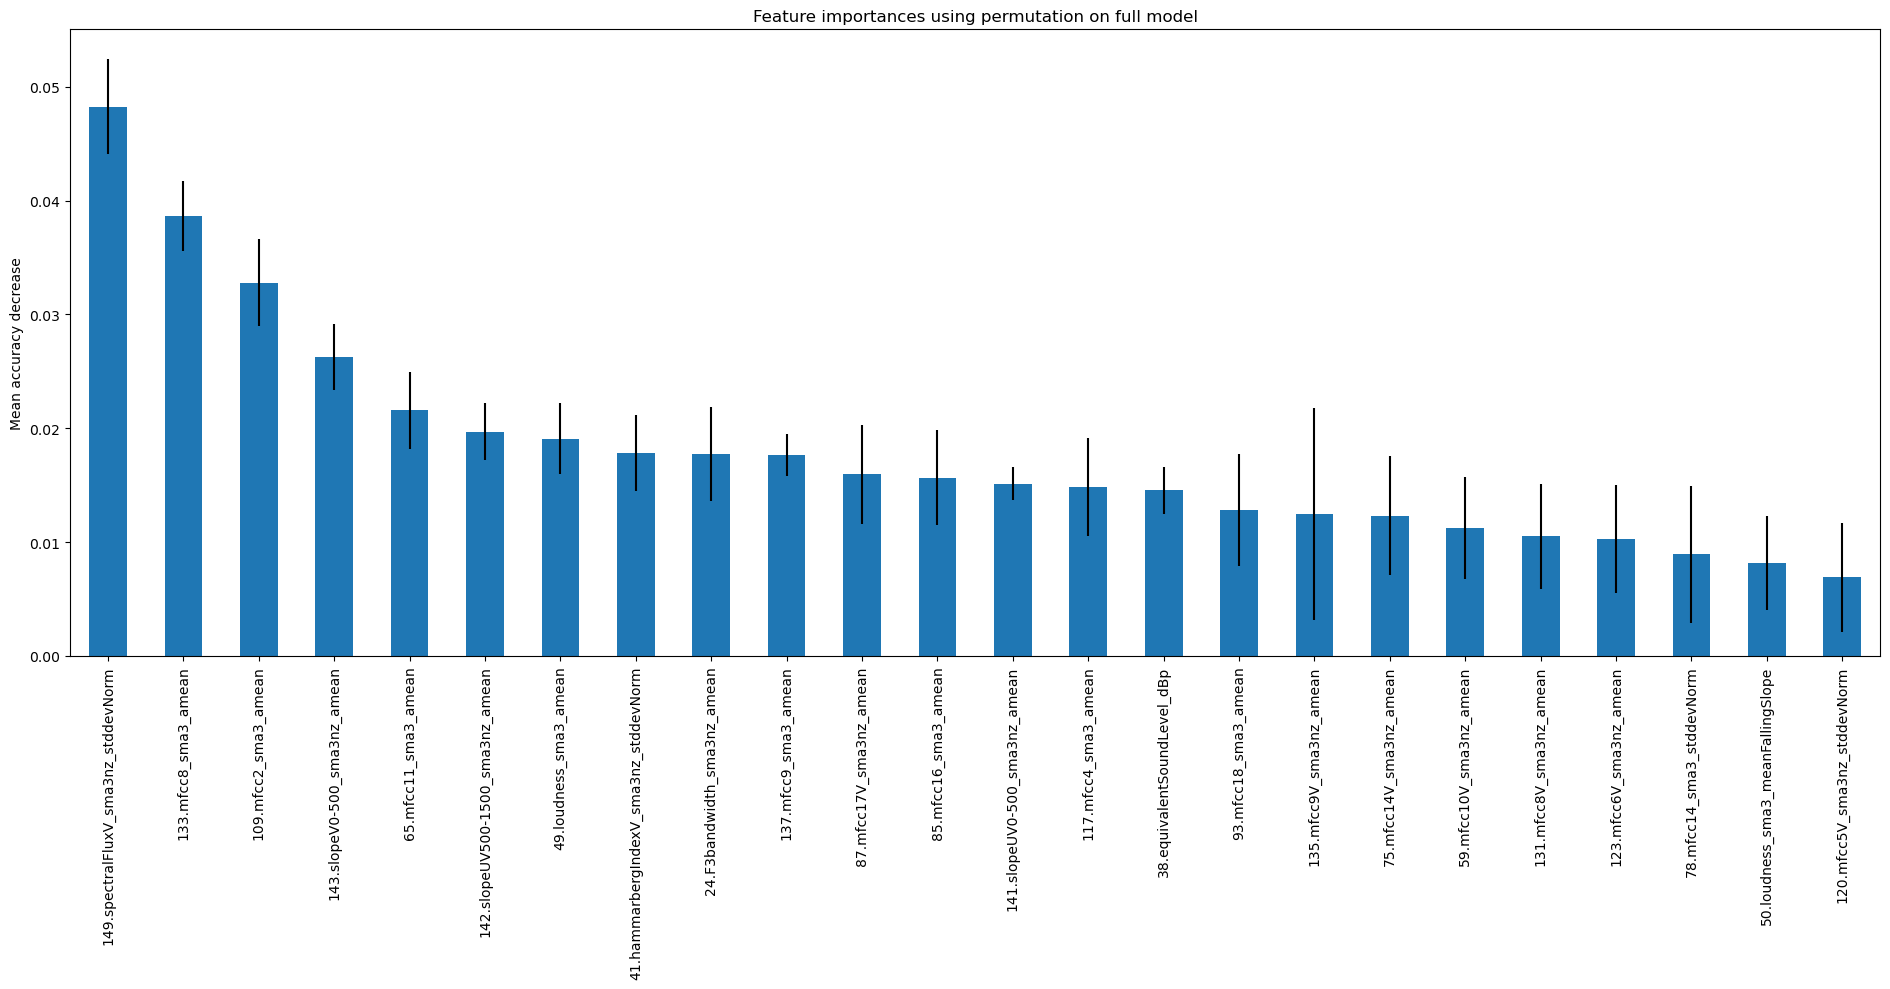

149
133
109
143
65
142
49
41
24
137
87
85
141
117
38
93
135
75
59
131
123
78
50
120
149
133
109
143
65
142
49
41
24
137
87
85
141
117
38
93
135
75
59
131
123
78
50
120
23 24
[149, 133, 109, 143, 65, 142, 49, 41, 24, 137, 87, 85, 141, 117, 38, 93, 135, 75, 59, 131, 123, 78, 50]
[50, 41, 109, 24, 142, 65, 137, 87, 131, 117, 85, 59, 143, 93, 133, 78, 75, 38, 135, 149, 141, 49, 123]
15290
23
<class 'numpy.float32'>
23
23
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79232928 0.7493188 ]
Recall: [0.90202343 0.55331992]
F1-score: [0.8436255  0.63657407]
confusion_matrix:
[[847  92]
 [222 275]]
accuracy:
0.7813370473537604

forest_importances 50.loudness_sma3_meanFallingSlope        0.011351
41.hammarbergIndexV_sma3nz_stddevNorm    0.022006
109.mfcc2_sma3_amean                     0.034471
24.F3bandwidth_sma3nz_amean              0.016992
142.slo

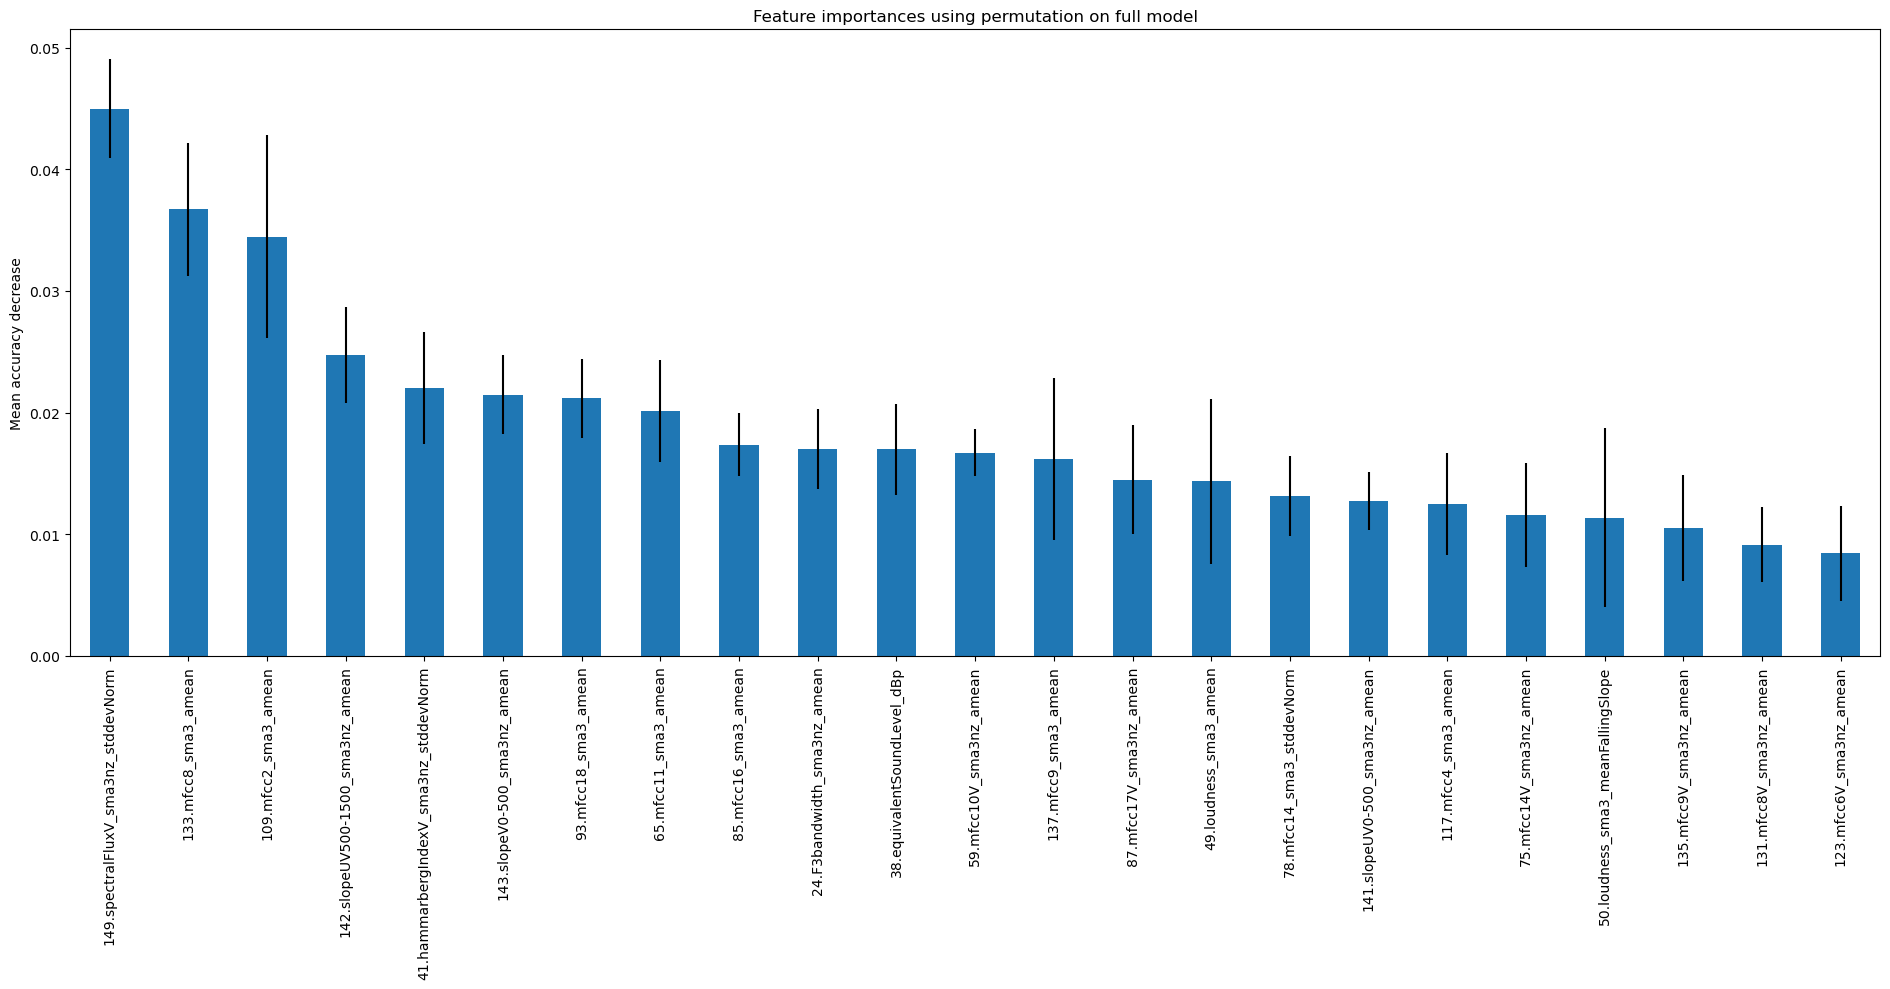

149
133
109
142
41
143
93
65
85
24
38
59
137
87
49
78
141
117
75
50
135
131
123
149
133
109
142
41
143
93
65
85
24
38
59
137
87
49
78
141
117
75
50
135
131
123
22 23
[149, 133, 109, 142, 41, 143, 93, 65, 85, 24, 38, 59, 137, 87, 49, 78, 141, 117, 75, 50, 135, 131]
[49, 38, 143, 141, 133, 131, 117, 87, 75, 85, 109, 142, 65, 50, 59, 41, 149, 137, 93, 24, 78, 135]
15290
22
<class 'numpy.float32'>
22
22
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.80152672 0.74484536]
Recall: [0.89456869 0.58148893]
F1-score: [0.84549572 0.65310734]
confusion_matrix:
[[840  99]
 [208 289]]
accuracy:
0.7862116991643454

forest_importances 49.loudness_sma3_amean                   0.019081
38.equivalentSoundLevel_dBp              0.017270
143.slopeV0-500_sma3nz_amean             0.035515
141.slopeUV0-500_sma3nz_amean            0.018593
133.mfcc8_sma3_amean     

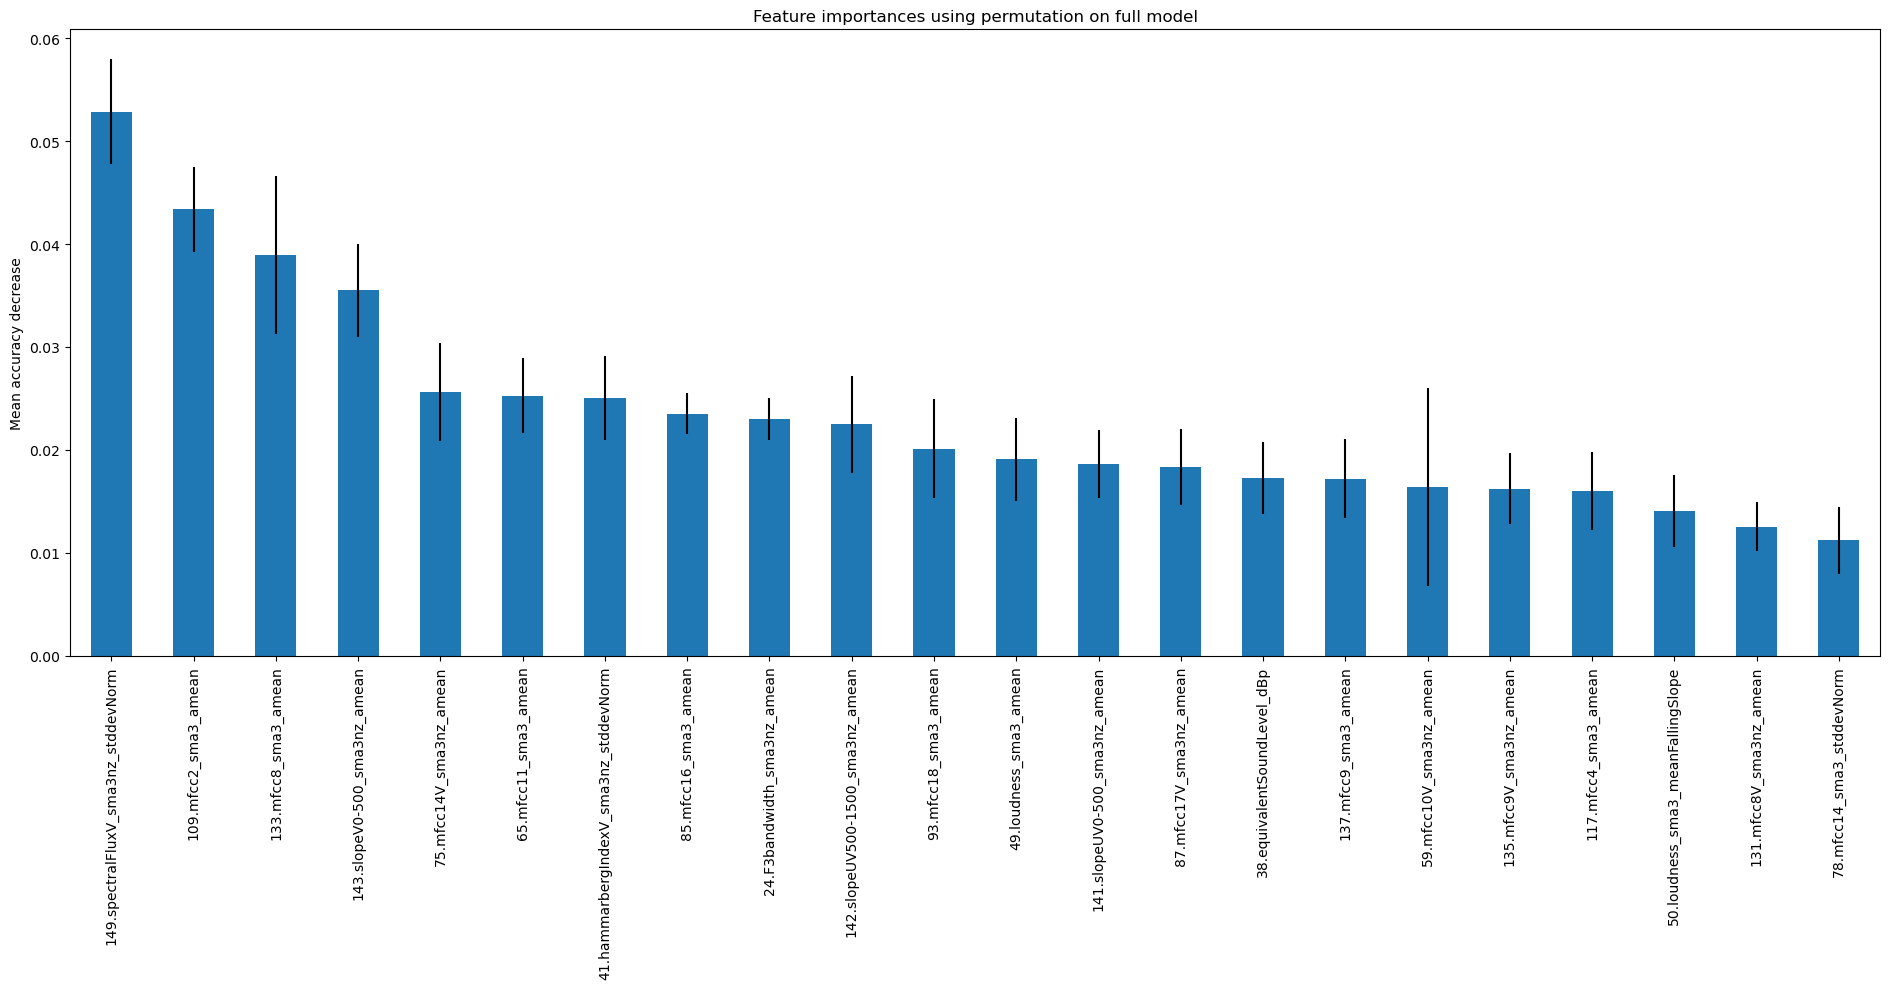

149
109
133
143
75
65
41
85
24
142
93
49
141
87
38
137
59
135
117
50
131
78
149
109
133
143
75
65
41
85
24
142
93
49
141
87
38
137
59
135
117
50
131
78
21 22
[149, 109, 133, 143, 75, 65, 41, 85, 24, 142, 93, 49, 141, 87, 38, 137, 59, 135, 117, 50, 131]
[142, 24, 143, 135, 59, 85, 38, 41, 117, 137, 87, 50, 131, 109, 133, 65, 75, 141, 49, 149, 93]
15290
21
<class 'numpy.float32'>
21
21
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79492004 0.74798928]
Recall: [0.8998935  0.56136821]
F1-score: [0.84415584 0.64137931]
confusion_matrix:
[[845  94]
 [218 279]]
accuracy:
0.7827298050139275

forest_importances 142.slopeUV500-1500_sma3nz_amean         0.018663
24.F3bandwidth_sma3nz_amean              0.026114
143.slopeV0-500_sma3nz_amean             0.037813
135.mfcc9V_sma3nz_amean                  0.014833
59.mfcc10V_sma3nz_amean                  

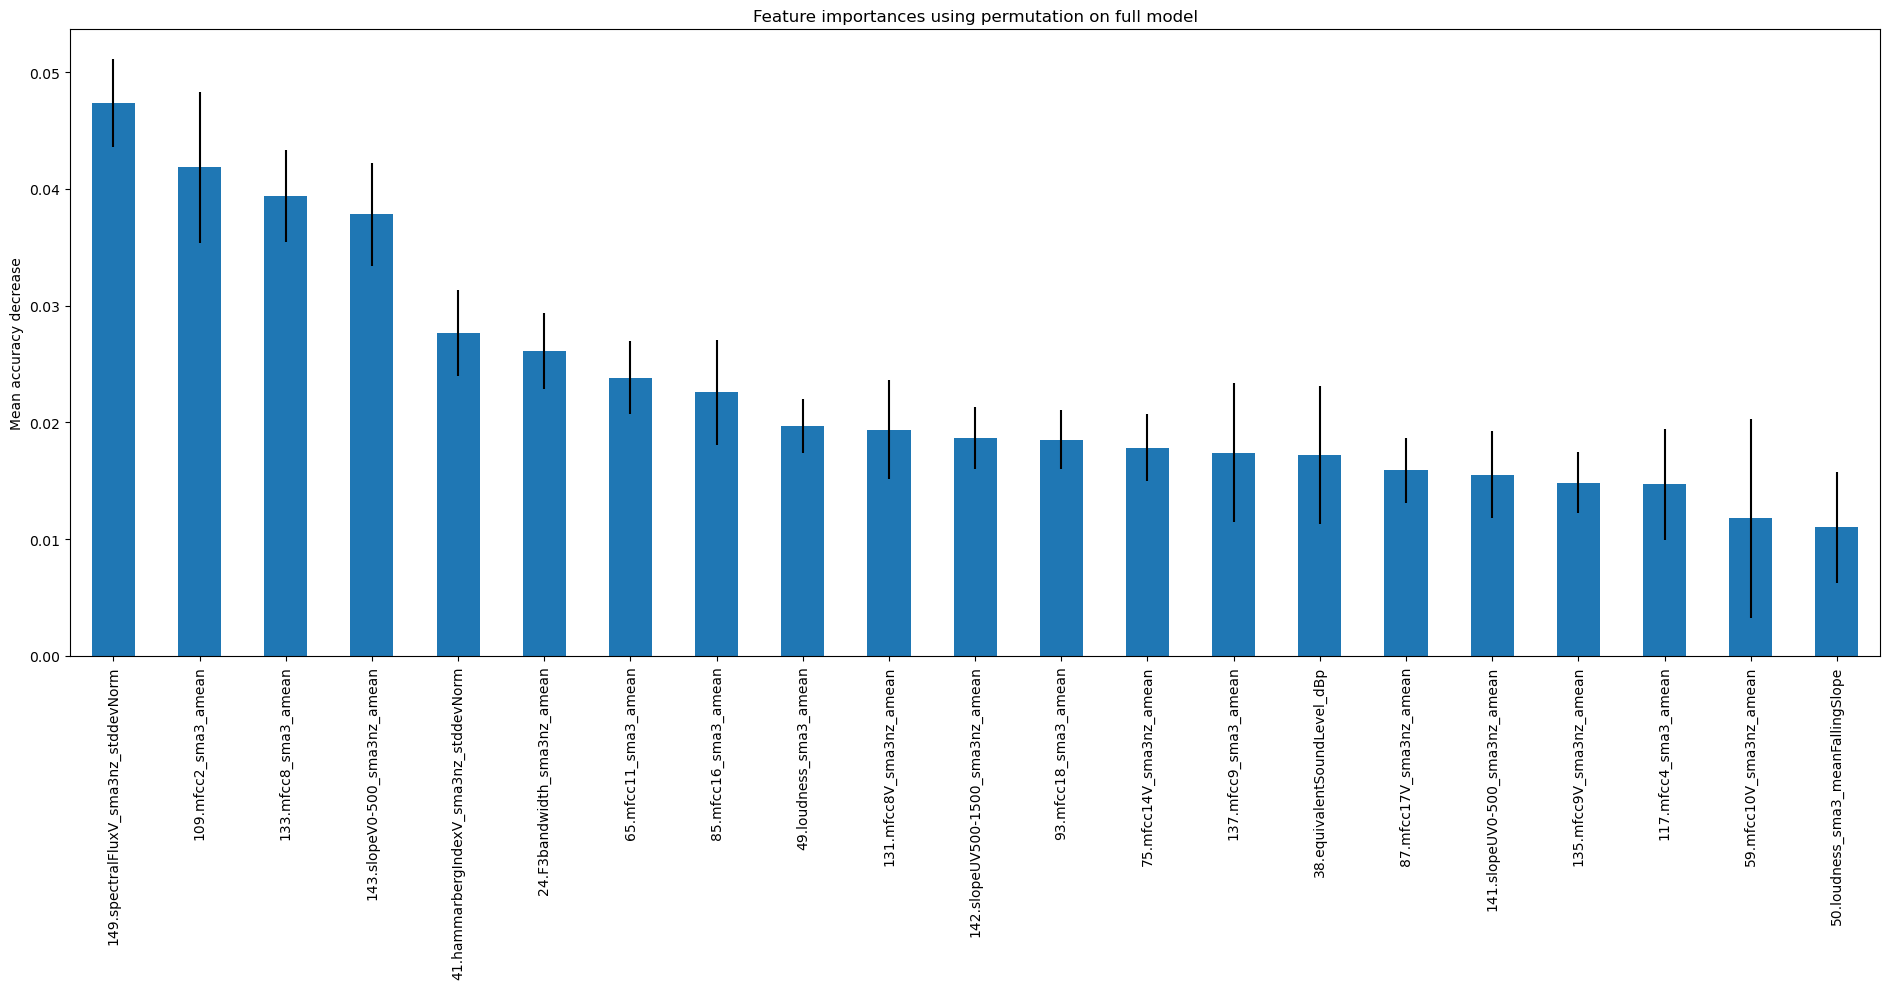

149
109
133
143
41
24
65
85
49
131
142
93
75
137
38
87
141
135
117
59
50
149
109
133
143
41
24
65
85
49
131
142
93
75
137
38
87
141
135
117
59
50
20 21
[149, 109, 133, 143, 41, 24, 65, 85, 49, 131, 142, 93, 75, 137, 38, 87, 141, 135, 117, 59]
[87, 149, 142, 131, 59, 24, 135, 137, 41, 141, 117, 65, 93, 143, 133, 85, 49, 75, 109, 38]
15290
20
<class 'numpy.float32'>
20
20
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78203929 0.71934605]
Recall: [0.89030884 0.53118712]
F1-score: [0.83266932 0.61111111]
confusion_matrix:
[[836 103]
 [233 264]]
accuracy:
0.766016713091922

forest_importances 87.mfcc17V_sma3nz_amean                  0.005571
149.spectralFluxV_sma3nz_stddevNorm      0.045613
142.slopeUV500-1500_sma3nz_amean         0.018175
131.mfcc8V_sma3nz_amean                  0.002507
59.mfcc10V_sma3nz_amean                  0.006755
24.F3b

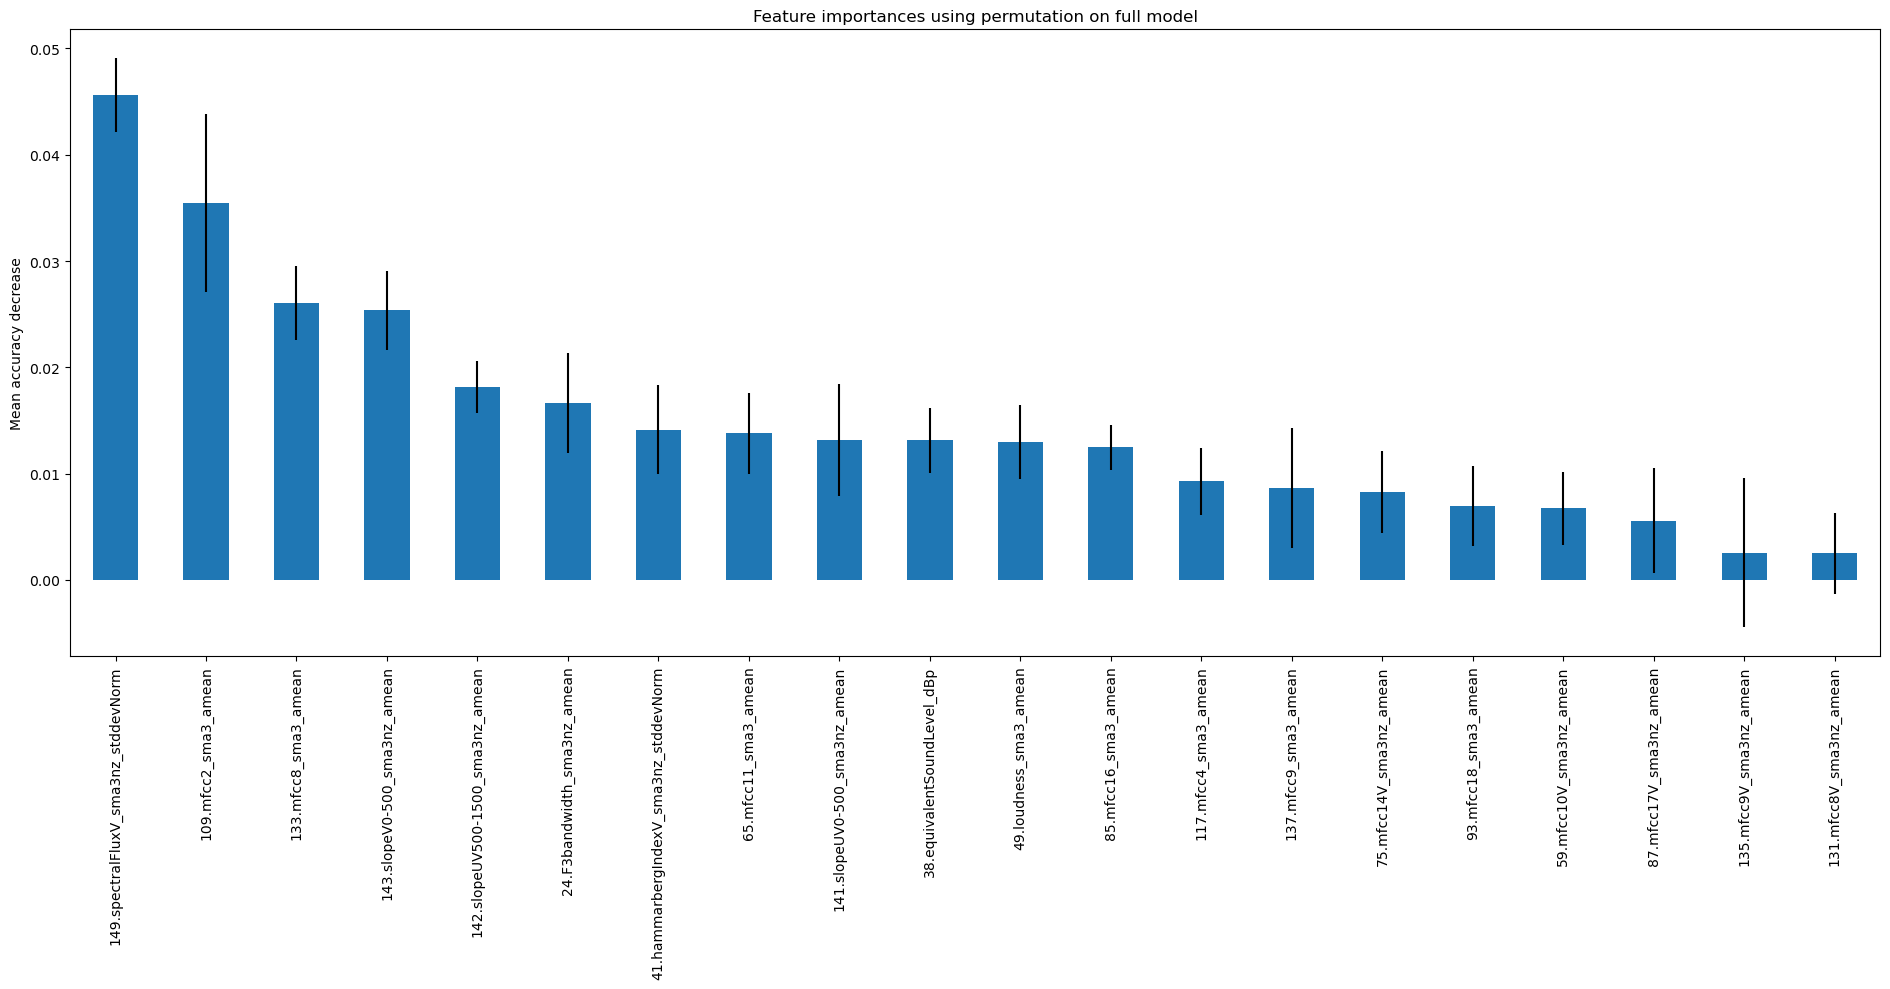

149
109
133
143
142
24
41
65
141
38
49
85
117
137
75
93
59
87
135
131
149
109
133
143
142
24
41
65
141
38
49
85
117
137
75
93
59
87
135
131
19 20
[149, 109, 133, 143, 142, 24, 41, 65, 141, 38, 49, 85, 117, 137, 75, 93, 59, 87, 135]
[142, 49, 24, 133, 137, 135, 143, 65, 38, 85, 87, 117, 141, 149, 93, 75, 41, 59, 109]
15290
19
<class 'numpy.float32'>
19
19
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79470199 0.73878628]
Recall: [0.89456869 0.56338028]
F1-score: [0.84168337 0.63926941]
confusion_matrix:
[[840  99]
 [217 280]]
accuracy:
0.7799442896935933

forest_importances 142.slopeUV500-1500_sma3nz_amean         0.025209
49.loudness_sma3_amean                   0.021797
24.F3bandwidth_sma3nz_amean              0.019847
133.mfcc8_sma3_amean                     0.035446
137.mfcc9_sma3_amean                     0.018036
135.mfcc9V_sma3nz_ame

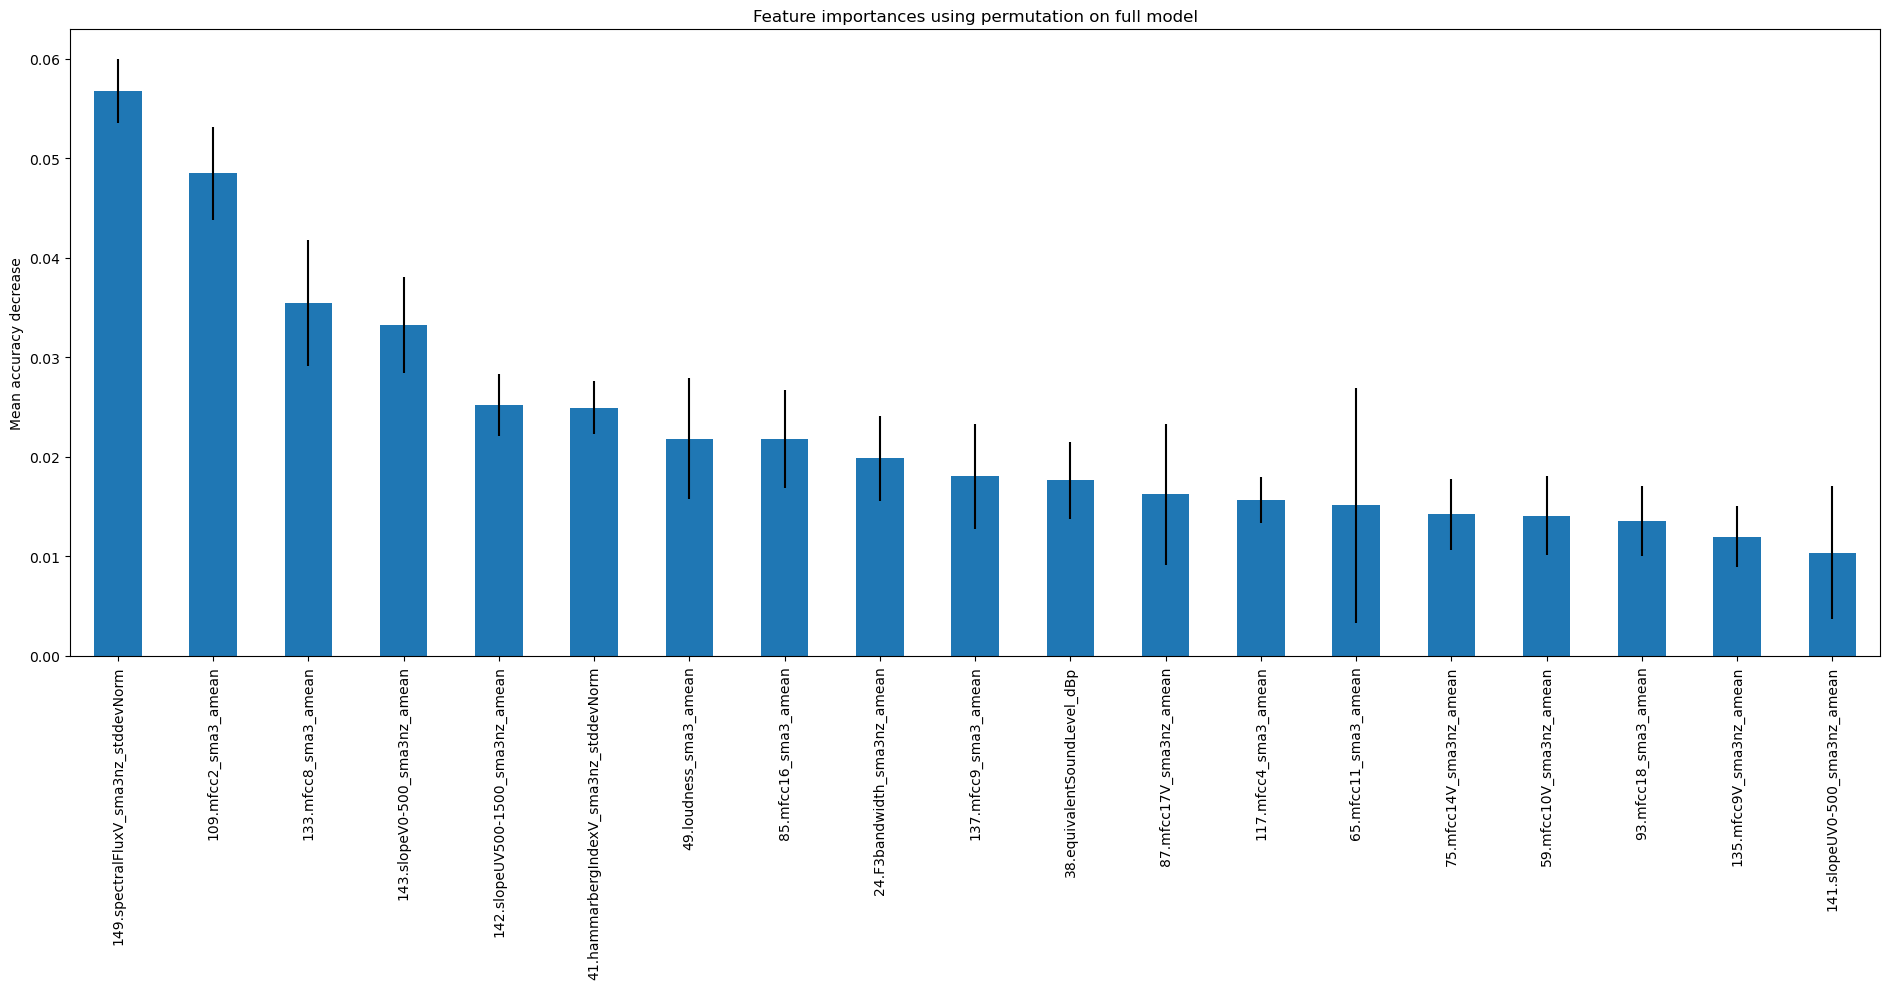

149
109
133
143
142
41
49
85
24
137
38
87
117
65
75
59
93
135
141
149
109
133
143
142
41
49
85
24
137
38
87
117
65
75
59
93
135
141
18 19
[149, 109, 133, 143, 142, 41, 49, 85, 24, 137, 38, 87, 117, 65, 75, 59, 93, 135]
[143, 24, 117, 93, 38, 85, 75, 41, 142, 49, 87, 65, 59, 149, 135, 133, 109, 137]
15290
18
<class 'numpy.float32'>
18
18
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78659112 0.71883289]
Recall: [0.88711395 0.54527163]
F1-score: [0.83383383 0.6201373 ]
confusion_matrix:
[[833 106]
 [226 271]]
accuracy:
0.7688022284122563

forest_importances 143.slopeV0-500_sma3nz_amean             0.044290
24.F3bandwidth_sma3nz_amean              0.025766
117.mfcc4_sma3_amean                     0.017618
93.mfcc18_sma3_amean                     0.014415
38.equivalentSoundLevel_dBp              0.019777
85.mfcc16_sma3_amean                   

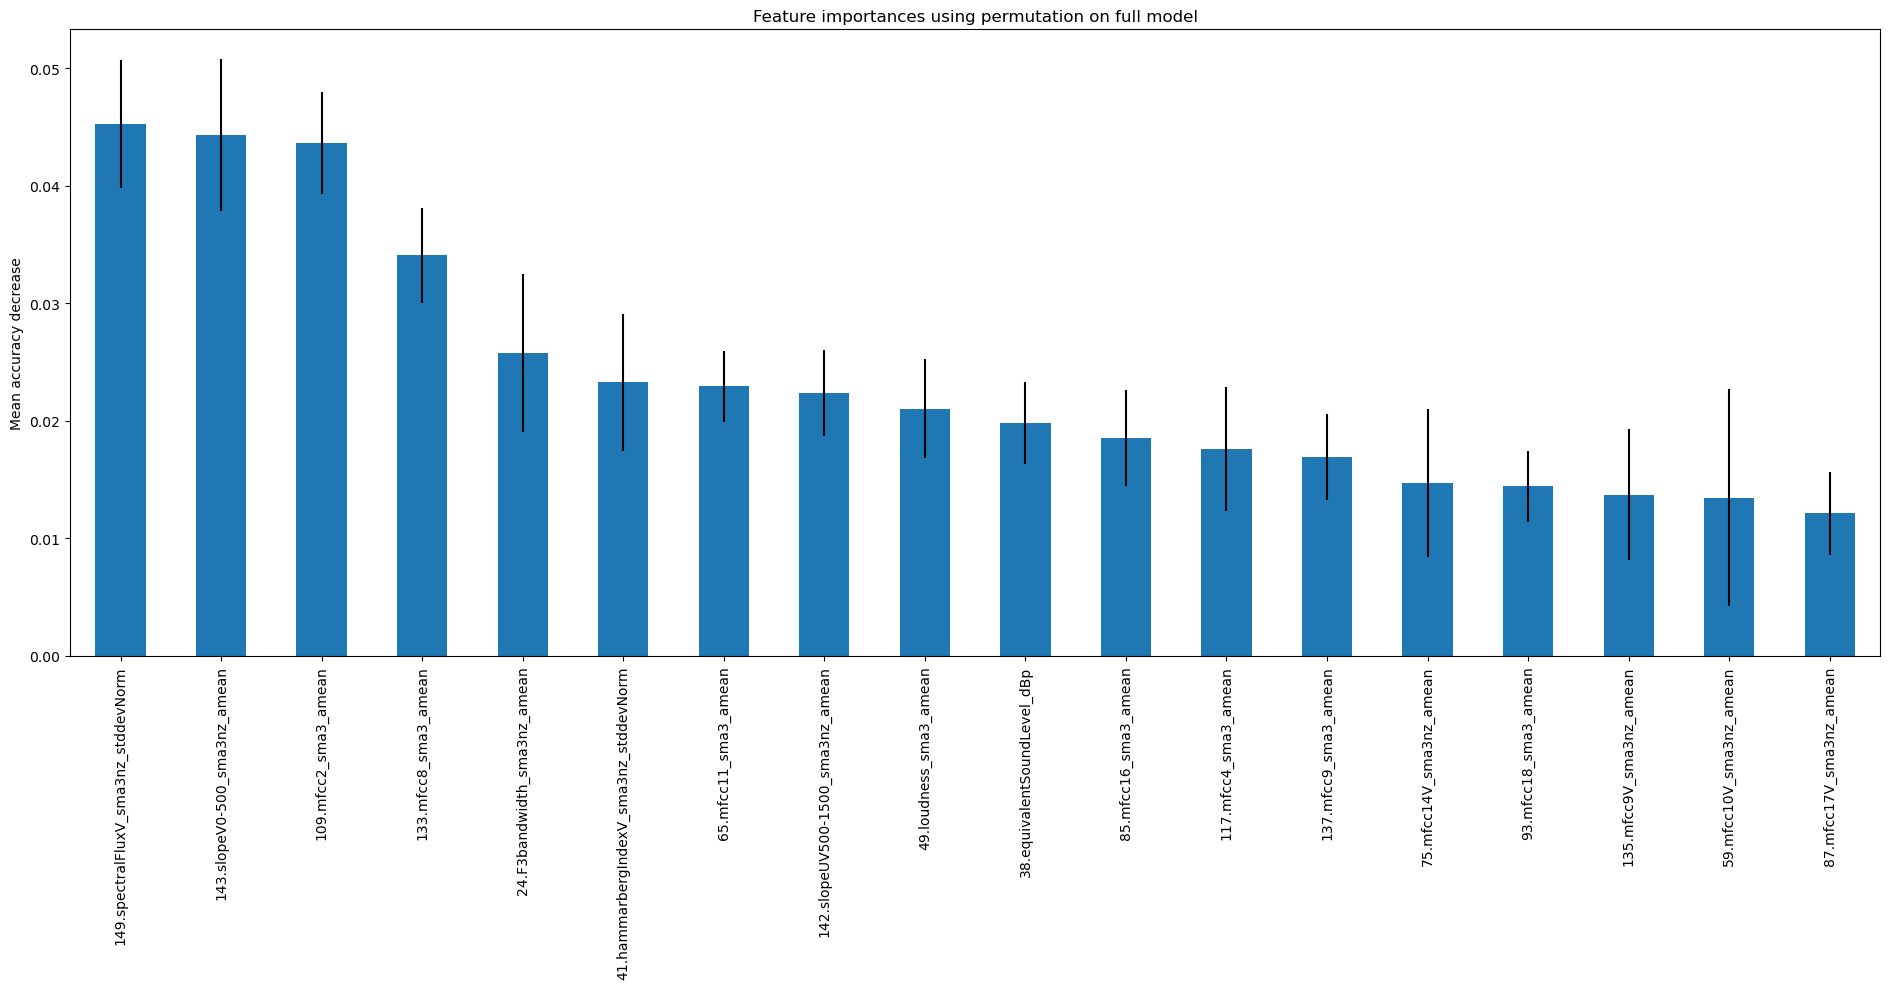

149
143
109
133
24
41
65
142
49
38
85
117
137
75
93
135
59
87
149
143
109
133
24
41
65
142
49
38
85
117
137
75
93
135
59
87
17 18
[149, 143, 109, 133, 24, 41, 65, 142, 49, 38, 85, 117, 137, 75, 93, 135, 59]
[135, 117, 109, 137, 38, 93, 75, 85, 59, 41, 143, 142, 65, 149, 49, 133, 24]
15290
17
<class 'numpy.float32'>
17
17
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78652751 0.71204188]
Recall: [0.8828541 0.5472837]
F1-score: [0.83191169 0.6188851 ]
confusion_matrix:
[[829 110]
 [225 272]]
accuracy:
0.7667130919220055

forest_importances 135.mfcc9V_sma3nz_amean                  0.014345
117.mfcc4_sma3_amean                     0.017340
109.mfcc2_sma3_amean                     0.044568
137.mfcc9_sma3_amean                     0.015320
38.equivalentSoundLevel_dBp              0.016226
93.mfcc18_sma3_amean                     0.014276
75.mfcc

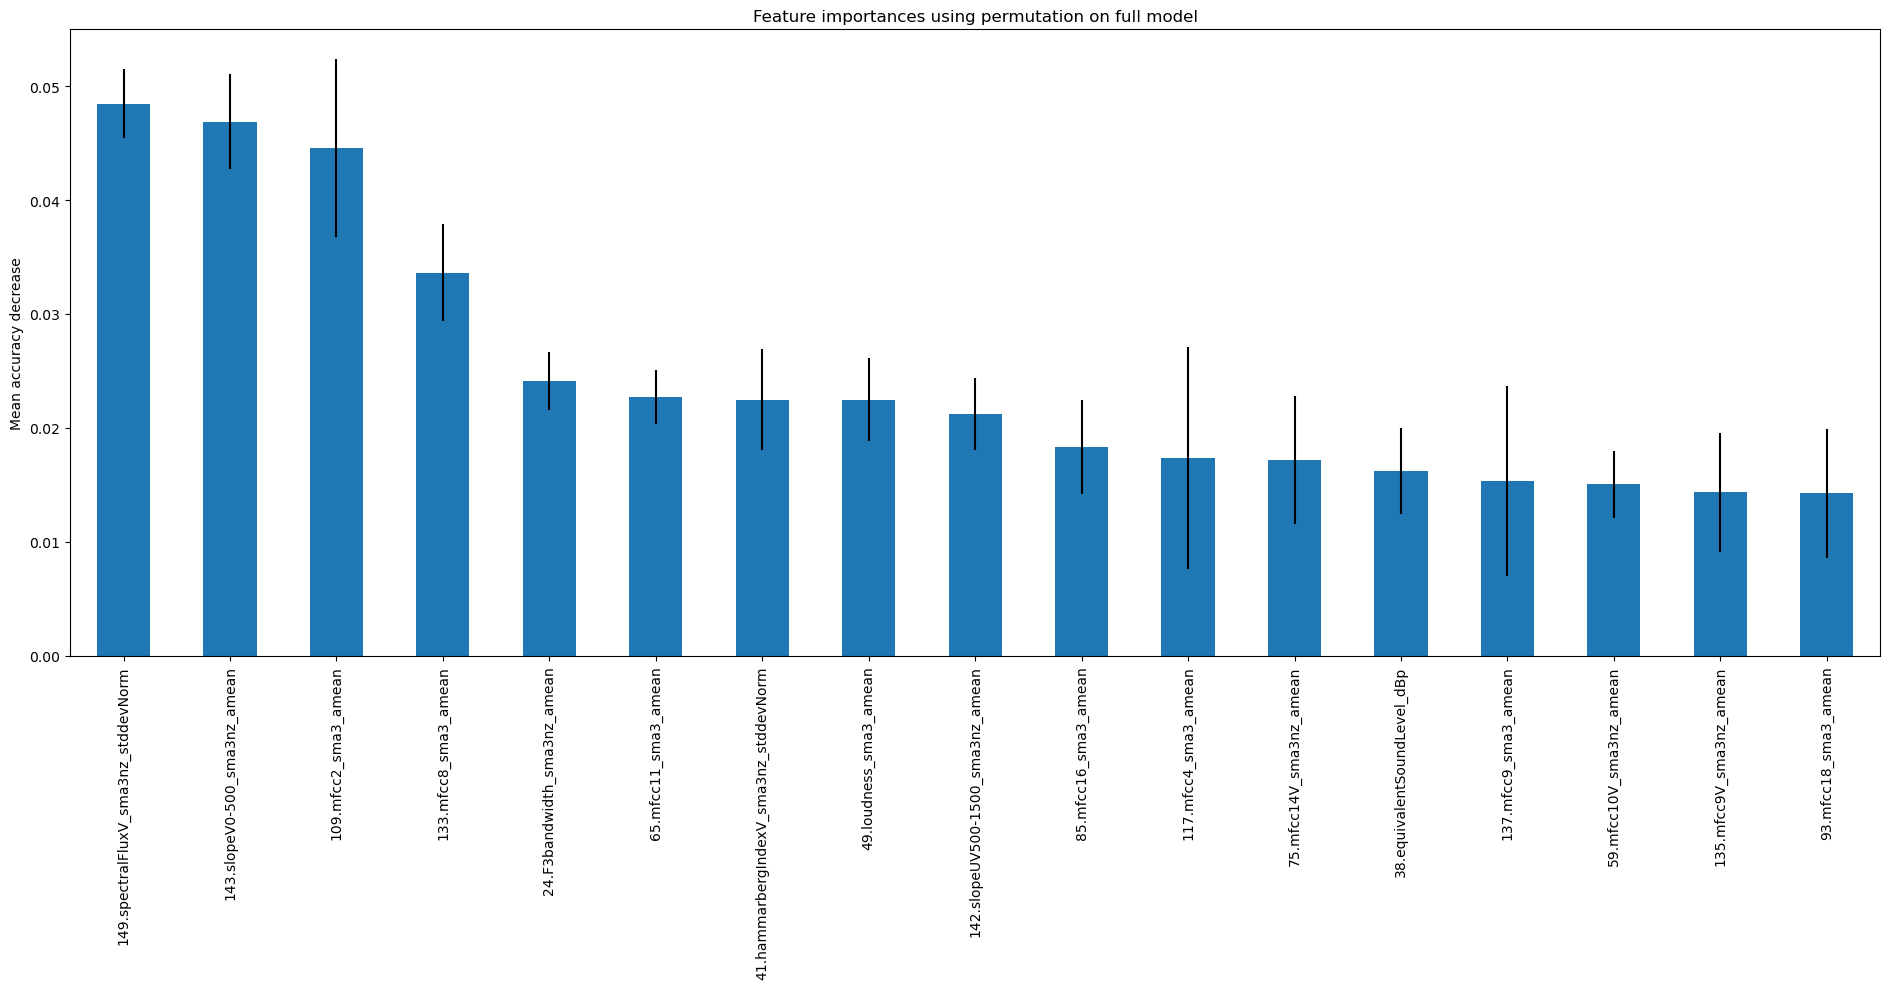

149
143
109
133
24
65
41
49
142
85
117
75
38
137
59
135
93
149
143
109
133
24
65
41
49
142
85
117
75
38
137
59
135
93
16 17
[149, 143, 109, 133, 24, 65, 41, 49, 142, 85, 117, 75, 38, 137, 59, 135]
[149, 38, 143, 137, 24, 59, 135, 75, 109, 49, 142, 65, 133, 41, 117, 85]
15290
16
<class 'numpy.float32'>
16
16
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78240303 0.70448549]
Recall: [0.88072417 0.53722334]
F1-score: [0.82865731 0.60958904]
confusion_matrix:
[[827 112]
 [230 267]]
accuracy:
0.7618384401114207

forest_importances 149.spectralFluxV_sma3nz_stddevNorm      0.053134
38.equivalentSoundLevel_dBp              0.015111
143.slopeV0-500_sma3nz_amean             0.040390
137.mfcc9_sma3_amean                     0.013370
24.F3bandwidth_sma3nz_amean              0.021936
59.mfcc10V_sma3nz_amean                  0.009053
135.mfcc9V_sma3nz_a

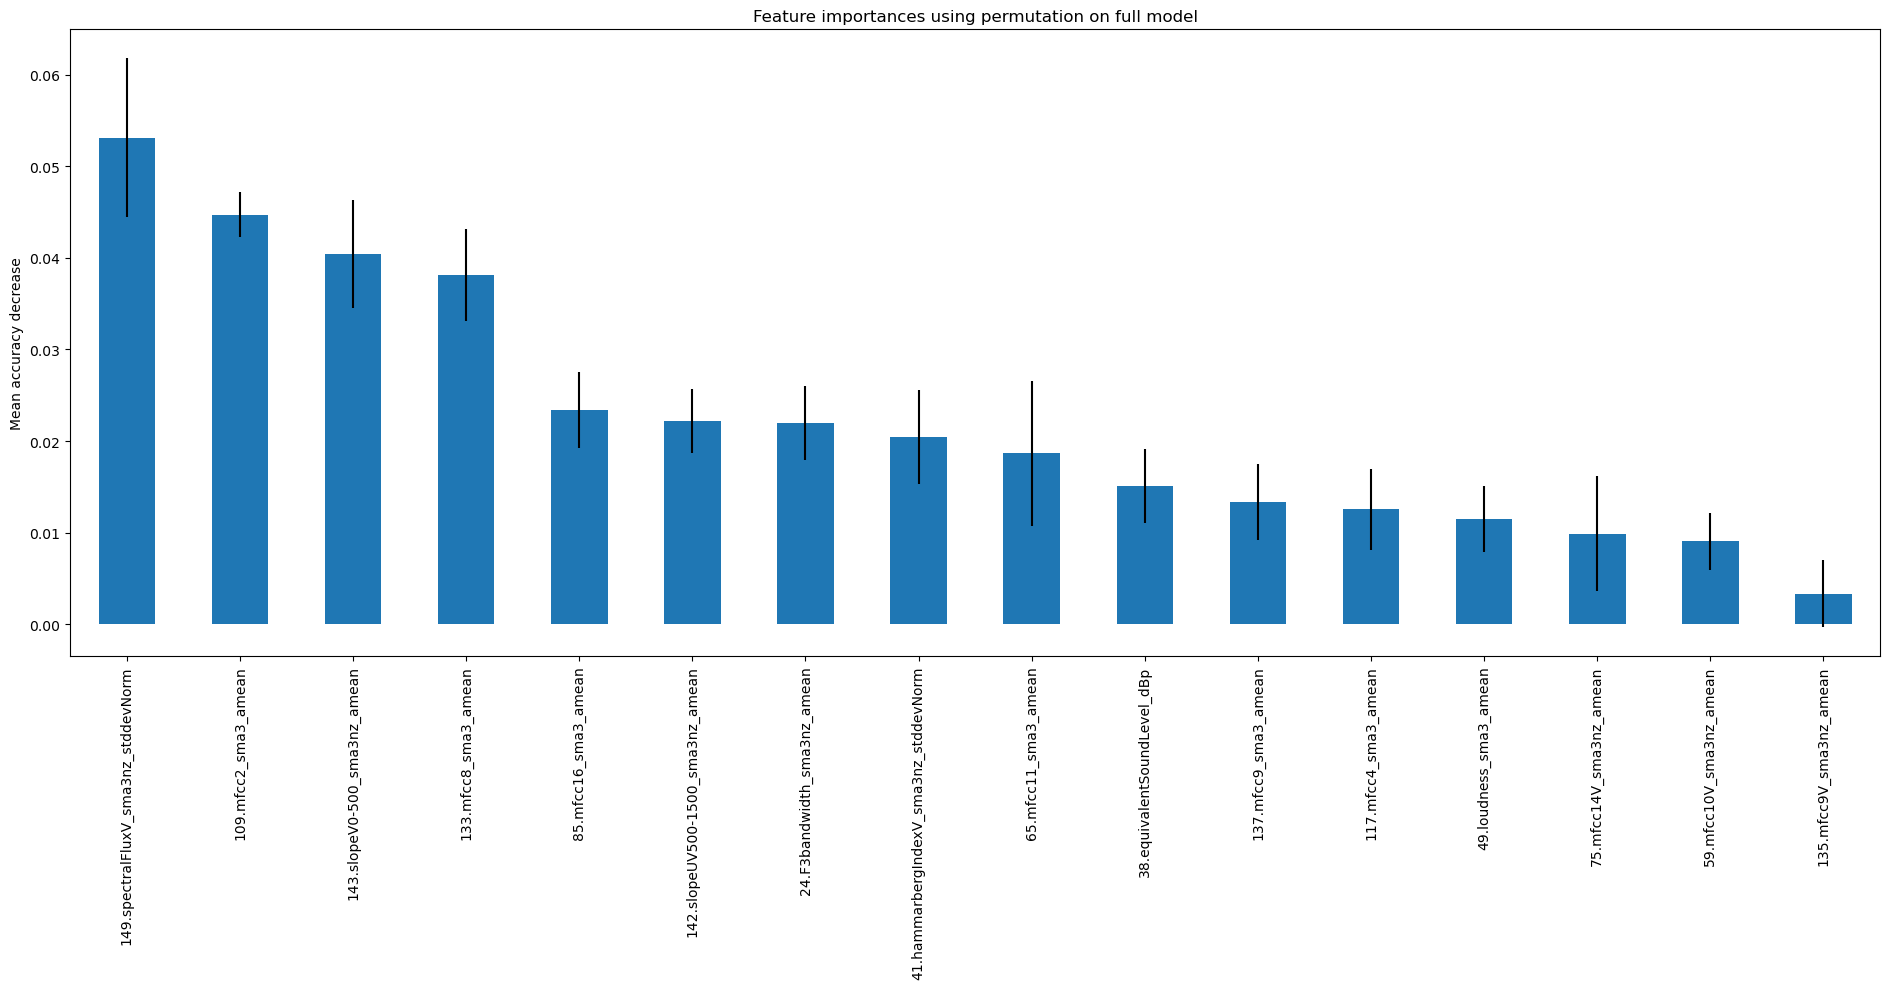

149
109
143
133
85
142
24
41
65
38
137
117
49
75
59
135
149
109
143
133
85
142
24
41
65
38
137
117
49
75
59
135
15 16
[149, 109, 143, 133, 85, 142, 24, 41, 65, 38, 137, 117, 49, 75, 59]
[75, 137, 85, 142, 24, 109, 133, 38, 117, 65, 143, 59, 149, 49, 41]
15290
15
<class 'numpy.float32'>
15
15
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.7805789  0.71780822]
Recall: [0.89030884 0.52716298]
F1-score: [0.8318408  0.60788863]
confusion_matrix:
[[836 103]
 [235 262]]
accuracy:
0.7646239554317549

forest_importances 75.mfcc14V_sma3nz_amean                  0.020125
137.mfcc9_sma3_amean                     0.023886
85.mfcc16_sma3_amean                     0.024443
142.slopeUV500-1500_sma3nz_amean         0.025836
24.F3bandwidth_sma3nz_amean              0.022214
109.mfcc2_sma3_amean                     0.047354
133.mfcc8_sma3_amean               

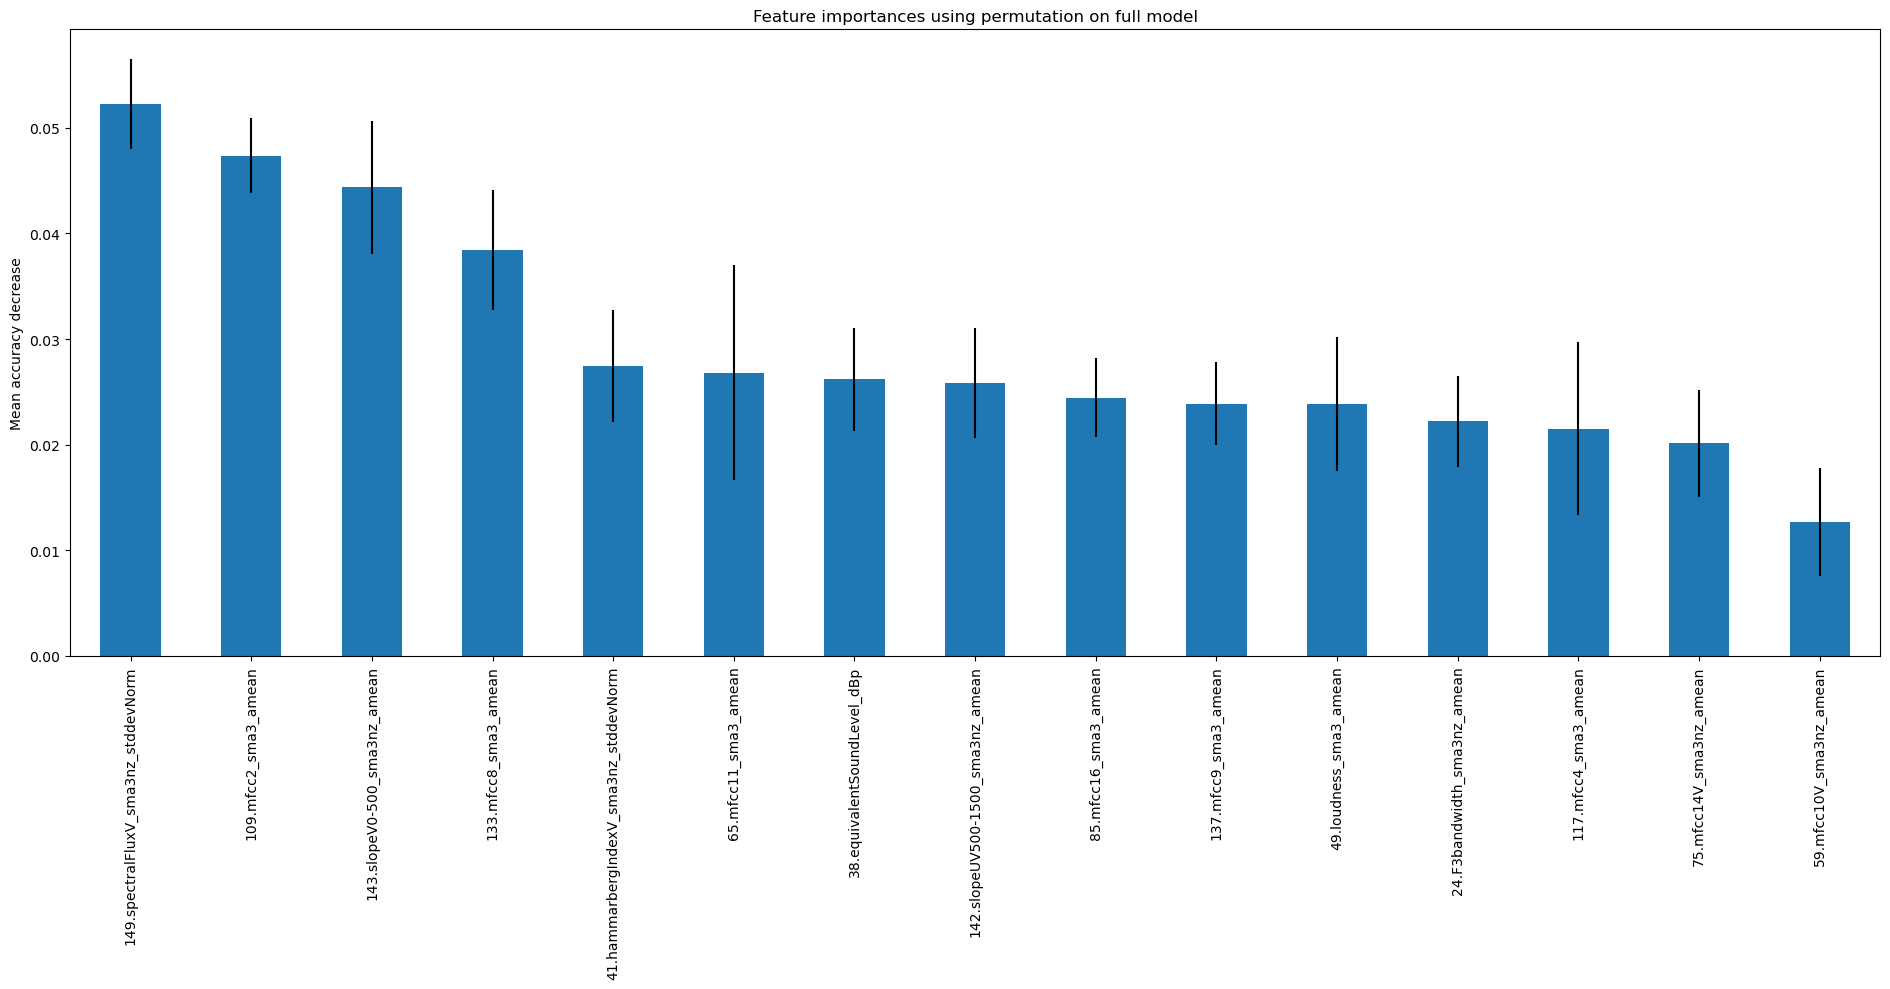

149
109
143
133
41
65
38
142
85
137
49
24
117
75
59
149
109
143
133
41
65
38
142
85
137
49
24
117
75
59
14 15
[149, 109, 143, 133, 41, 65, 38, 142, 85, 137, 49, 24, 117, 75]
[149, 24, 38, 137, 65, 85, 49, 41, 75, 133, 142, 117, 109, 143]
15290
14
<class 'numpy.float32'>
14
14
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.78557875 0.70942408]
Recall: [0.88178914 0.54527163]
F1-score: [0.83090818 0.61660978]
confusion_matrix:
[[828 111]
 [226 271]]
accuracy:
0.7653203342618384

forest_importances 149.spectralFluxV_sma3nz_stddevNorm      0.057173
24.F3bandwidth_sma3nz_amean              0.029178
38.equivalentSoundLevel_dBp              0.023189
137.mfcc9_sma3_amean                     0.024234
65.mfcc11_sma3_amean                     0.034123
85.mfcc16_sma3_amean                     0.021309
49.loudness_sma3_amean                   0.025766
4

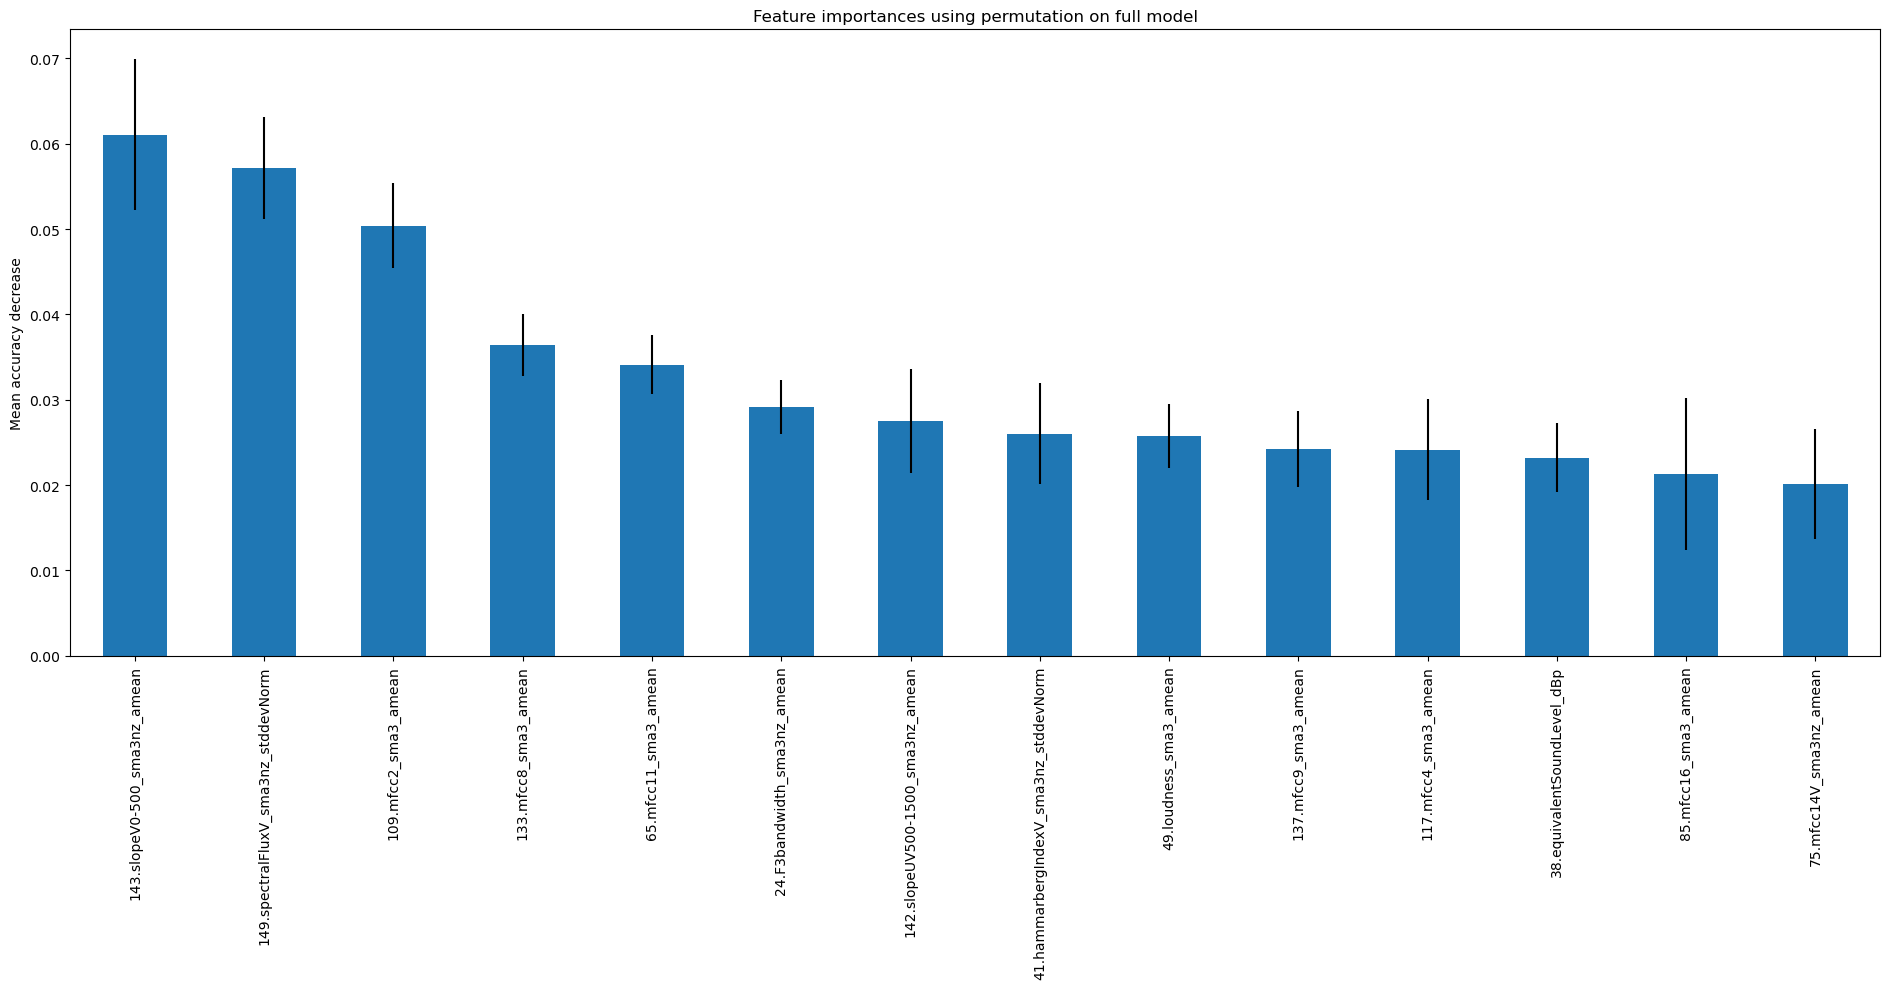

143
149
109
133
65
24
142
41
49
137
117
38
85
75
143
149
109
133
65
24
142
41
49
137
117
38
85
75
13 14
[143, 149, 109, 133, 65, 24, 142, 41, 49, 137, 117, 38, 85]
[142, 85, 143, 149, 49, 133, 65, 24, 137, 41, 109, 38, 117]
15290
13
<class 'numpy.float32'>
13
13
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.77333333 0.67098446]
Recall: [0.86474973 0.52112676]
F1-score: [0.8164907  0.58663647]
confusion_matrix:
[[812 127]
 [238 259]]
accuracy:
0.7458217270194986

forest_importances 142.slopeUV500-1500_sma3nz_amean         0.020334
85.mfcc16_sma3_amean                     0.012813
143.slopeV0-500_sma3nz_amean             0.039206
149.spectralFluxV_sma3nz_stddevNorm      0.045891
49.loudness_sma3_amean                   0.013231
133.mfcc8_sma3_amean                     0.020195
65.mfcc11_sma3_amean                     0.030501
24.F3bandwidth_

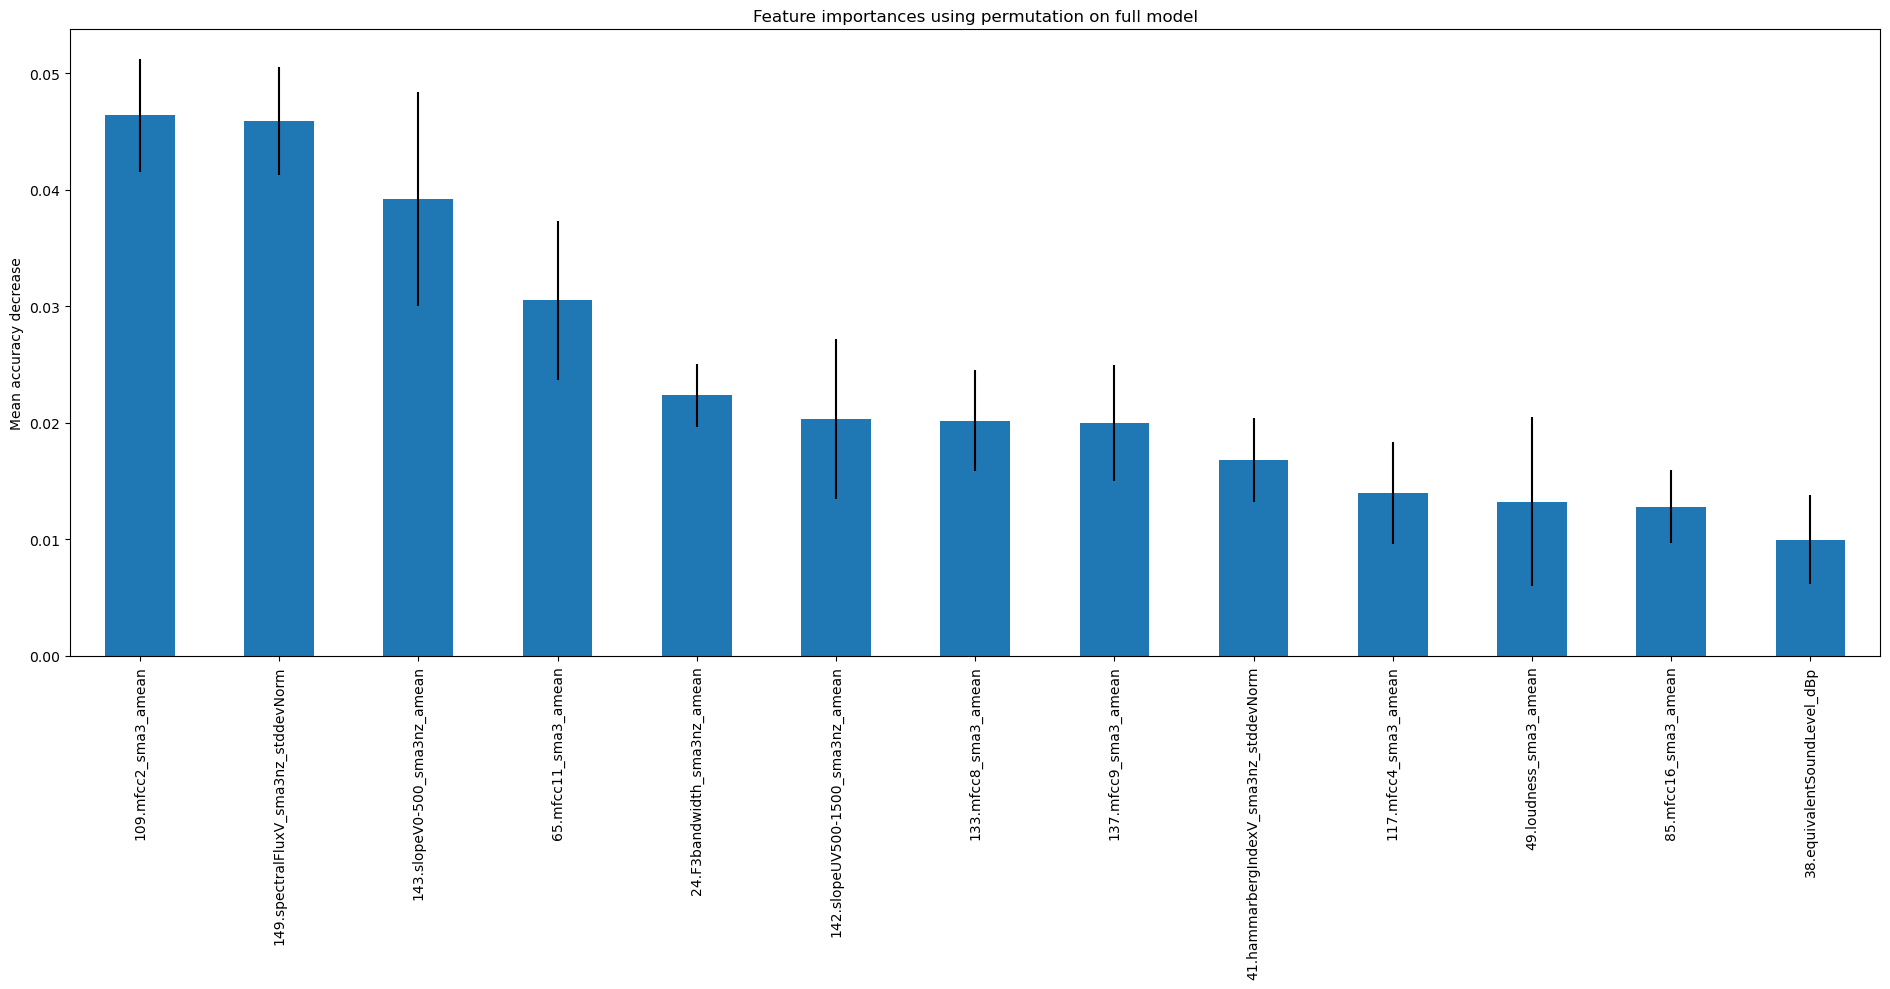

109
149
143
65
24
142
133
137
41
117
49
85
38
109
149
143
65
24
142
133
137
41
117
49
85
38
12 13
[109, 149, 143, 65, 24, 142, 133, 137, 41, 117, 49, 85]
[149, 65, 143, 41, 117, 85, 109, 24, 137, 49, 133, 142]
15290
12
<class 'numpy.float32'>
12
12
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.76784015 0.65714286]
Recall: [0.85942492 0.50905433]
F1-score: [0.81105528 0.57369615]
confusion_matrix:
[[807 132]
 [244 253]]
accuracy:
0.7381615598885793

forest_importances 149.spectralFluxV_sma3nz_stddevNorm      0.043872
65.mfcc11_sma3_amean                     0.035933
143.slopeV0-500_sma3nz_amean             0.047772
41.hammarbergIndexV_sma3nz_stddevNorm    0.019150
117.mfcc4_sma3_amean                     0.013788
85.mfcc16_sma3_amean                     0.020404
109.mfcc2_sma3_amean                     0.048886
24.F3bandwidth_sma3nz_amean  

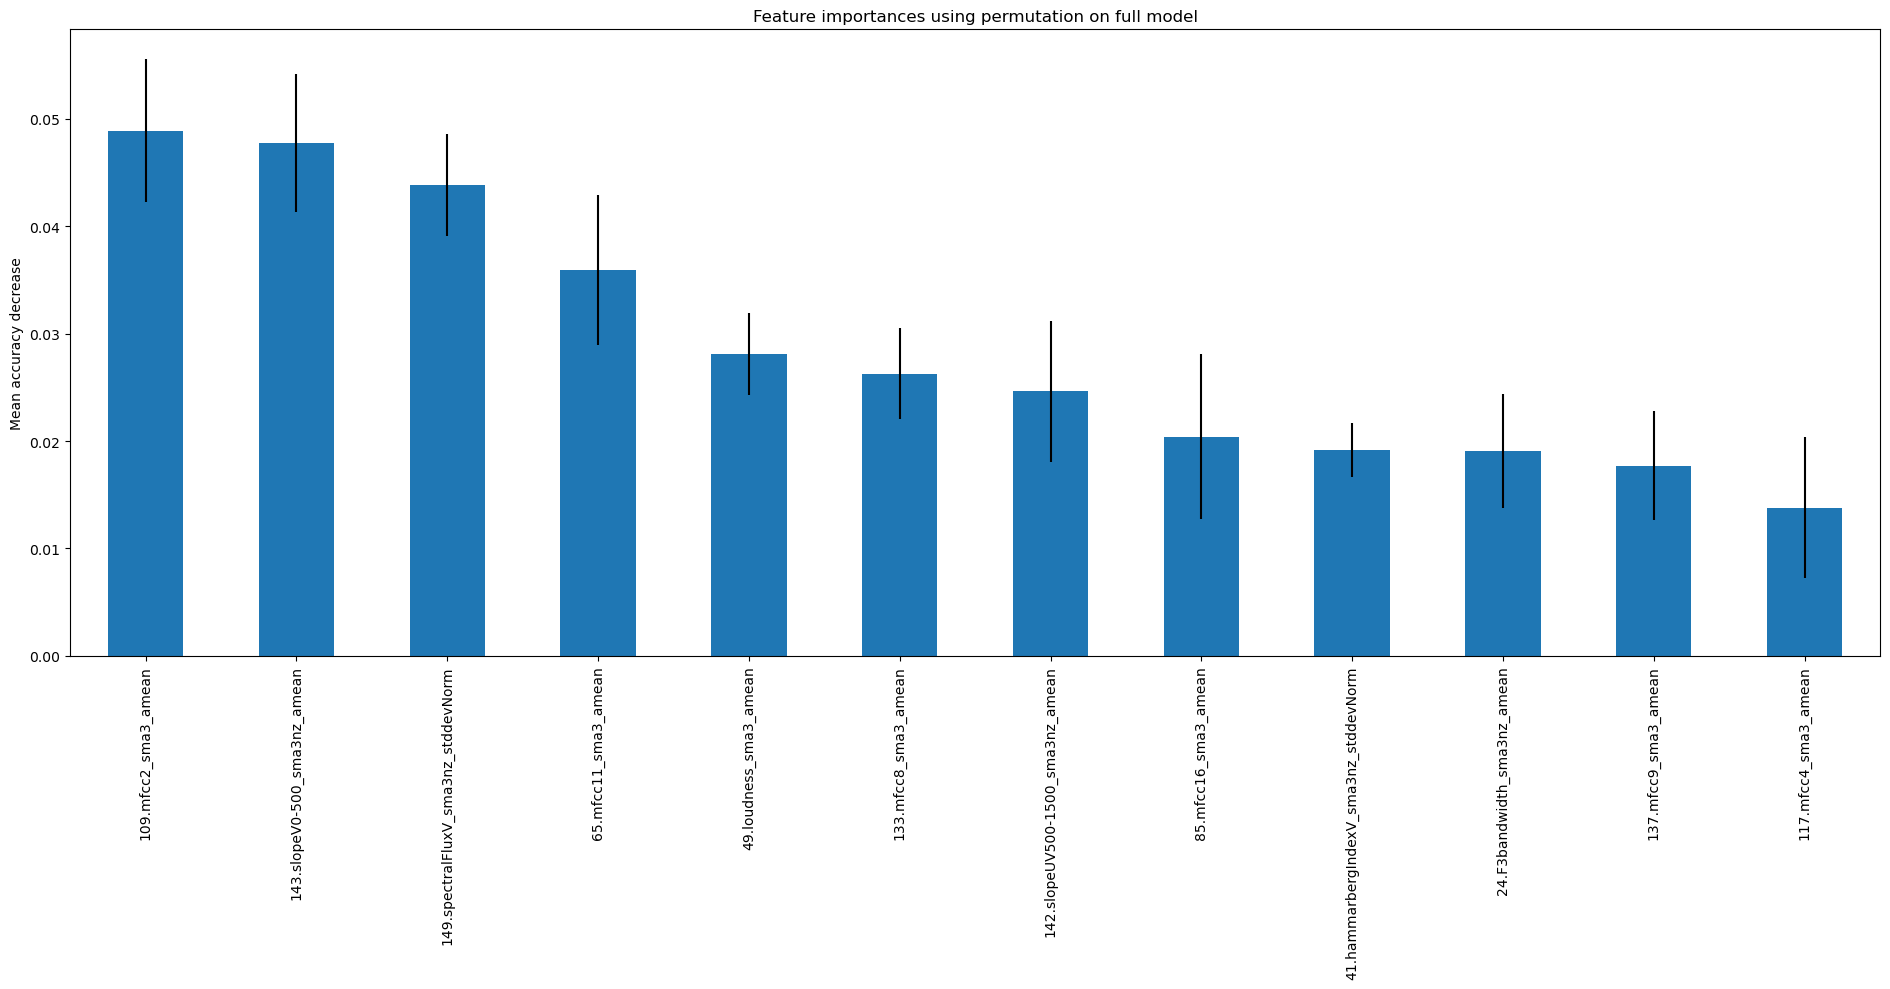

109
143
149
65
49
133
142
85
41
24
137
117
109
143
149
65
49
133
142
85
41
24
137
117
11 12
[109, 143, 149, 65, 49, 133, 142, 85, 41, 24, 137]
[109, 41, 65, 85, 49, 142, 149, 133, 137, 24, 143]
15290
11
<class 'numpy.float32'>
11
11
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.77194656 0.66494845]
Recall: [0.86155485 0.51911469]
F1-score: [0.8142929  0.58305085]
confusion_matrix:
[[809 130]
 [239 258]]
accuracy:
0.7430362116991643

forest_importances 109.mfcc2_sma3_amean                     0.060933
41.hammarbergIndexV_sma3nz_stddevNorm    0.020891
65.mfcc11_sma3_amean                     0.032382
85.mfcc16_sma3_amean                     0.026950
49.loudness_sma3_amean                   0.031407
142.slopeUV500-1500_sma3nz_amean         0.030571
149.spectralFluxV_sma3nz_stddevNorm      0.052019
133.mfcc8_sma3_amean                     0.03

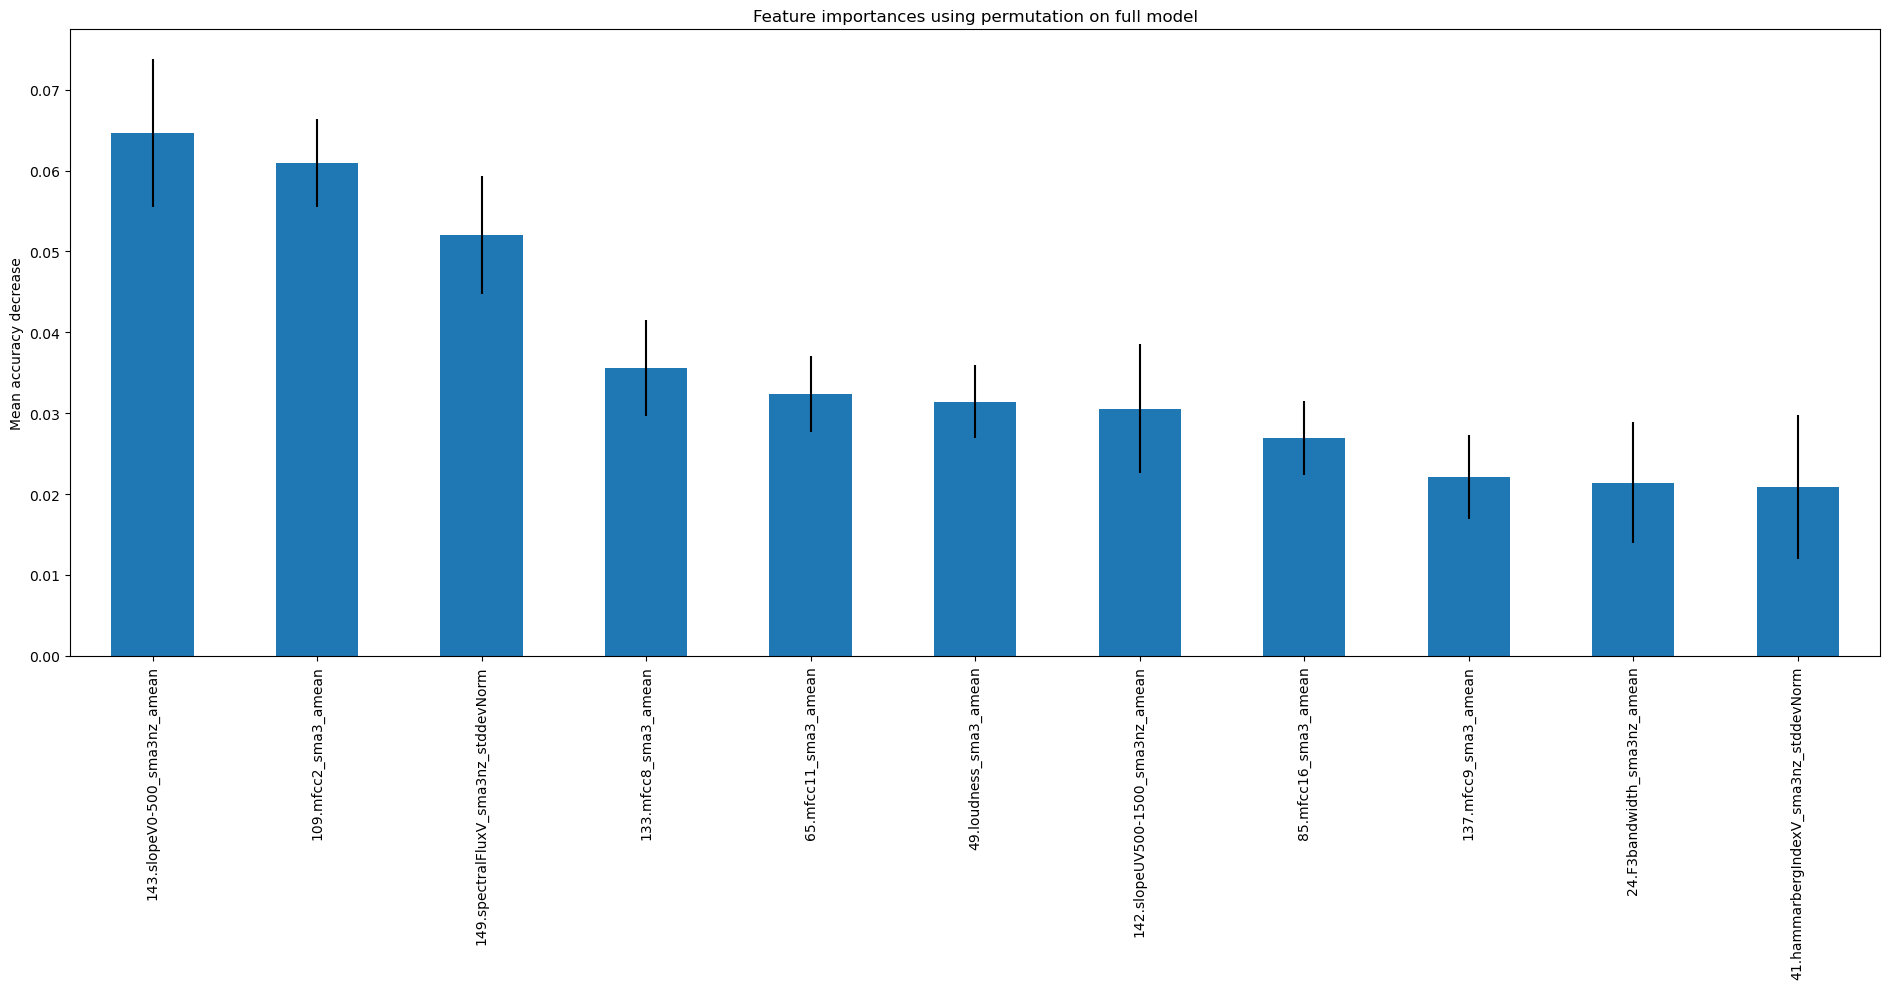

143
109
149
133
65
49
142
85
137
24
41
143
109
149
133
65
49
142
85
137
24
41
10 11
[143, 109, 149, 133, 65, 49, 142, 85, 137, 24]
[137, 65, 149, 143, 133, 142, 24, 109, 49, 85]
15290
10
<class 'numpy.float32'>
10
10
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.76526718 0.64690722]
Recall: [0.85410011 0.50503018]
F1-score: [0.80724711 0.56723164]
confusion_matrix:
[[802 137]
 [246 251]]
accuracy:
0.7332869080779945

forest_importances 137.mfcc9_sma3_amean                   0.021379
65.mfcc11_sma3_amean                   0.025696
149.spectralFluxV_sma3nz_stddevNorm    0.050487
143.slopeV0-500_sma3nz_amean           0.074513
133.mfcc8_sma3_amean                   0.039624
142.slopeUV500-1500_sma3nz_amean       0.026253
24.F3bandwidth_sma3nz_amean            0.018384
109.mfcc2_sma3_amean                   0.062535
49.loudness_sma3_amean     

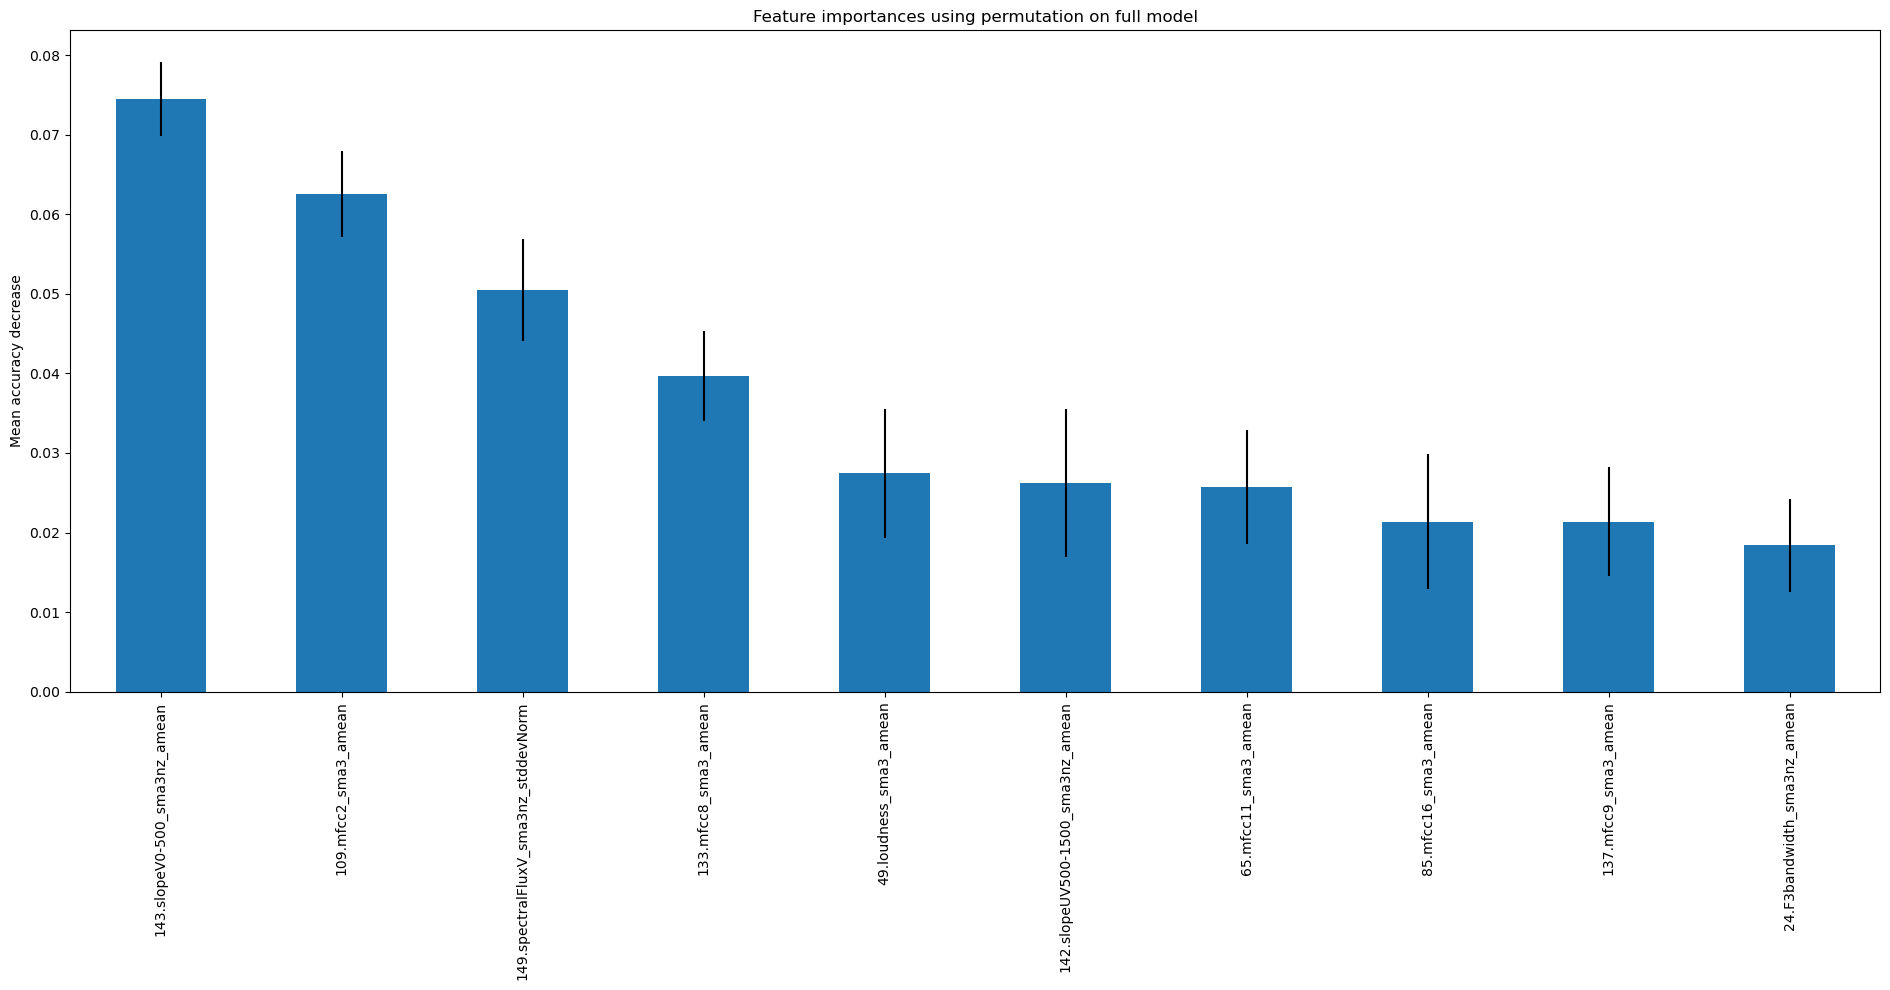

143
109
149
133
49
142
65
85
137
24
143
109
149
133
49
142
65
85
137
24
9 10
[143, 109, 149, 133, 49, 142, 65, 85, 137]
[149, 85, 65, 137, 109, 143, 133, 142, 49]
15290
9
<class 'numpy.float32'>
9
9
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.76849183 0.64810127]
Recall: [0.85197018 0.51509054]
F1-score: [0.80808081 0.57399103]
confusion_matrix:
[[800 139]
 [241 256]]
accuracy:
0.7353760445682451

forest_importances 149.spectralFluxV_sma3nz_stddevNorm    0.060167
85.mfcc16_sma3_amean                   0.022006
65.mfcc11_sma3_amean                   0.038649
137.mfcc9_sma3_amean                   0.023886
109.mfcc2_sma3_amean                   0.072981
143.slopeV0-500_sma3nz_amean           0.072702
133.mfcc8_sma3_amean                   0.043942
142.slopeUV500-1500_sma3nz_amean       0.028691
49.loudness_sma3_amean                 0.0403

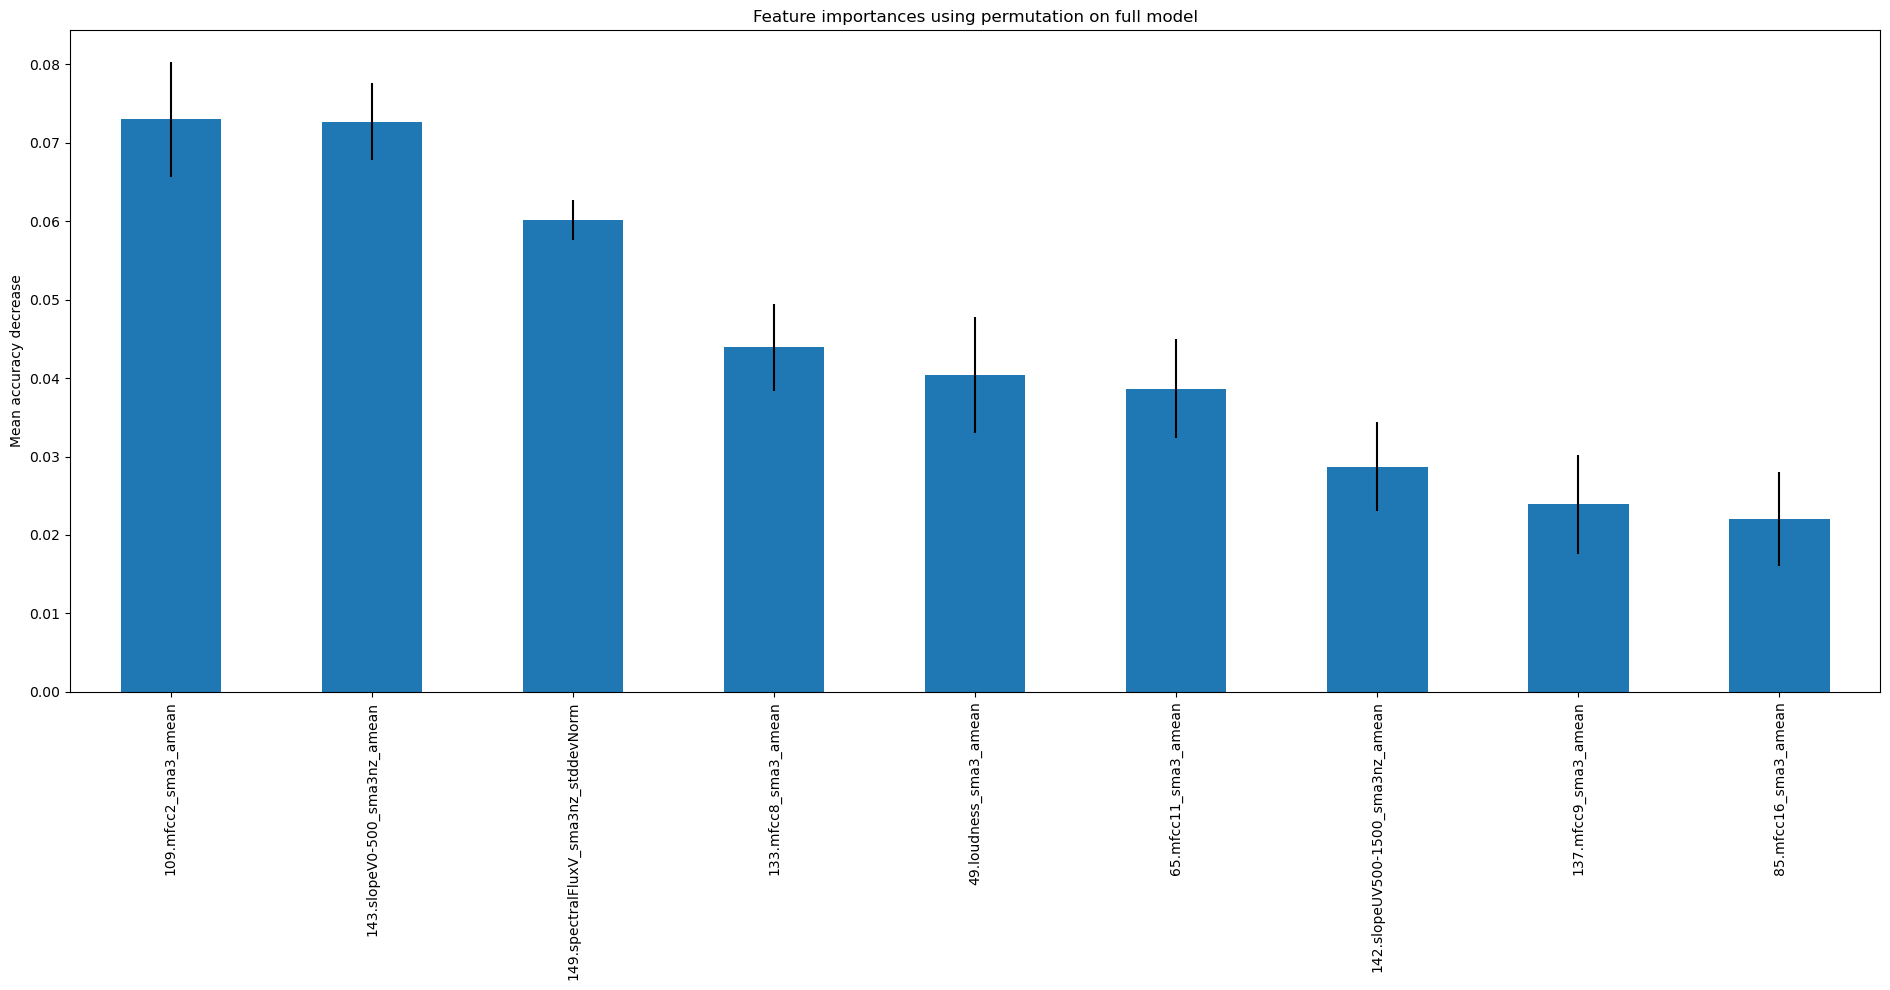

109
143
149
133
49
65
142
137
85
109
143
149
133
49
65
142
137
85
8 9
[109, 143, 149, 133, 49, 65, 142, 137]
[49, 133, 142, 65, 109, 143, 137, 149]
15290
8
<class 'numpy.float32'>
8
8
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.76315789 0.6195122 ]
Recall: [0.83386581 0.5110664 ]
F1-score: [0.79694656 0.5600882 ]
confusion_matrix:
[[783 156]
 [243 254]]
accuracy:
0.7221448467966574

forest_importances 49.loudness_sma3_amean                 0.027368
133.mfcc8_sma3_amean                   0.038231
142.slopeUV500-1500_sma3nz_amean       0.026741
65.mfcc11_sma3_amean                   0.034819
109.mfcc2_sma3_amean                   0.066922
143.slopeV0-500_sma3nz_amean           0.066295
137.mfcc9_sma3_amean                   0.019081
149.spectralFluxV_sma3nz_stddevNorm    0.057451
dtype: float64
forest_importances 49.loudness_sma3_amean    

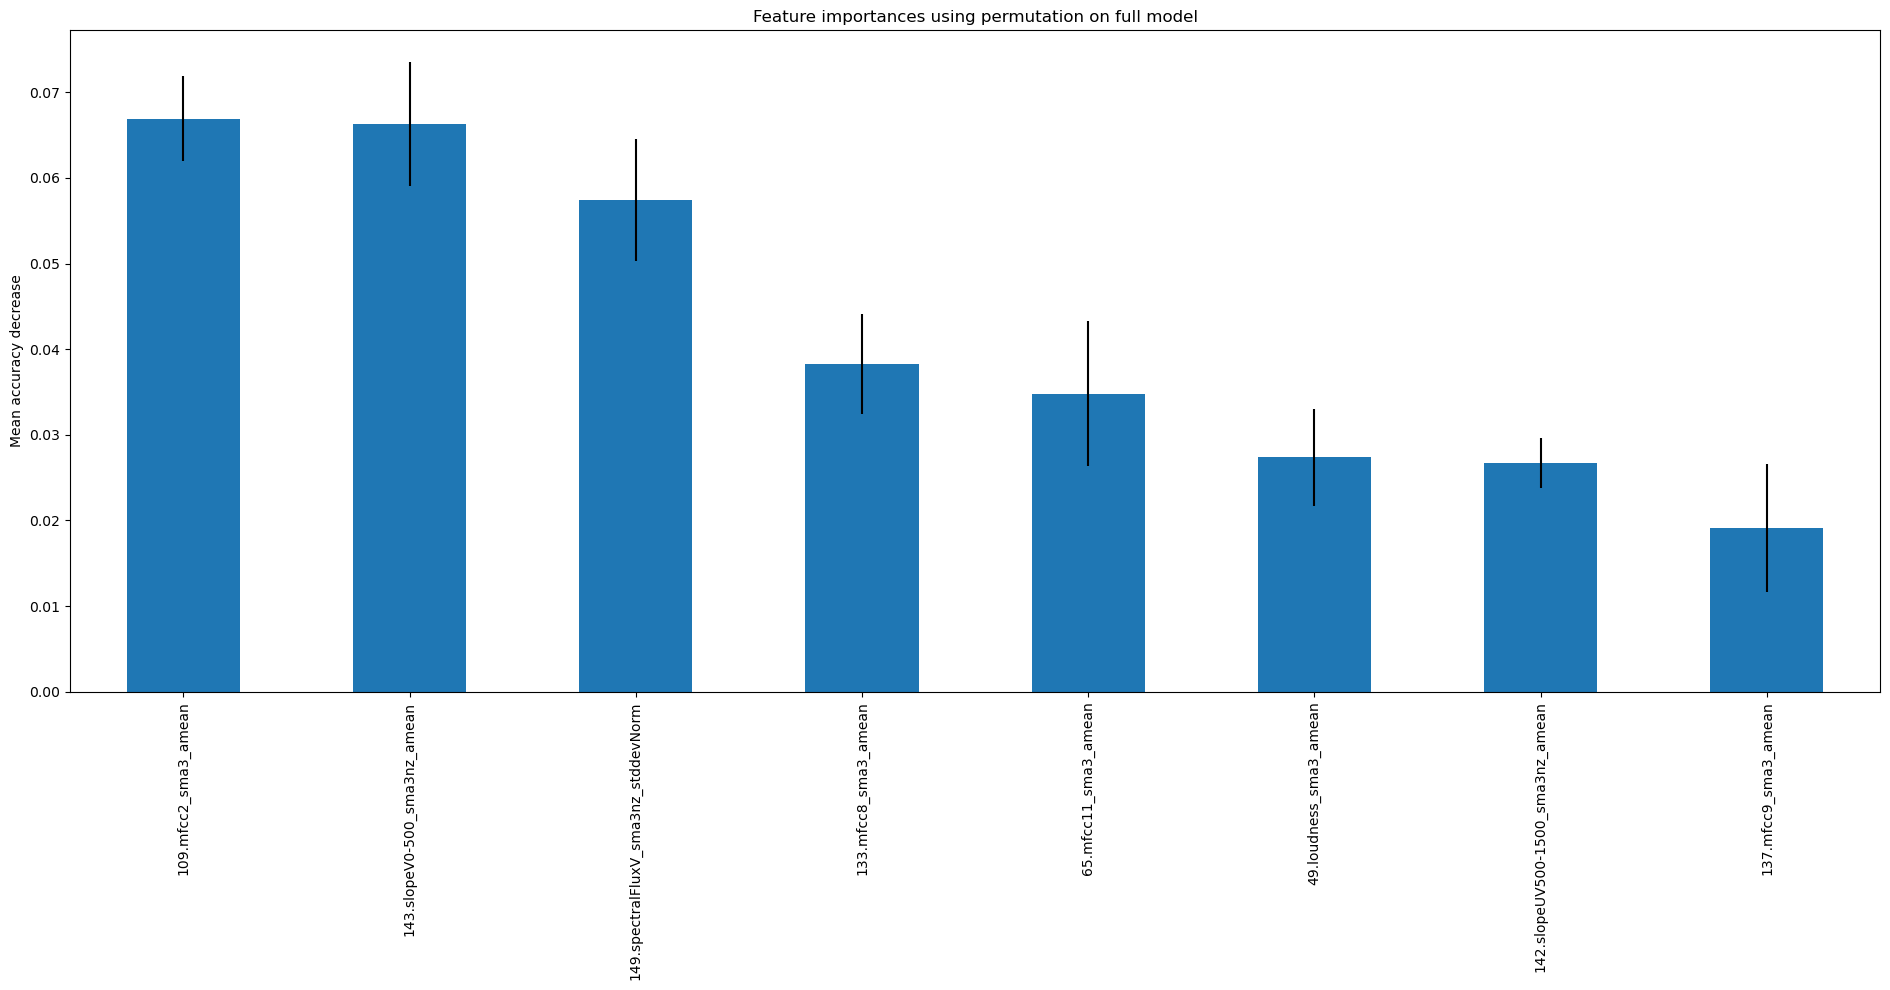

109
143
149
133
65
49
142
137
109
143
149
133
65
49
142
137
7 8
[109, 143, 149, 133, 65, 49, 142]
[133, 143, 49, 65, 149, 109, 142]
15290
7
<class 'numpy.float32'>
7
7
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.75409836 0.60651629]
Recall: [0.83280085 0.48692153]
F1-score: [0.79149798 0.54017857]
confusion_matrix:
[[782 157]
 [255 242]]
accuracy:
0.713091922005571

forest_importances 133.mfcc8_sma3_amean                   0.037117
143.slopeV0-500_sma3nz_amean           0.071588
49.loudness_sma3_amean                 0.029318
65.mfcc11_sma3_amean                   0.034749
149.spectralFluxV_sma3nz_stddevNorm    0.053621
109.mfcc2_sma3_amean                   0.068245
142.slopeUV500-1500_sma3nz_amean       0.027298
dtype: float64
forest_importances 133.mfcc8_sma3_amean                   0.037117
143.slopeV0-500_sma3nz_amean           0.07

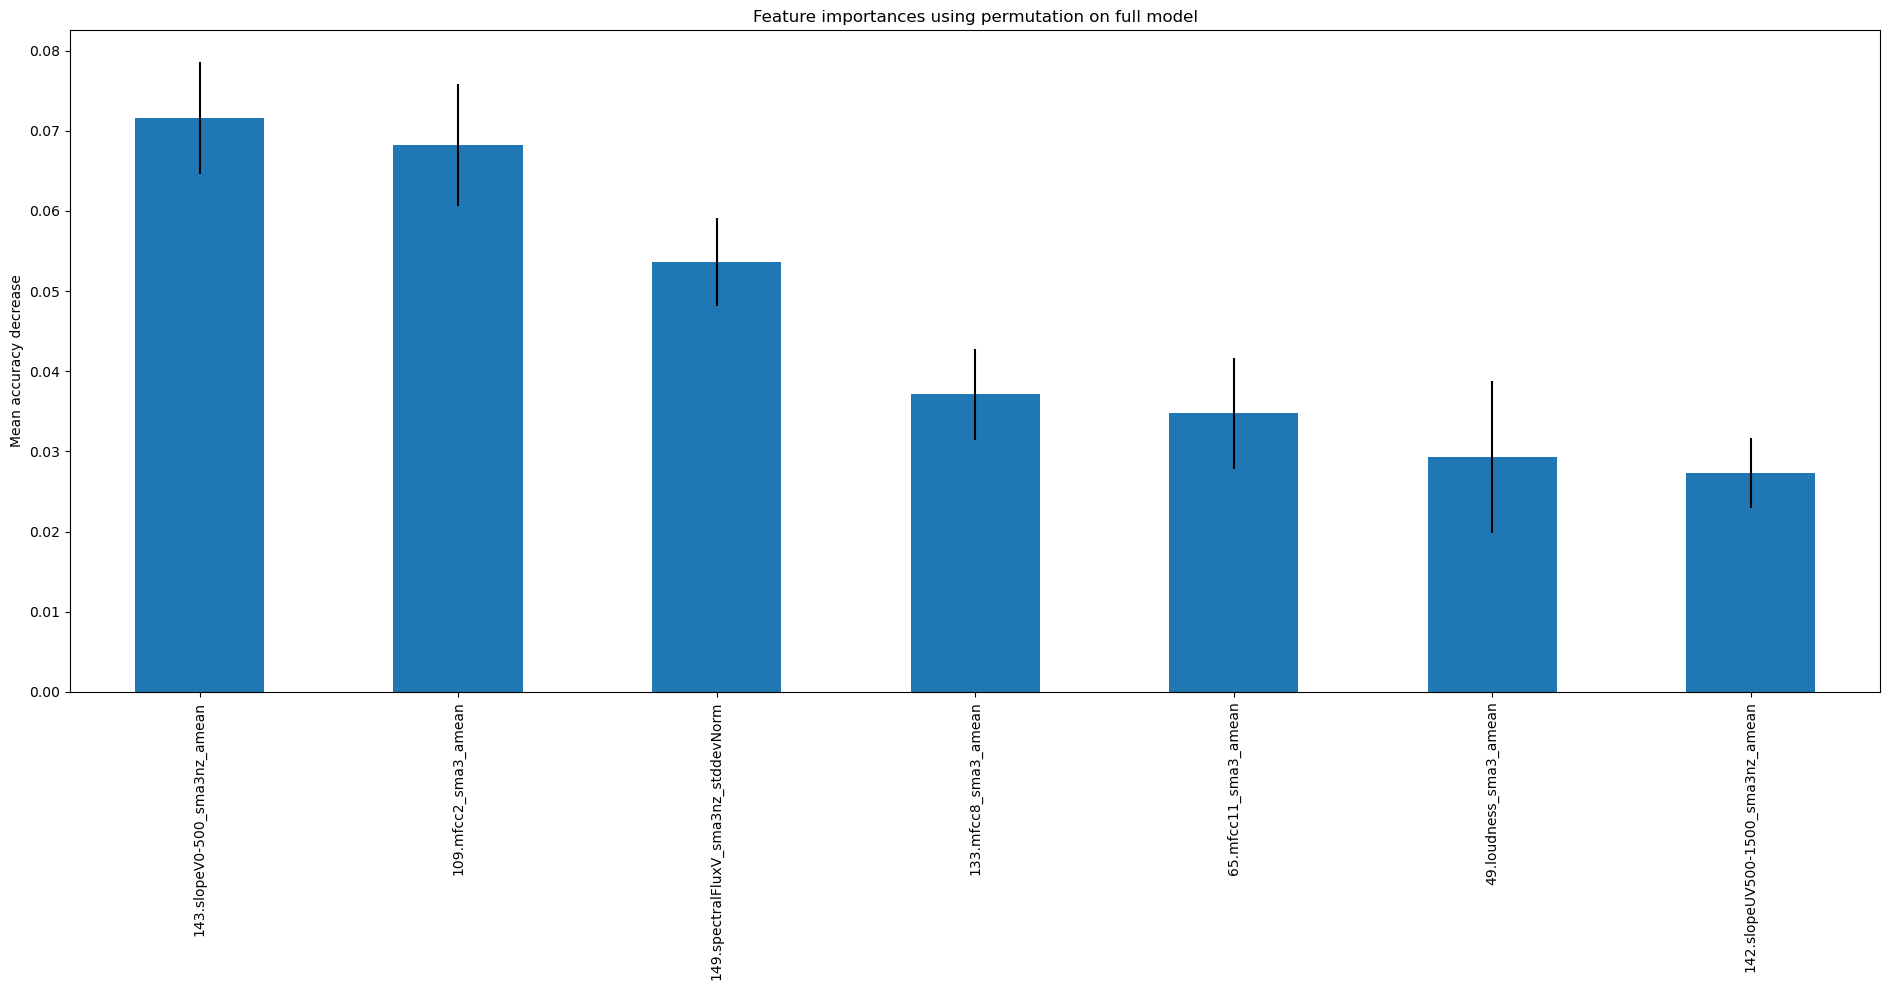

143
109
149
133
65
49
142
143
109
149
133
65
49
142
6 7
[143, 109, 149, 133, 65, 49]
[133, 49, 109, 65, 149, 143]
15290
6
<class 'numpy.float32'>
6
6
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.74665392 0.59487179]
Recall: [0.83173589 0.4668008 ]
F1-score: [0.78690176 0.52311161]
confusion_matrix:
[[781 158]
 [265 232]]
accuracy:
0.7054317548746518

forest_importances 133.mfcc8_sma3_amean                   0.043245
49.loudness_sma3_amean                 0.037604
109.mfcc2_sma3_amean                   0.068175
65.mfcc11_sma3_amean                   0.054944
149.spectralFluxV_sma3nz_stddevNorm    0.062674
143.slopeV0-500_sma3nz_amean           0.082312
dtype: float64
forest_importances 133.mfcc8_sma3_amean                   0.043245
49.loudness_sma3_amean                 0.037604
109.mfcc2_sma3_amean                   0.068175
65.mfcc11_sm

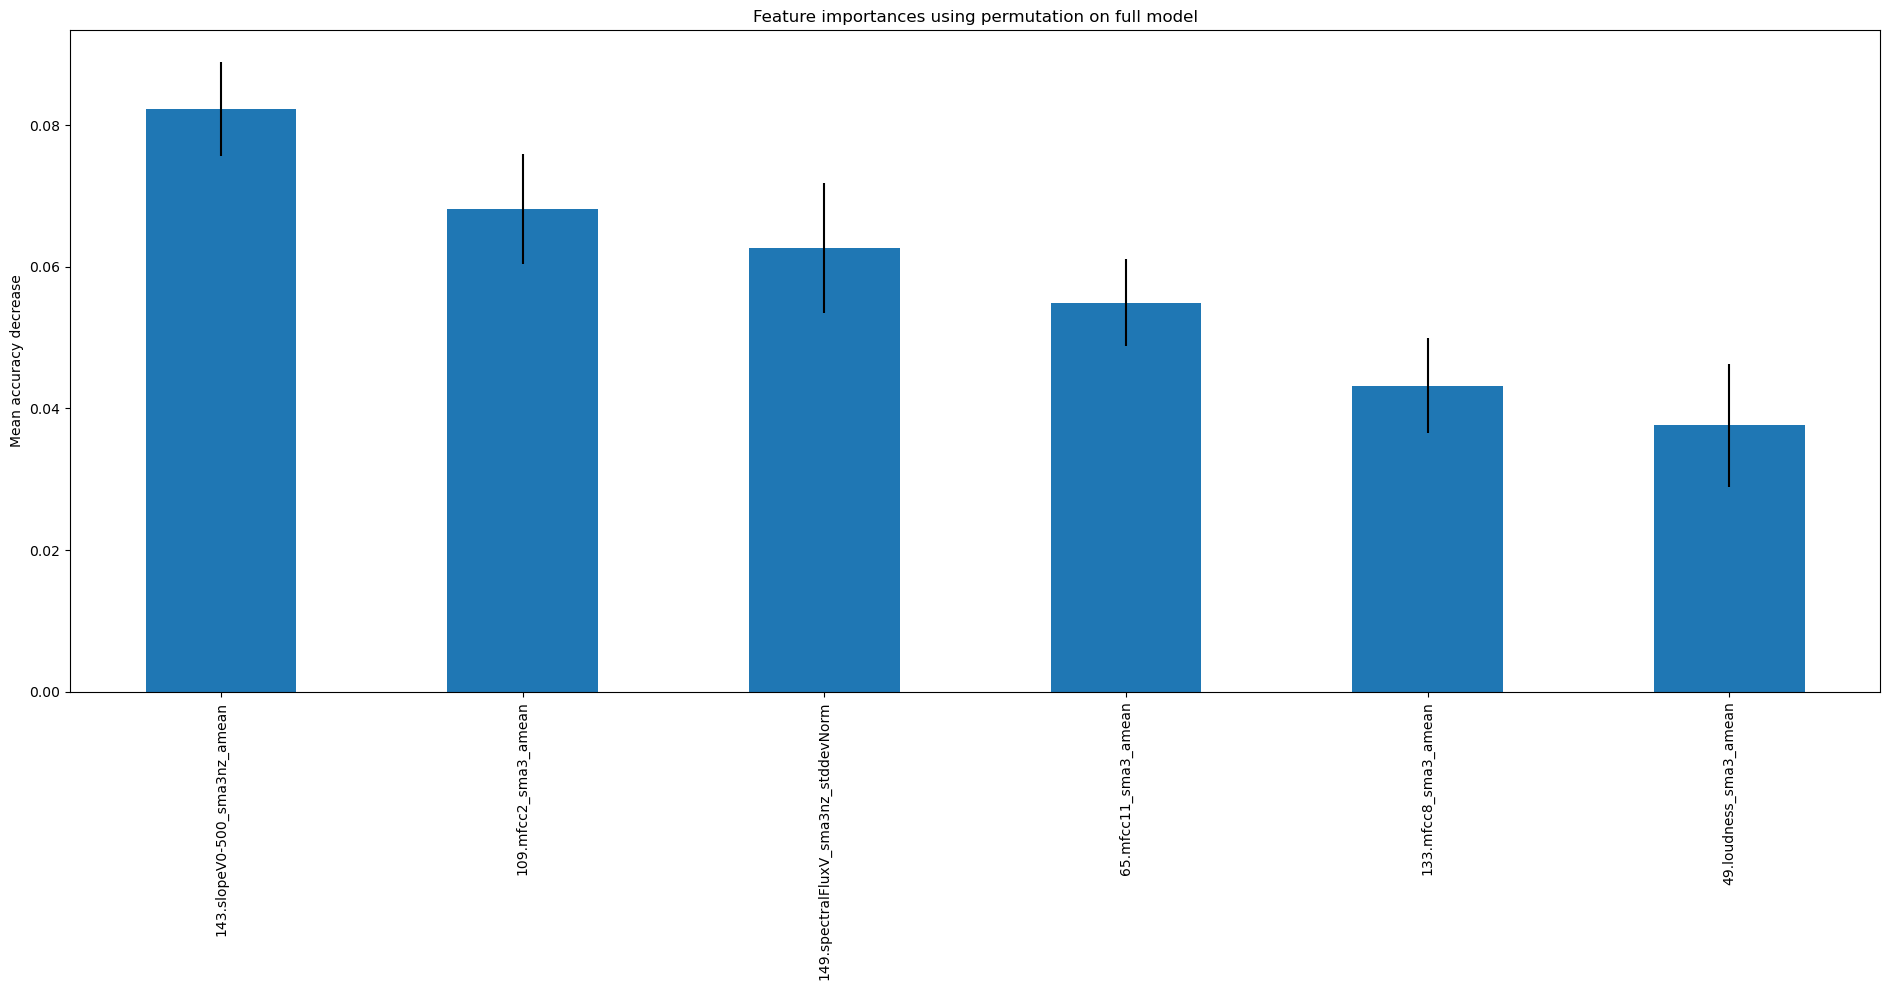

143
109
149
65
133
49
143
109
149
65
133
49
5 6
[143, 109, 149, 65, 133]
[133, 109, 143, 149, 65]
15290
5
<class 'numpy.float32'>
5
5
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.73603083 0.56030151]
Recall: [0.81363152 0.44869215]
F1-score: [0.77288821 0.49832402]
confusion_matrix:
[[764 175]
 [274 223]]
accuracy:
0.6873259052924791



In [53]:
while True:
    forest_importances_sort=print_importance(forest3,func_data_test_selectedf,func_label_test,features_name_selected)

    im_comb=[]
    im_value=[]
    for i in range(len(forest_importances_sort)):
        if forest_importances_sort[i]>0:
            im_value.append( forest_importances_sort[i])
            print(forest_importances_sort.index[i].split('.')[0])
            im_comb.append(int(forest_importances_sort.index[i].split('.')[0]))
    if len(im_comb)-len_old==0:
        im_comb=im_comb[:-1]
        
    len_old=len(im_comb)
    print(len(im_comb),len(im_value))
    func_data_train_selectedf,func_data_test_selectedf,features_name_selected=get_new_data(im_comb, func_data_train_over,func_data_test,func_features_name,'true')
    forest3, acc=retrain_retest_rf(func_data_train_selectedf,func_data_test_selectedf)
    if acc>acc_old:
        acc_old=acc
    if abs(acc_old-acc)>0.1:
        break

In [54]:
print(acc_old) 

0.7896935933147632


In [55]:
#get the features lists:
selected_features_list=[133, 137, 143, 93, 24, 41, 142, 87, 120, 50, 75, 30, 149, 131, 78, 117, 59, 85, 123, 65, 135, 38, 109, 141, 49]
print(len(selected_features_list))
#print important features
for i in selected_features_list:
    print(func_features_name[i])

25
133.mfcc8_sma3_amean
137.mfcc9_sma3_amean
143.slopeV0-500_sma3nz_amean
93.mfcc18_sma3_amean
24.F3bandwidth_sma3nz_amean
41.hammarbergIndexV_sma3nz_stddevNorm
142.slopeUV500-1500_sma3nz_amean
87.mfcc17V_sma3nz_amean
120.mfcc5V_sma3nz_stddevNorm
50.loudness_sma3_meanFallingSlope
75.mfcc14V_sma3nz_amean
30.MeanUnvoicedSegmentLength
149.spectralFluxV_sma3nz_stddevNorm
131.mfcc8V_sma3nz_amean
78.mfcc14_sma3_stddevNorm
117.mfcc4_sma3_amean
59.mfcc10V_sma3nz_amean
85.mfcc16_sma3_amean
123.mfcc6V_sma3nz_amean
65.mfcc11_sma3_amean
135.mfcc9V_sma3nz_amean
38.equivalentSoundLevel_dBp
109.mfcc2_sma3_amean
141.slopeUV0-500_sma3nz_amean
49.loudness_sma3_amean


# 5. three classes analysis

In [23]:
def print3classes(wrongfile0,wrongfile1,thefile):
    # all data distribution
    print('---raw test data distribution:')
    lrna=0
    lsna=0
    lcna=0
    lra=0
    lsa=0
    lca=0
    lennum0=0
    lennum1=0
    for i in thefile: #print(i[3],i[7:10])
        if i[3]=='2' or i[3]=='4': #na
            if i[7:10] in spontaneous_na :
                lsna+=1
            elif i[7:10] in command_control_na:
                lcna+=1
            elif i[7:10] in read_na:
                lrna+=1
            else:
                print(i)
            lennum0+=1
        if i[3]=='1' or i[3]=='3': #a
            if i[7:10] in spontaneous_a :
                lsa+=1
            elif i[7:10] in command_control_a:
                lca+=1
            elif i[7:10] in read_a:
                lra+=1
            else:
                print(i)
            lennum1+=1

    print('class0:',lrna,lsna,lcna)
    print(lrna/lennum0,lsna/lennum0,lcna/lennum0)
    print('class1:',lra,lsa,lca)
    print(lra/lennum1,lsa/lennum1,lca/lennum1)
    print()
    
    print('---class 0 preditions distribution:')
    print(len(wrongfile0))
    lennum=len(wrongfile0)
    rna=0
    sna=0
    cna=0
    for i in wrongfile0: #sober
        #print(i[3],i[7:10])
        if i[7:10] in spontaneous_na :
            sna+=1
        elif i[7:10] in command_control_na:
            cna+=1
        elif i[7:10] in read_na:
            rna+=1
        else:
            print(i)
    print(rna,sna,cna)
    #print(rna/lennum,sna/lennum,cna/lennum)
    print(1-rna/lrna,1-sna/lsna,1-cna/lcna)
    print('---class 1 preditions distribution:')
    print(len(wrongfile1))
    lennum=len(wrongfile1)
    ra=0
    sa=0
    ca=0
    for i in wrongfile1: #sober
        if i[7:10] in spontaneous_a :
            sa+=1
        elif i[7:10] in command_control_a:
            ca+=1
        elif i[7:10] in read_a:
            ra+=1
        else:
            print(i)
    print(ra,sa,ca)
    #print(ra/lennum,sa/lennum,ca/lennum)
    print(1-ra/lra,1-sa/lsa,1-ca/lca)
    print()
    
    print('---all test preditions distribution:')
    print(1-((rna+ra)/(lrna+lra)),1-((sna+sa)/(lsna+lsa)),1-((cna+ca)/(lcna+lca)))
    print((rna+ra),(sna+sa),(cna+ca))
    print((lrna+lra),(lsna+lsa),(lcna+lca))

def get_wrongfile(truey,predy,thefile):
    thewrong0=[]
    thewrong1=[]
    print(len(truey),len(predy))
    for i in range(len(truey)):
        print(truey[i],predy[i])
        if truey[i]!=predy[i]:
            if truey[i]==0:
                thewrong0.append(i)
            else:
                thewrong1.append(i)
    # print(thewrong0)
    # print(thewrong1)    

    wrongfile0=[]
    for i in thewrong0:
        wrongfile0.append(thefile[i])

    wrongfile1=[]
    for j in thewrong1:
        wrongfile1.append(thefile[j])
    return  wrongfile0, wrongfile1

In [24]:
read_a = ['001','003', '004', '006', '007', '008','009', '011', '012', '013', '015', '016', '017', '019','020','021','023','024','029','030'] #read numbers, address, words, sentences, credit card numbers, auto numbers
spontaneous_a = ['002', '014', '005','010','018'] 
command_control_a = ['022','025','026','027','028'] 

read_na = ['001','003','004','006','007','008','009','011','012','013','015', '016', '017', '019','020','021','023','024','026','027','028', '031','032','033','035','036','037','039','040','041','044','050','051','052','056','057','058','059','060','029']
spontaneous_na = ['002','014','022','034', '005', '010', '018','025','030','038'] 
command_control_na = ['042','043','045','046','047','048','049','053','054','055']

### 1).forest 1: with all data

In [25]:
truey=func_label_test
predy=forest1.predict(func_data_test)
wrongfile0,wrongfile1=get_wrongfile(truey,predy,func_name_test)

print3classes(wrongfile0,wrongfile1,func_name_test)

1436 1436
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.

### 2).forest 2: with oversampling data

In [28]:
truey=func_label_test
predy=forest2.predict(func_data_test)
wrongfile0,wrongfile1=get_wrongfile(truey,predy,func_name_test)

print3classes(wrongfile0,wrongfile1,func_name_test)

1436 1436
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.

### 3).forest 3: with oversampling data with selected features

In [56]:
im_comb=selected_features_list
func_data_train_selectedf,func_data_test_selectedf,features_name_selected=get_new_data(im_comb, func_data_train_over,func_data_test,func_features_name,'false')
forest3,acc3=retrain_retest_rf(func_data_train_selectedf,func_data_test_selectedf)

[133, 137, 143, 93, 24, 41, 142, 87, 120, 50, 75, 30, 149, 131, 78, 117, 59, 85, 123, 65, 135, 38, 109, 141, 49]
15290
25
<class 'numpy.float32'>
25
25
num_str
Precision: [1. 1.]
Recall: [1. 1.]
F1-score: [1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
--- forest2 , test4 ---
Precision: [0.79906103 0.76280323]
Recall: [0.90628328 0.5694165 ]
F1-score: [0.8493014  0.65207373]
confusion_matrix:
[[851  88]
 [214 283]]
accuracy:
0.7896935933147632



forest_importances 133.mfcc8_sma3_amean                     0.042967
137.mfcc9_sma3_amean                     0.020195
143.slopeV0-500_sma3nz_amean             0.027019
93.mfcc18_sma3_amean                     0.017409
24.F3bandwidth_sma3nz_amean              0.026045
41.hammarbergIndexV_sma3nz_stddevNorm    0.016783
142.slopeUV500-1500_sma3nz_amean         0.018245
87.mfcc17V_sma3nz_amean                  0.018593
120.mfcc5V_sma3nz_stddevNorm             0.015599
50.loudness_sma3_meanFallingSlope        0.015042
75.mfcc14V_sma3nz_amean                  0.022214
30.MeanUnvoicedSegmentLength             0.011142
149.spectralFluxV_sma3nz_stddevNorm      0.049234
131.mfcc8V_sma3nz_amean                  0.016713
78.mfcc14_sma3_stddevNorm                0.011421
117.mfcc4_sma3_amean                     0.015320
59.mfcc10V_sma3nz_amean                  0.015738
85.mfcc16_sma3_amean                     0.016783
123.mfcc6V_sma3nz_amean                  0.011142
65.mfcc11_sma3_amean           

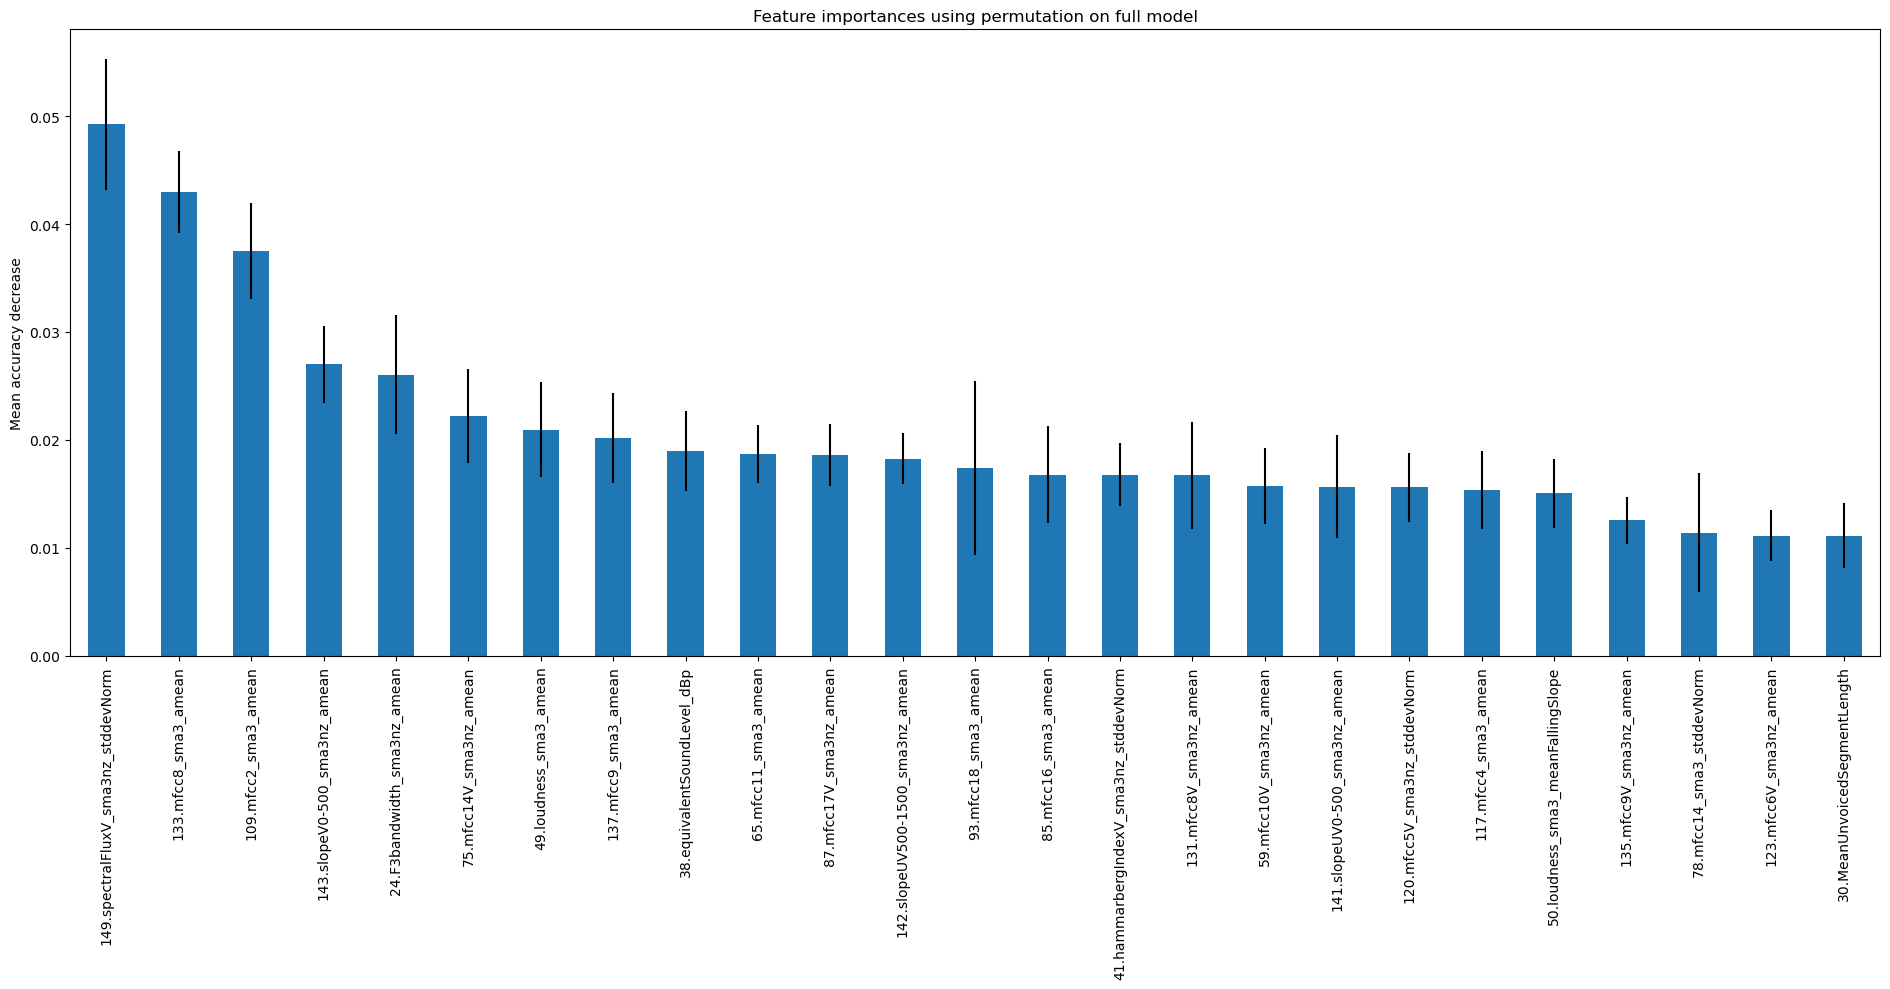

149
133
109
143
24
75
49
137
38
65
87
142
93
85
41
131
59
141
120
117
50
135
78
123
30


In [57]:
forest_importances_sort=print_importance(forest3,func_data_test_selectedf,func_label_test,features_name_selected)

In [58]:
truey=func_label_test
predy=forest3.predict(func_data_test_selectedf)
wrongfile0,wrongfile1=get_wrongfile(truey,predy,func_name_test)

print3classes(wrongfile0,wrongfile1,func_name_test)

1436 1436
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.